# Mushroom Identification using R

In [1]:
# Data Mining Project for IST 707: Mushroom Classification
# Team Members: Lauren Foltz & Baskar Dakshin
# Date: December 12, 2018
# Originally written in R using R Studio
# Note: Last run on R Version: 3.6.1 Eggshell Igloo
# Put in Jupyter Notebook September 18, 2019 (using R Kernel)

# Required Data:
  # mushrooms.csv (in project folder)
  # mushrooms how to grow them.txt (in folder called "corpus1")
  # the mushroom cultivator.txt (in folder called "corpus2")

# Table of Contents:
  # Text Mining (Lauren)
  # Read in Data and Explore (Lauren)
  # Update Variable Name (Lauren)
  # Visual of Bar Charts (Lauren)
  # Create Test and Train (Baskar)
  # Decision Tree (Baskar)
  # Random Forest (Baskar)
  # K-Nearest Neighbors (Baskar)
  # Support Vector Machines (Baskar)
  # Clustering (Baskar)
  # Naïve Bayes (Lauren)
  # Association Rules Mining (Lauren)

In [2]:
################################################################################
# Optional Prep Work
################################################################################

# Clean up Packages:
# Check which packages are currently loaded
#search()

# Detach previously loaded packages
#lapply(paste('package:',names(sessionInfo()$otherPkgs),sep=""),detach,character.only=TRUE,unload=TRUE)


# Set Working Directory:
# Check current working directory
#getwd()

# Set new working directory using "setwd" with the relevant path, then comment out
#setwd()

## Text Mining

In [3]:
#================================================================================
# Text Mining (Lauren Foltz)
#================================================================================

# Load Text Mining Libraries
#install.packages("tm")
library(tm)  # Text mining, for reading corpus
#install.packages("stringr")
library(stringr)
#install.packages("wordcloud")  # For creating a word cloud
library(wordcloud)
#install.packages("slam")
library(slam)
#install.packages("SnowballC")
library(SnowballC)
#install.packages("stringi")
library(stringi)
#install.packages("Matrix")
library(Matrix)
#install.packages("tidytext")
library(tidytext)  # To convert Document Term Matrix into a Data Frame
#install.packages("textmineR")
library(textmineR)

Loading required package: NLP
Loading required package: RColorBrewer

Attaching package: 'textmineR'

The following object is masked from 'package:Matrix':

    update

The following object is masked from 'package:stats':

    update



[1] "View of Corpus:"

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 1

[1] "Summary of Corpus:"

                               Length Class             Mode
mushrooms how to grow them.txt 2      PlainTextDocument list

[1] "Number of Documents:"

[1] 1

[1] "Inspect dtm:"

<<DocumentTermMatrix (documents: 1, terms: 5036)>>
Non-/sparse entries: 5036/0
Sparsity           : 0%
Maximal term length: 15
Weighting          : term frequency (tf)
Sample             :
                                Terms
Docs                             bed beds can good manure may mushroom
  mushrooms how to grow them.txt 254  443 160  153    408 168      334
                                Terms
Docs                             mushrooms one spawn
  mushrooms how to grow them.txt       564 216   332


[1] "Check dtm_M:"

abandoned       abide        able        ably      abound     abounds 
          3           1          11           1           3           2 
aboveground       abram    abruptly     absence 
          3           2           1           1

[1] "Length:"

[1] 5036

[1] "6 Least Frequent:"

abide     ably abruptly  absence absorbed  absorbs 
       1        1        1        1        1        1

[1] "6 Most Frequent:"

bed     spawn  mushroom    manure      beds mushrooms 
      254       332       334       408       443       564

[1] "Portion of mush_DF Structure:"

'data.frame':	1 obs. of  10 variables:
 $ abandoned  : num 3
 $ abide      : num 1
 $ able       : num 11
 $ ably       : num 1
 $ abound     : num 3
 $ abounds    : num 2
 $ aboveground: num 3
 $ abram      : num 2
 $ abruptly   : num 1
 $ absence    : num 1


[1] "Number of Rows in mush_DF:"

[1] 1

[1] "Mushrooms and How to Grow Them, 1892 "

Frequency of beds: 443 
Frequency of manure: 408 
Frequency of spawn: 332 
Frequency of cellar: 103 
Frequency of loam: 97 
Frequency of temperature: 91 
Frequency of compost: 1 
Frequency of straw: 36 
Frequency of agar: 
Frequency of species: 7 


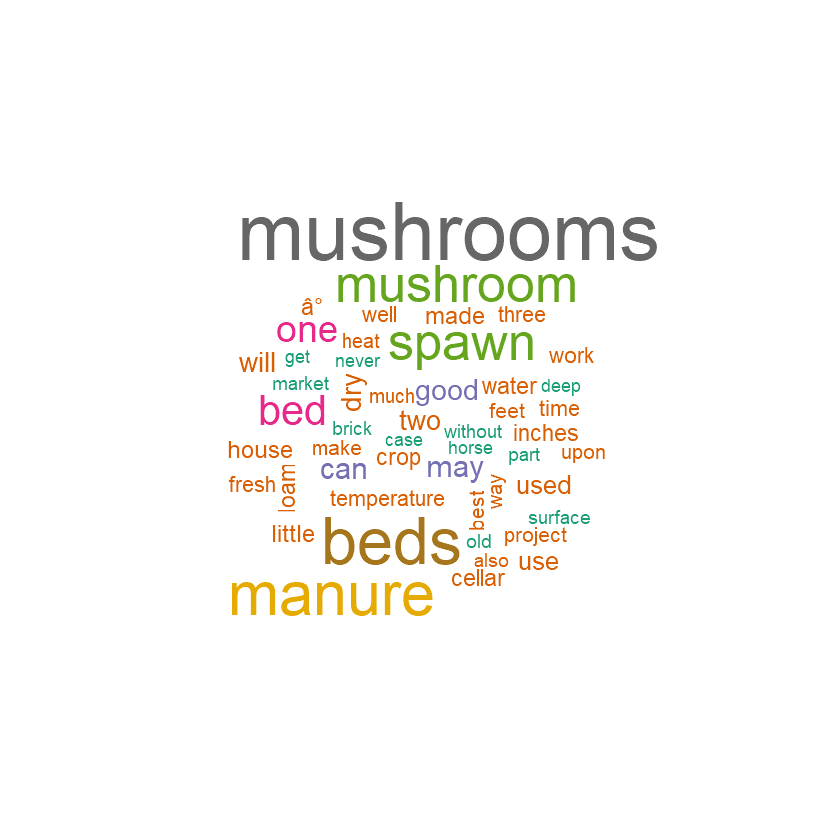

In [4]:
#########
# Book 1: Mushrooms and How to Grow Them, 1892
#########

# Read in text document; Corpus should appear in the Environment under Data with length of 1
Corpus <- Corpus(DirSource("corpus1")) 
# View Corpus; it should come up in console as "Simple Corpus"
paste("View of Corpus:")
(Corpus)
# View summary; make sure title is as expected
paste("Summary of Corpus:")
summary(Corpus)
# Store length as ndocs; it should appear under Values
paste("Number of Documents:")
(ndocs<-length(Corpus)) 

# Clean the Corpus and create Document Term Matrix; "dtm" should appear under Data
dtm <- DocumentTermMatrix(Corpus,
                          control = list(
                            stopwords = TRUE, 
                            wordLengths=c(3, 15),
                            removePunctuation = T,
                            removeNumbers = T,
                            tolower=T,
                            #stemming = T,
                            remove_separators = T
                          ))

# Perform Checks, either by viewing or with inspect

#paste("View of dtm:")
#(dtm)

paste("Inspect dtm:")
inspect(dtm)  # Shows number of documents and terms
# We expect sparcity to be 0 because there is only one document

# Convert what we just built into a matrix; "dtm_M" should appear under Data
dtm_M <- as.matrix(dtm)
# Check it
paste("Check dtm_M:")
(dtm_M[1,1:10])

# Look at word frequencies
WordFreq <- colSums(dtm_M)  # Get column sums and store as WordFreq (should appear in Values)
paste("Length:")
(length(WordFreq))  # Get length in console
ord <- order(WordFreq)  # Put them in order, and store as ord (should appear under values)
paste("6 Least Frequent:")
(WordFreq[head(ord)])  # Least frequent will appear in console
paste("6 Most Frequent:")
(WordFreq[tail(ord)])  # Most frequent will appear in console

# Row Sums gives a number for each document, good for normalizing by hand.
# Not needed for this document, but added as a reference.
# (Row_Sum_Per_doc <- rowSums(dtm_M))

# Convert un-normalized Matrix to a DataFrame; "mush_DF" should appear under Data
mush_DF <- as.data.frame(dtm_M)  
# View portion of Structure
paste("Portion of mush_DF Structure:")
str(mush_DF [1,1:10])

# Check how many rows are in the DF; it should be the same as the number of text documents
paste("Number of Rows in mush_DF:")
(nrow(mush_DF)) 

# Visual: Create a word cloud using a matrix
wordcloud(colnames(dtm_M), dtm_M[1, ], max.words = 50,colors=brewer.pal(8,"Dark2"))

# If desired, select a word to look up. Will get the freqency in each document.
paste("Mushrooms and How to Grow Them, 1892 ")
cat("Frequency of beds:",(mush_DF$beds),"\n")
cat("Frequency of manure:",(mush_DF$manure),"\n")
cat("Frequency of spawn:",(mush_DF$spawn),"\n")
cat("Frequency of cellar:",(mush_DF$cellar),"\n")
cat("Frequency of loam:",(mush_DF$loam),"\n")
cat("Frequency of temperature:",(mush_DF$temperature),"\n")
cat("Frequency of compost:",(mush_DF$compost),"\n")
cat("Frequency of straw:",(mush_DF$straw),"\n")
cat("Frequency of agar:",(mush_DF$agar),"\n")
cat("Frequency of species:",(mush_DF$species),"\n")

[1] "View of Corpus:"

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 1

[1] "Summary of Corpus:"

                                                                           Length
The-Mushroom-Cultivator-A-Practical-Guide-to-Growing-Mushrooms-at-Home.txt 2     
                                                                           Class            
The-Mushroom-Cultivator-A-Practical-Guide-to-Growing-Mushrooms-at-Home.txt PlainTextDocument
                                                                           Mode
The-Mushroom-Cultivator-A-Practical-Guide-to-Growing-Mushrooms-at-Home.txt list

[1] "Number of Documents:"

[1] 1

[1] "Inspect dtm:"

<<DocumentTermMatrix (documents: 1, terms: 3221)>>
Non-/sparse entries: 3221/0
Sparsity           : 0%
Maximal term length: 15
Weighting          : term frequency (tf)
Sample             :
                                                                            Terms
Docs                                                                         can
  The-Mushroom-Cultivator-A-Practical-Guide-to-Growing-Mushrooms-at-Home.txt 120
                                                                            Terms
Docs                                                                         casing
  The-Mushroom-Cultivator-A-Practical-Guide-to-Growing-Mushrooms-at-Home.txt     73
                                                                            Terms
Docs                                                                         compost
  The-Mushroom-Cultivator-A-Practical-Guide-to-Growing-Mushrooms-at-Home.txt      76
                                                                 

[1] "Check dtm_M:"

ability abnormality       abort     aborted     absence      absent 
          3           2           1           1           1           3 
 absolutely      absorb   absorbing  absorption 
          5           1           1           1

[1] "Length:"

[1] 3221

[1] "6 Least Frequent:"

abort    aborted    absence     absorb  absorbing absorption 
         1          1          1          1          1          1

[1] "6 Most Frequent:"

spawn mycelium  species      can   figure mushroom 
      82       86       95      120      157      198

[1] "Portion of mush_DF Structure:"

'data.frame':	1 obs. of  10 variables:
 $ ability    : num 3
 $ abnormality: num 2
 $ abort      : num 1
 $ aborted    : num 1
 $ absence    : num 1
 $ absent     : num 3
 $ absolutely : num 5
 $ absorb     : num 1
 $ absorbing  : num 1
 $ absorption : num 1


[1] "Number of Rows in mush_DF:"

[1] 1

[1] "The Mushroom Cultivator, 1983"

Frequency of beds: 8 
Frequency of manure: 5 
Frequency of spawn: 82 
Frequency of cellar: 
Frequency of loam: 
Frequency of temperature: 46 
Frequency of compost: 76 
Frequency of straw: 53 
Frequency of agar: 44 
Frequency of species: 95 


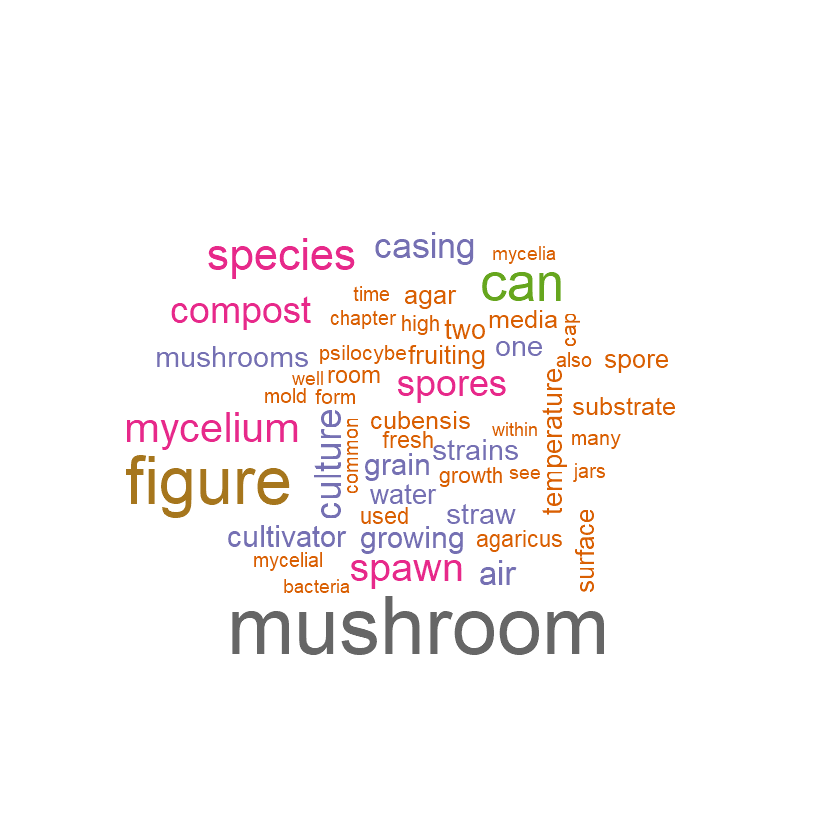

In [5]:
#########
# Book 2: The Mushroom Cultivator, 1983
#########

# This is the same code as above, but using "corpus2:

# Read in text document; Corpus should appear in the Environment under Data with length of 1
Corpus <- Corpus(DirSource("corpus2")) 
# View Corpus; it should come up in console as "Simple Corpus"
paste("View of Corpus:")
(Corpus)
# View summary; make sure title is as expected
paste("Summary of Corpus:")
summary(Corpus)
# Store length as ndocs; it should appear under Values
paste("Number of Documents:")
(ndocs<-length(Corpus)) 

# Clean the Corpus and create Document Term Matrix; "dtm" should appear under Data
dtm <- DocumentTermMatrix(Corpus,
                          control = list(
                            stopwords = TRUE, 
                            wordLengths=c(3, 15),
                            removePunctuation = T,
                            removeNumbers = T,
                            tolower=T,
                            #stemming = T,
                            remove_separators = T
                          ))

# Perform Checks, either by viewing or with inspect
#paste("View of dtm:")
#(dtm)

paste("Inspect dtm:")
inspect(dtm)  # Shows number of documents and terms
# We expect sparcity to be 0 because there is only one document

# Convert what we just built into a matrix; "dtm_M" should appear under Data
dtm_M <- as.matrix(dtm)
# Check it
paste("Check dtm_M:")
(dtm_M[1,1:10])

# Look at word frequencies; WordFreq
WordFreq <- colSums(dtm_M)  # Get column sums and store as WordFreq (should appear in Values)
paste("Length:")
(length(WordFreq))  # Get length in console
ord <- order(WordFreq)  # Put them in order, and store as ord (should appear under values)
paste("6 Least Frequent:")
(WordFreq[head(ord)])  # Least frequent will appear in console
paste("6 Most Frequent:")
(WordFreq[tail(ord)])  # Most frequent will appear in console

# Row Sums gives a number for each document, good for normalizing by hand.
# Not needed for this document, but added as a reference.
#(Row_Sum_Per_doc <- rowSums(dtm_M))

# Convert un-normalized Matrix to a DataFrame; "mush_DF" should appear under Data
mush_DF <- as.data.frame(dtm_M)  
# View portion of Structure
paste("Portion of mush_DF Structure:")
str(mush_DF [1,1:10])

# Check how many rows are in the DF; it should be the same as the number of text documents
paste("Number of Rows in mush_DF:")
(nrow(mush_DF)) 

# Visual: Create a word cloud using a matrix
wordcloud(colnames(dtm_M), dtm_M[1, ], max.words = 50,colors=brewer.pal(8,"Dark2"))

# If desired, select a word to look up. Will get the freqency in each document
paste("The Mushroom Cultivator, 1983")
cat("Frequency of beds:",(mush_DF$beds),"\n")
cat("Frequency of manure:",(mush_DF$manure),"\n")
cat("Frequency of spawn:",(mush_DF$spawn),"\n")
cat("Frequency of cellar:",(mush_DF$cellar),"\n")
cat("Frequency of loam:",(mush_DF$loam),"\n")
cat("Frequency of temperature:",(mush_DF$temperature),"\n")
cat("Frequency of compost:",(mush_DF$compost),"\n")
cat("Frequency of straw:",(mush_DF$straw),"\n")
cat("Frequency of agar:",(mush_DF$agar),"\n")
cat("Frequency of species:",(mush_DF$species),"\n")

## Exploratory Data Analysis (EDA)

In [6]:
################################################################################
# Prep Work: Load Libraries
################################################################################
#install.packages("ggplot2")
library(ggplot2)
#install.packages("plyr")
library(plyr)
#install.packages("tidyverse")
library(tidyverse)
#install.packages("e1071")
library(e1071)
#install.packages("mlr")
library(mlr)
#install.packages("caret",
#                 repos = "http://cran.r-project.org", 
#                 dependencies = TRUE)
library(caret)
#install.packages("naivebayes")
library(naivebayes)
#install.packages("mclust")
library(mclust)
#install.packages("cluster")
library(cluster)
#install.packages("rpart")
library(rpart)
#install.packages('rattle')
library(rattle)
#install.packages('rpart.plot')
library(rpart.plot)
#install.packages("Cairo")
library(Cairo)
# install.packages("corrplot")
library(corrplot)


Attaching package: 'ggplot2'

The following object is masked from 'package:NLP':

    annotate

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v tibble  2.1.3     v purrr   0.3.2
v tidyr   0.8.3     v dplyr   0.8.3
v readr   1.3.1     v forcats 0.4.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x ggplot2::annotate() masks NLP::annotate()
x dplyr::arrange()    masks plyr::arrange()
x purrr::compact()    masks plyr::compact()
x dplyr::count()      masks plyr::count()
x tidyr::expand()     masks Matrix::expand()
x dplyr::failwith()   masks plyr::failwith()
x dplyr::filter()     masks stats::filter()
x dplyr::id()         masks plyr::id()
x dplyr::lag()        masks stats::lag()
x dplyr::mutate()     masks plyr::mutate()
x dplyr::rename()     masks plyr::rename()
x dplyr::summarise()  masks plyr::summarise()
x dplyr::summarize()  masks plyr::summarize()
Loading required package: ParamHelpers

Attaching package: 'mlr'

T

In [7]:
################################################################################
# Read in Data and Explore (Lauren Foltz)
################################################################################

# Place "mushrooms.csv" in the R project folder
# Read the file into R using the read.csv function
# Use header=TRUE to let R know that headers are present
# Use "na.strings = "NA" so R will replace spaces/blanks with "NA"
# Note: R will convert dashes to dots (cap-shape will be cap.shape)

filename="mushrooms.csv"
m<- read.csv(filename, header = TRUE, na.strings = "NA",stringsAsFactors = TRUE)
# m now appears in the Environment under Data as 8124 obs. of 23 variables

# Look at the data, then comment out
#View(m)

# Check for missing values
Total <-sum(is.na(m))
cat("The number of missing values in Mushroom data is ", Total )
# The number of missing values in Mushroom data is  0

# Look at a table
paste("Habitat Table:")
(table(m$class,m$habitat))

# Use a loop to create all of the tables at once, then review the data (appears in console)
paste("Loop of all Tables:")
for(i in 1:ncol(m)){
  print(table(m[i]))
}

# The tables show that there are 2480 instances of "?" in column L "stalk-root"

# Below are optional checks that can be run.
#(colnames(m2))  # To get column names
#(head(m2))  # To see the first 6 rows
#(m2)  # To see all the data

# Notes on Which variables contain important information.
  # veil.type is not valuable. There is only one level.
  # All other variables may have value.
  # Class is important; it is our label.

# Use "str" to check the data types.
# Important: The labels must be factors for models to work properly!
paste("Structure of Dataframe M:")
str(m)
# All are factors.

The number of missing values in Mushroom data is  0

[1] "Habitat Table:"

   
       d    g    l    m    p    u    w
  e 1880 1408  240  256  136   96  192
  p 1268  740  592   36 1008  272    0

[1] "Loop of all Tables:"


   e    p 
4208 3916 

   b    c    f    k    s    x 
 452    4 3152  828   32 3656 

   f    g    s    y 
2320    4 2556 3244 

   b    c    e    g    n    p    r    u    w    y 
 168   44 1500 1840 2284  144   16   16 1040 1072 

   f    t 
4748 3376 

   a    c    f    l    m    n    p    s    y 
 400  192 2160  400   36 3528  256  576  576 

   a    f 
 210 7914 

   c    w 
6812 1312 

   b    n 
5612 2512 

   b    e    g    h    k    n    o    p    r    u    w    y 
1728   96  752  732  408 1048   64 1492   24  492 1202   86 

   e    t 
3516 4608 

   ?    b    c    e    r 
2480 3776  556 1120  192 

   f    k    s    y 
 552 2372 5176   24 

   f    k    s    y 
 600 2304 4936  284 

   b    c    e    g    n    o    p    w    y 
 432   36   96  576  448  192 1872 4464    8 

   b    c    e    g    n    o    p    w    y 
 432   36   96  576  512  192 1872 4384   24 

   p 
8124 

   n    o    w    y 
  96   96 7924    8 

   n    o    t 
  36 7488  600 

   e    f    l    n   

[1] "Structure of Dataframe M:"

'data.frame':	8124 obs. of  23 variables:
 $ class                   : Factor w/ 2 levels "e","p": 2 1 1 2 1 1 1 1 2 1 ...
 $ cap.shape               : Factor w/ 6 levels "b","c","f","k",..: 6 6 1 6 6 6 1 1 6 1 ...
 $ cap.surface             : Factor w/ 4 levels "f","g","s","y": 3 3 3 4 3 4 3 4 4 3 ...
 $ cap.color               : Factor w/ 10 levels "b","c","e","g",..: 5 10 9 9 4 10 9 9 9 10 ...
 $ bruises                 : Factor w/ 2 levels "f","t": 2 2 2 2 1 2 2 2 2 2 ...
 $ odor                    : Factor w/ 9 levels "a","c","f","l",..: 7 1 4 7 6 1 1 4 7 1 ...
 $ gill.attachment         : Factor w/ 2 levels "a","f": 2 2 2 2 2 2 2 2 2 2 ...
 $ gill.spacing            : Factor w/ 2 levels "c","w": 1 1 1 1 2 1 1 1 1 1 ...
 $ gill.size               : Factor w/ 2 levels "b","n": 2 1 1 2 1 1 1 1 2 1 ...
 $ gill.color              : Factor w/ 12 levels "b","e","g","h",..: 5 5 6 6 5 6 3 6 8 3 ...
 $ stalk.shape             : Factor w/ 2 levels "e","t": 1 1 1 1 2 1 1 1 1 1 ...
 $ stalk.r

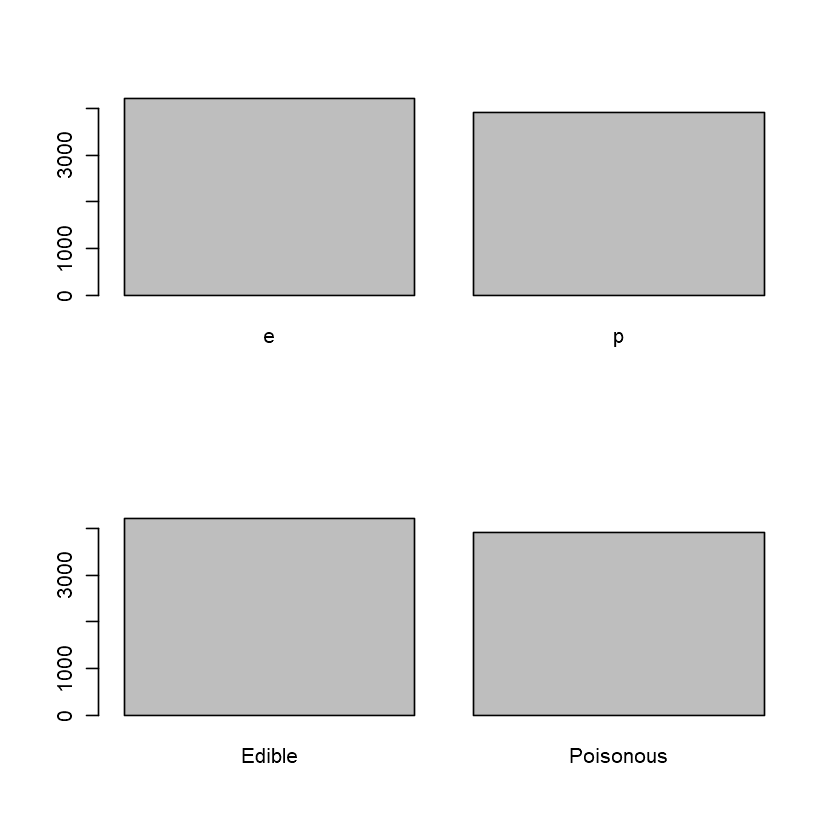

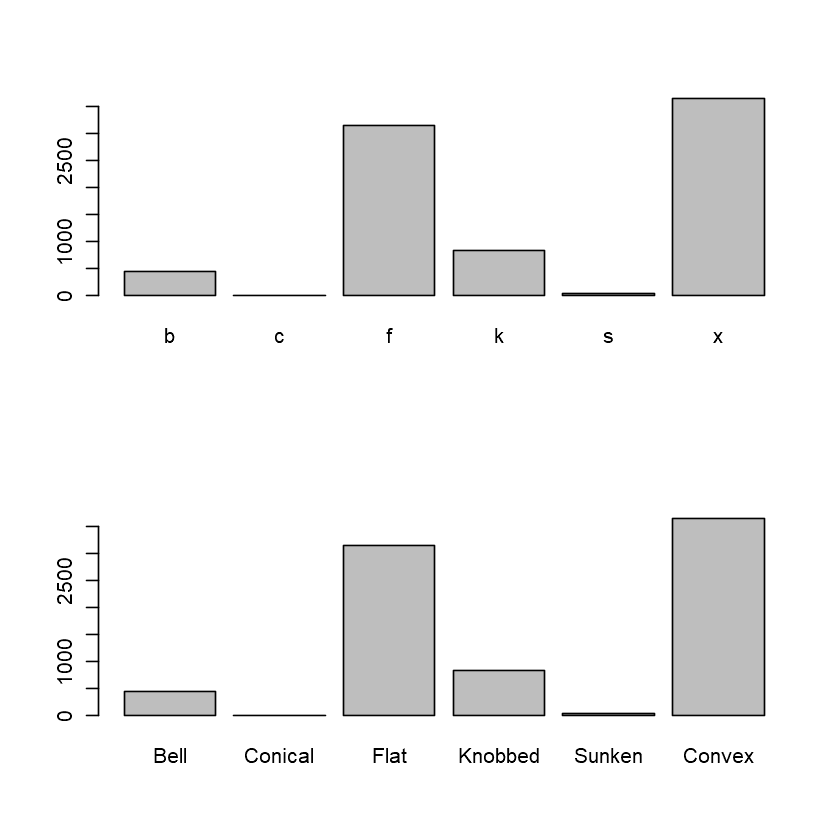

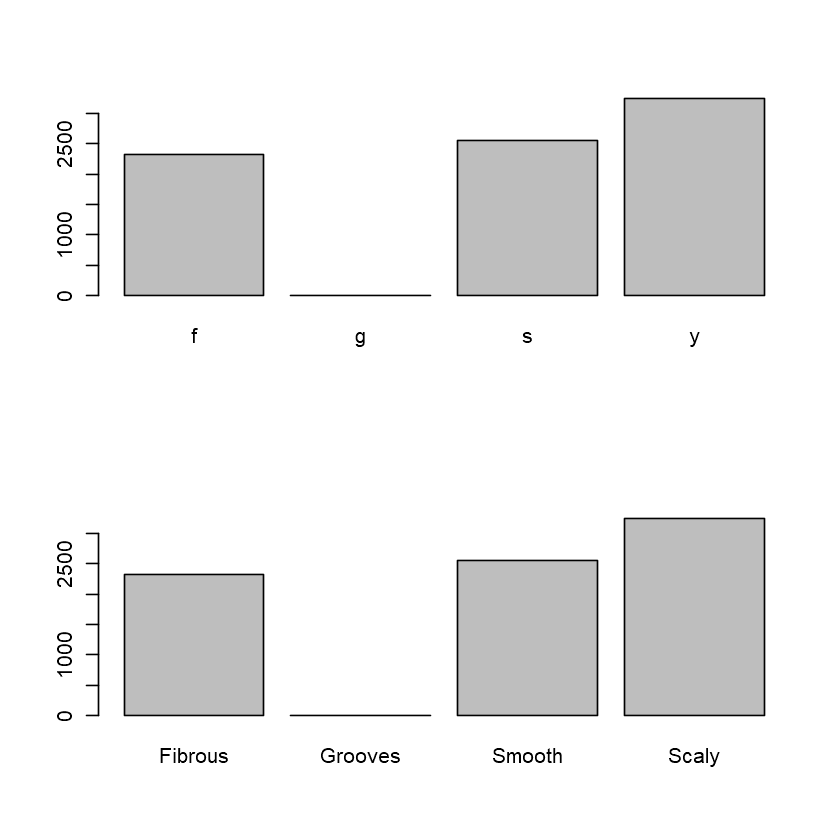

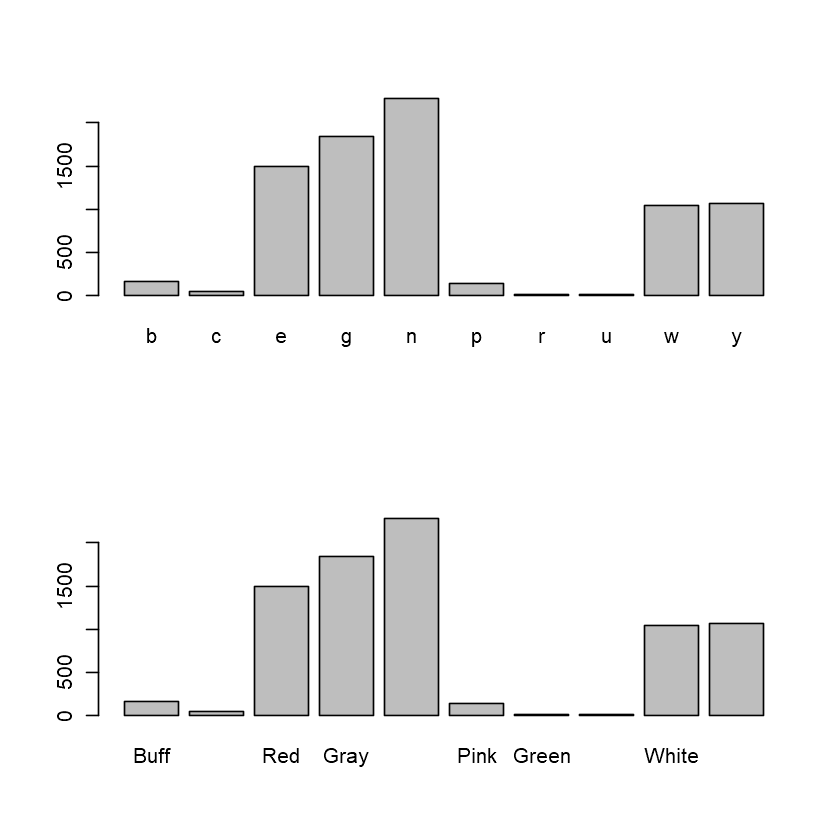

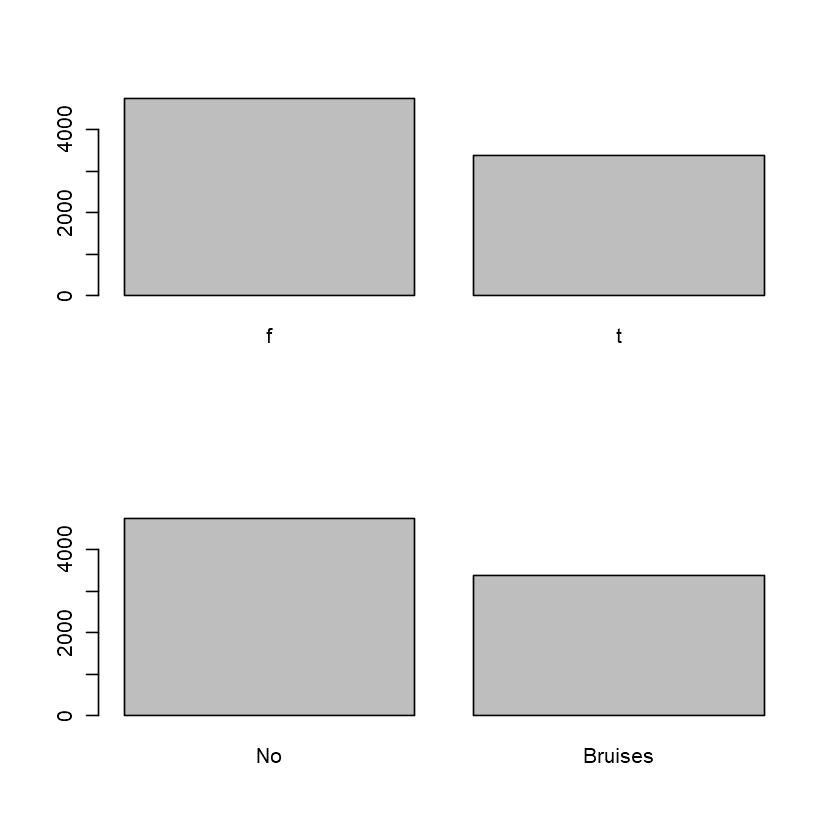

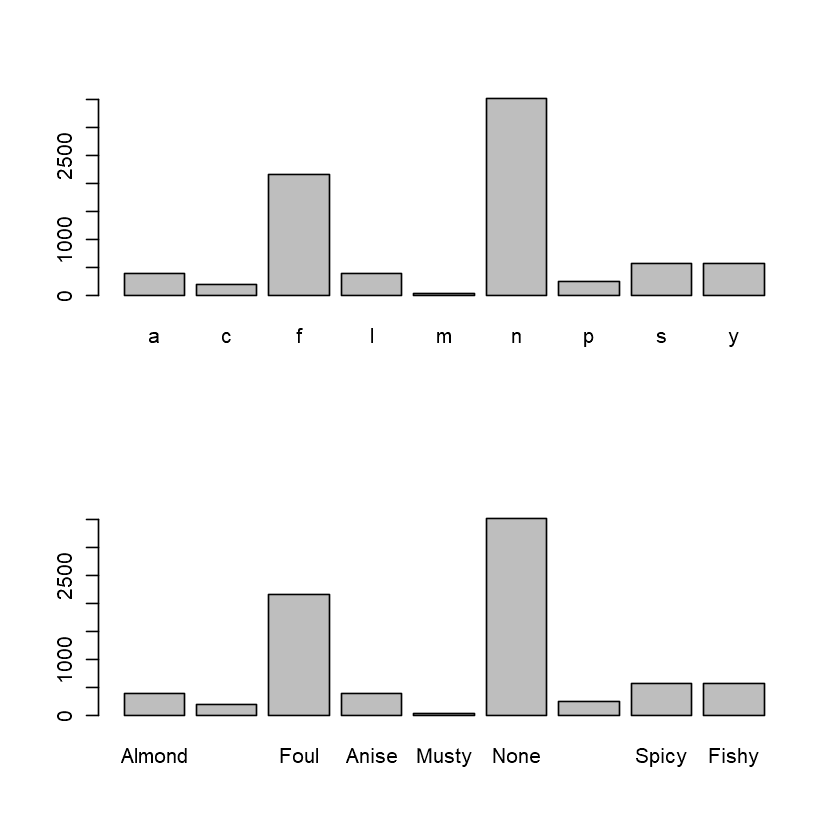

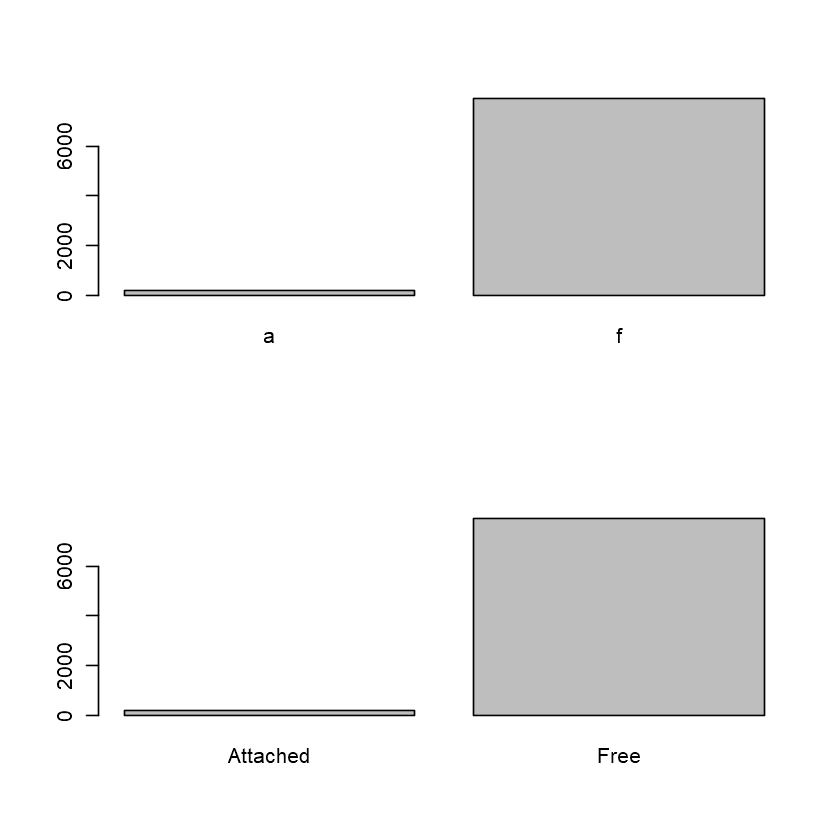

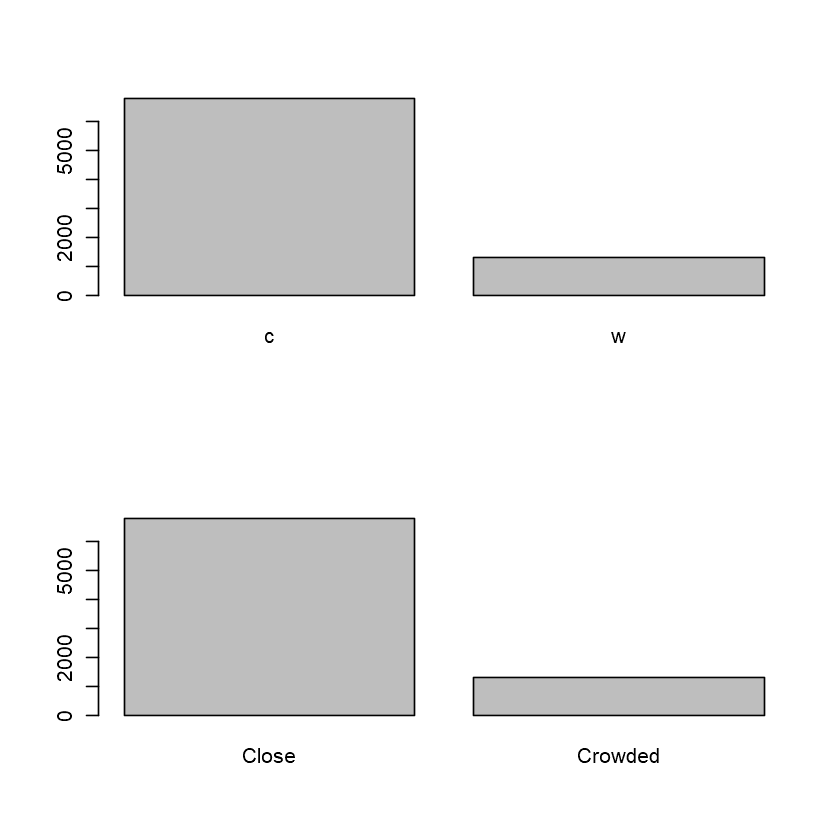

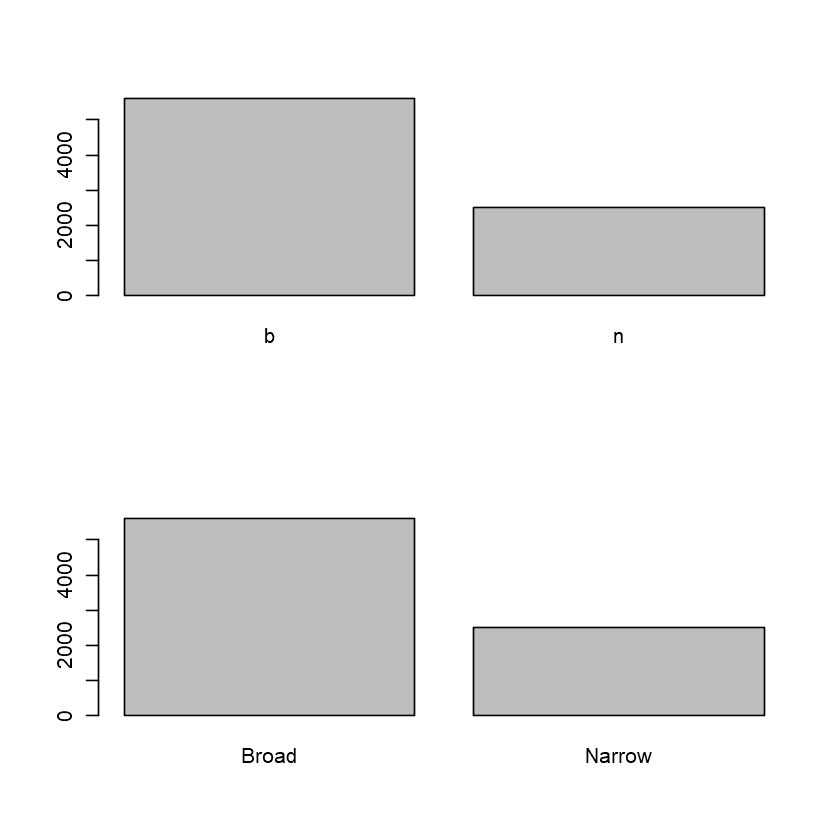

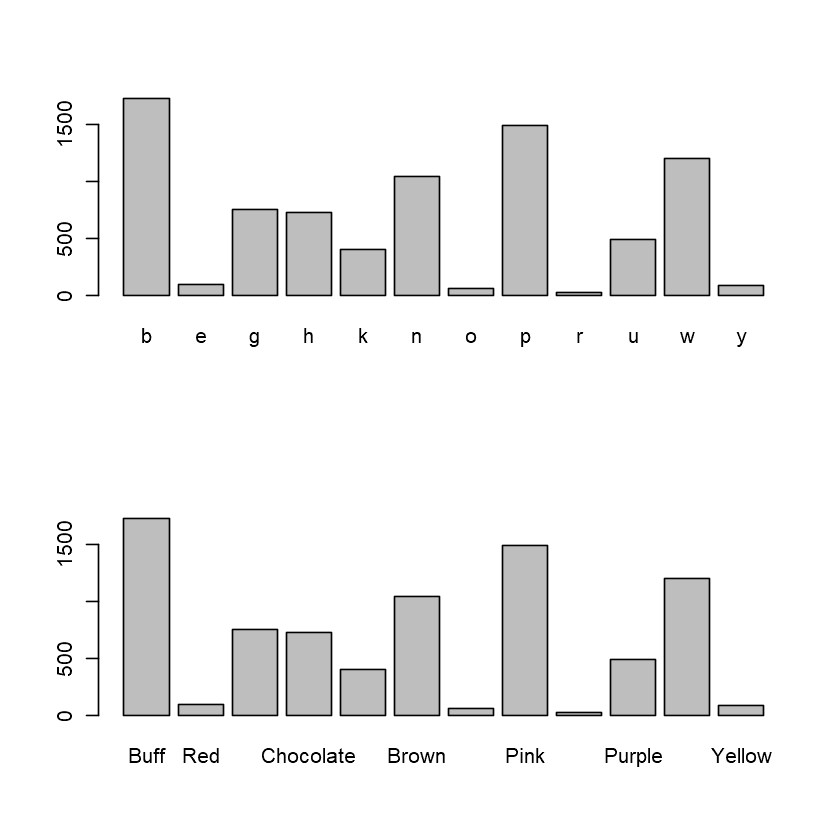

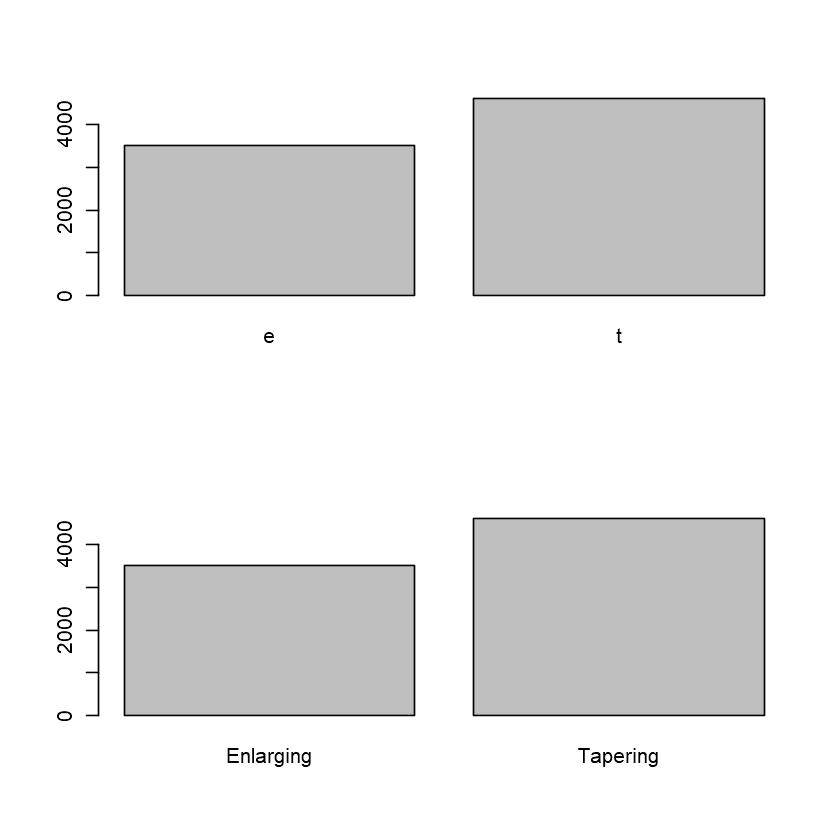

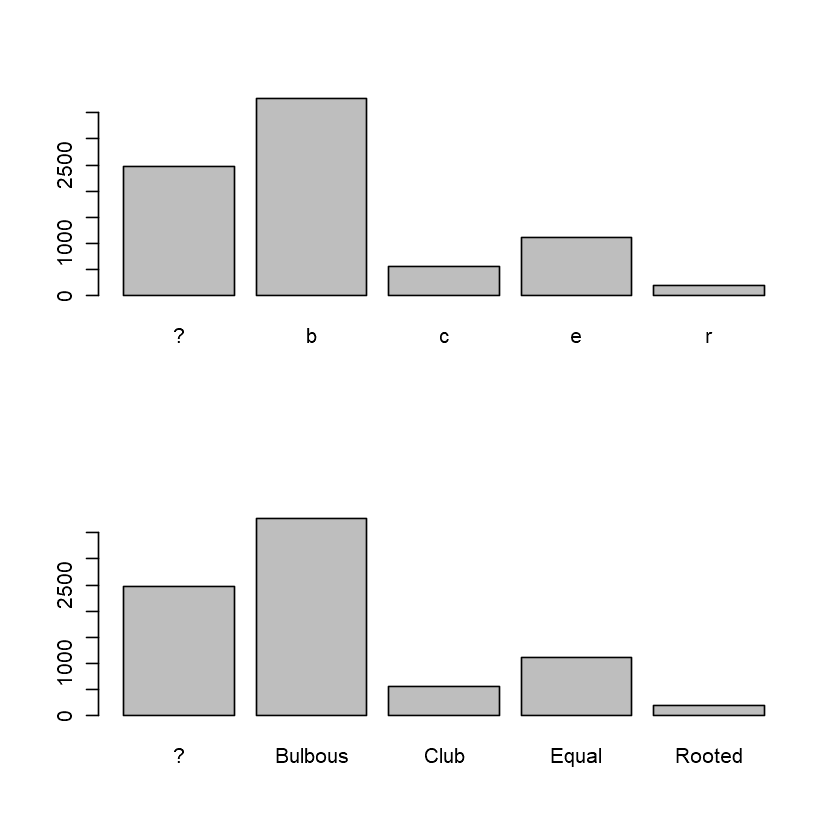

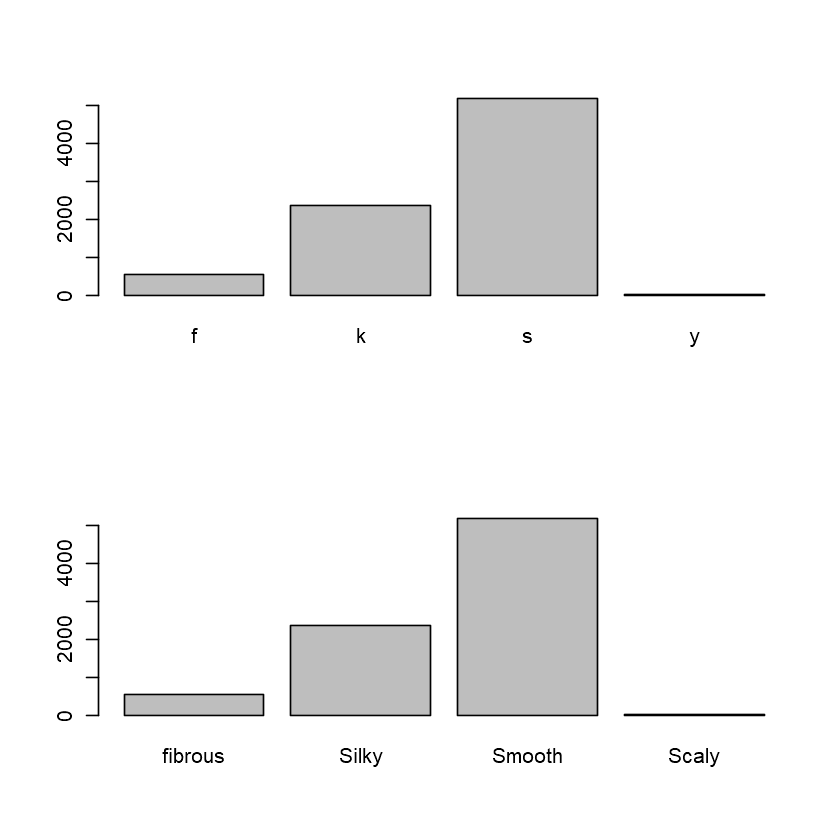

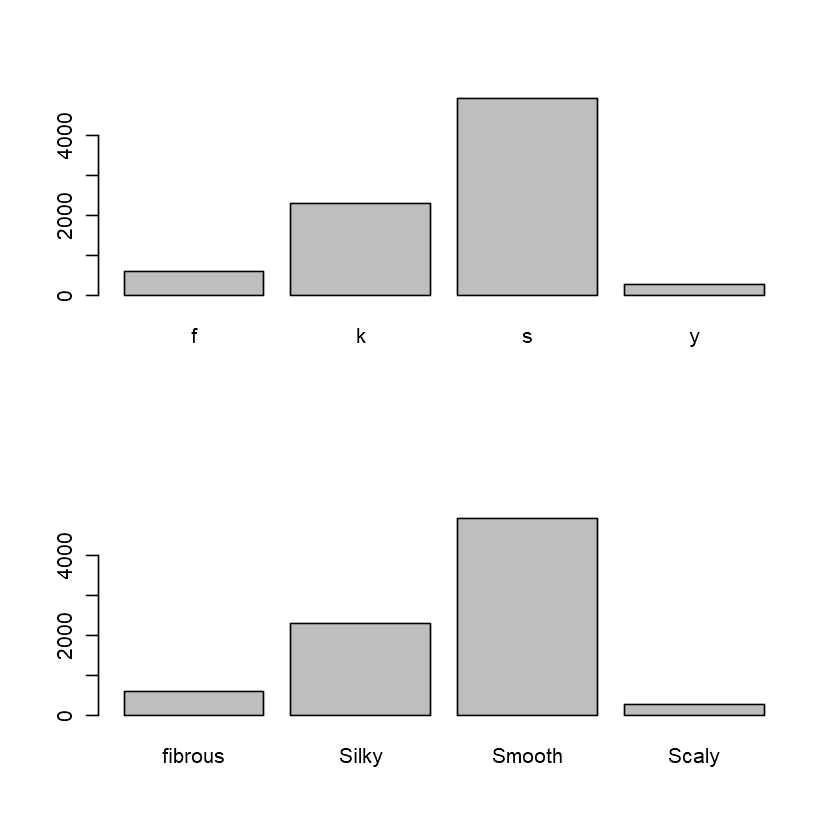

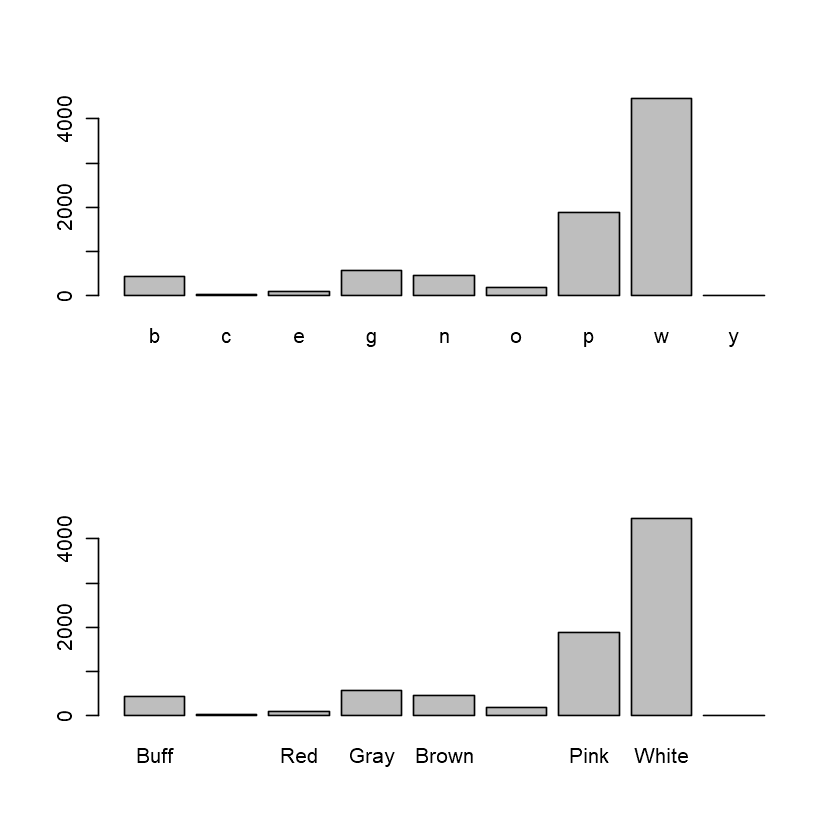

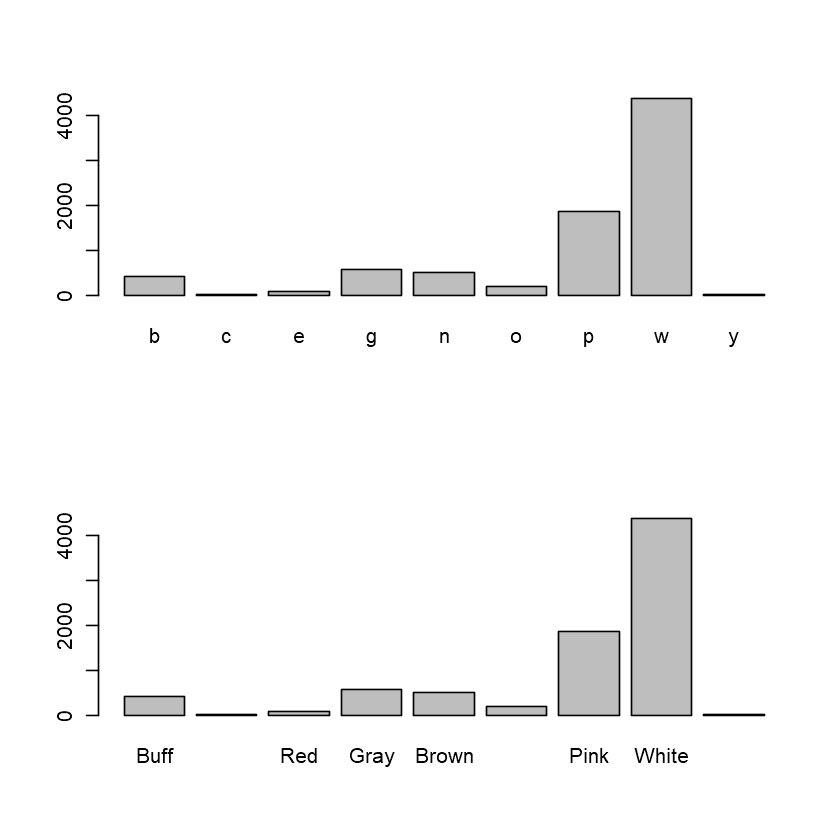

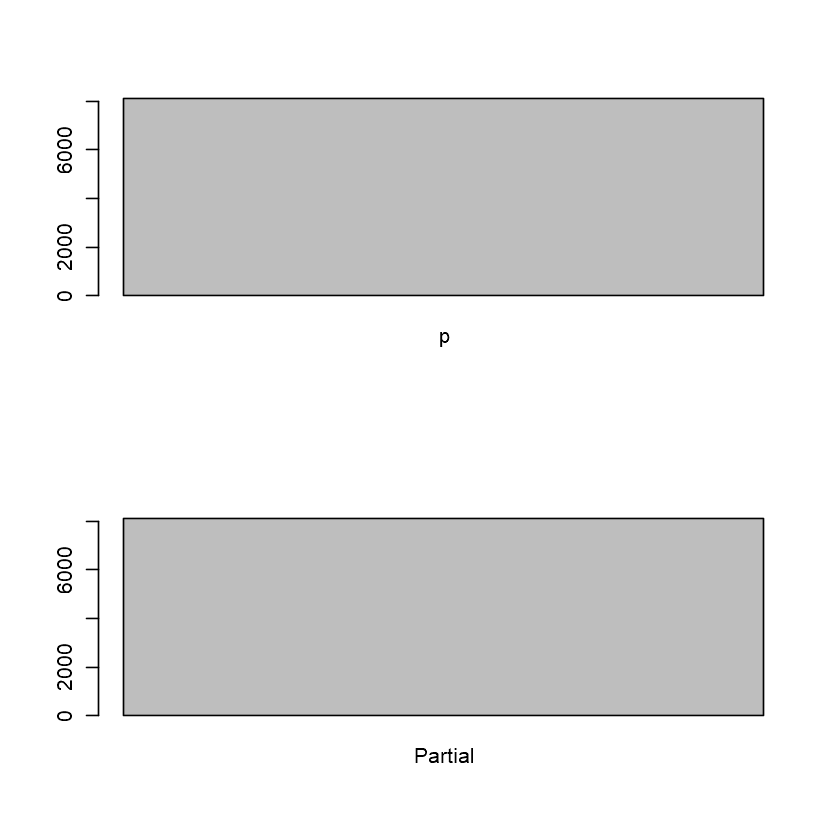

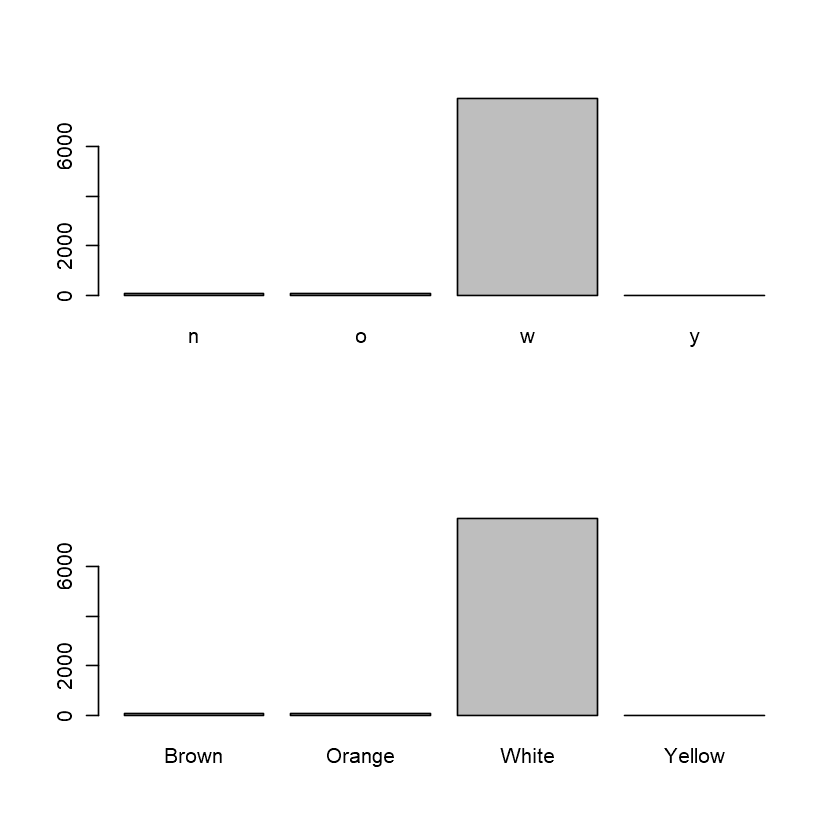

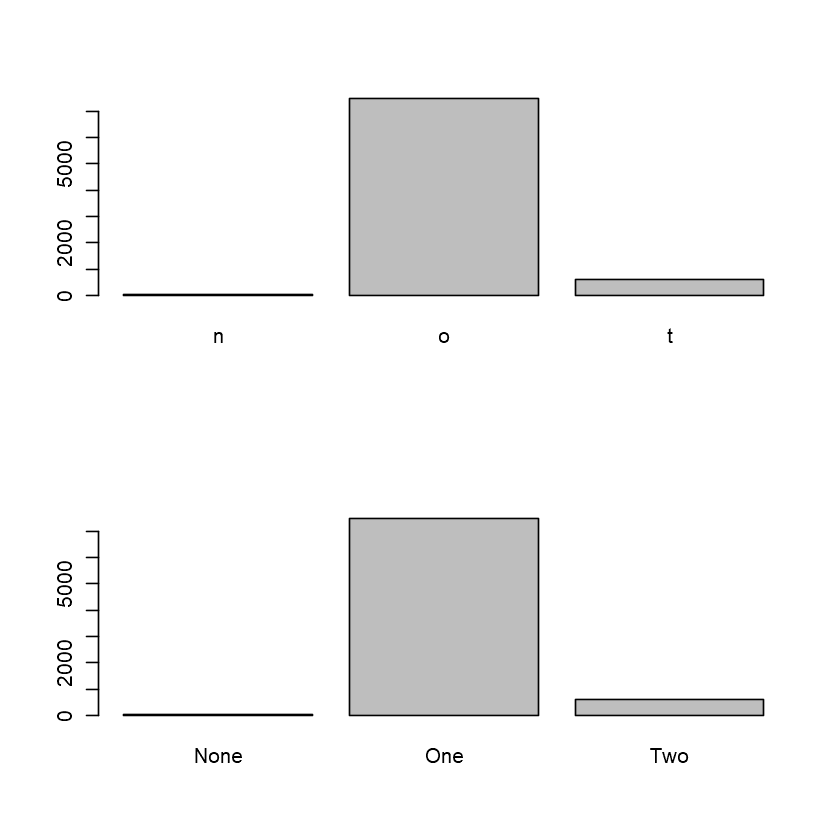

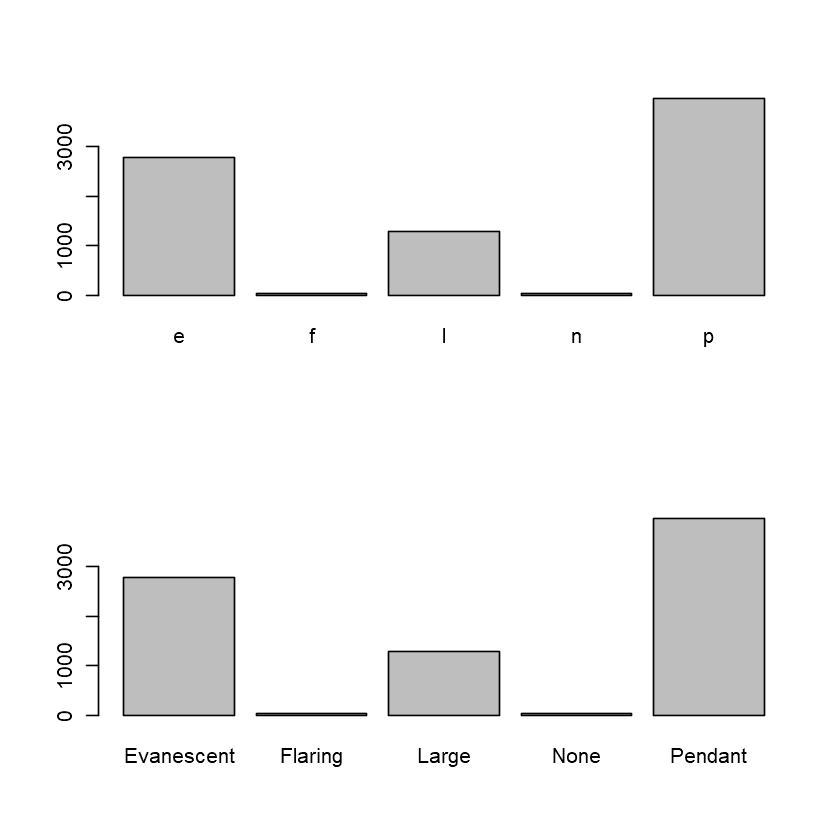

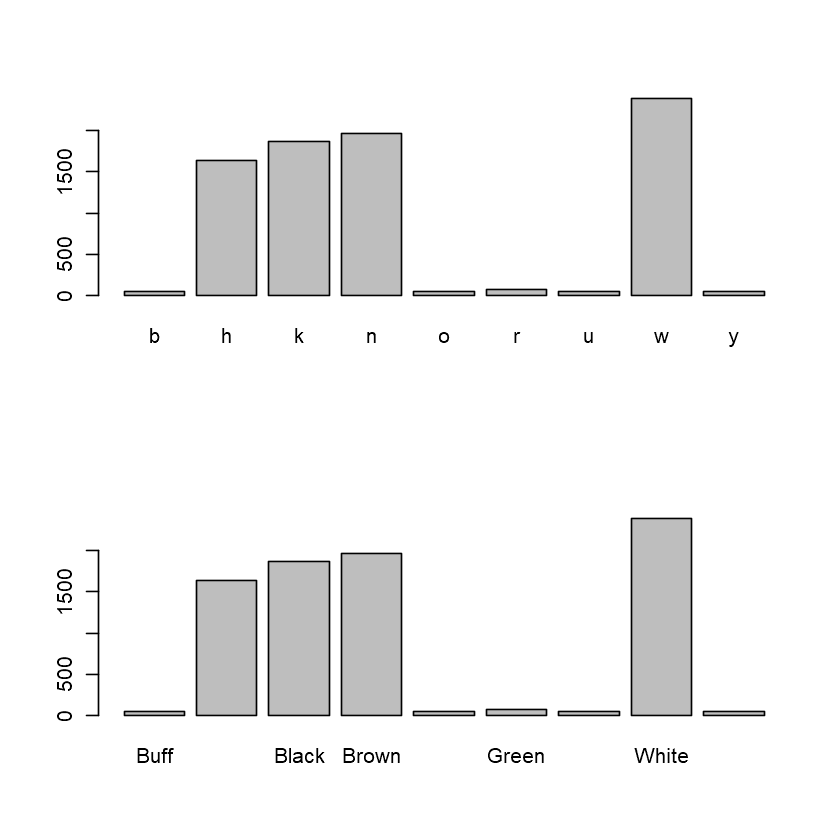

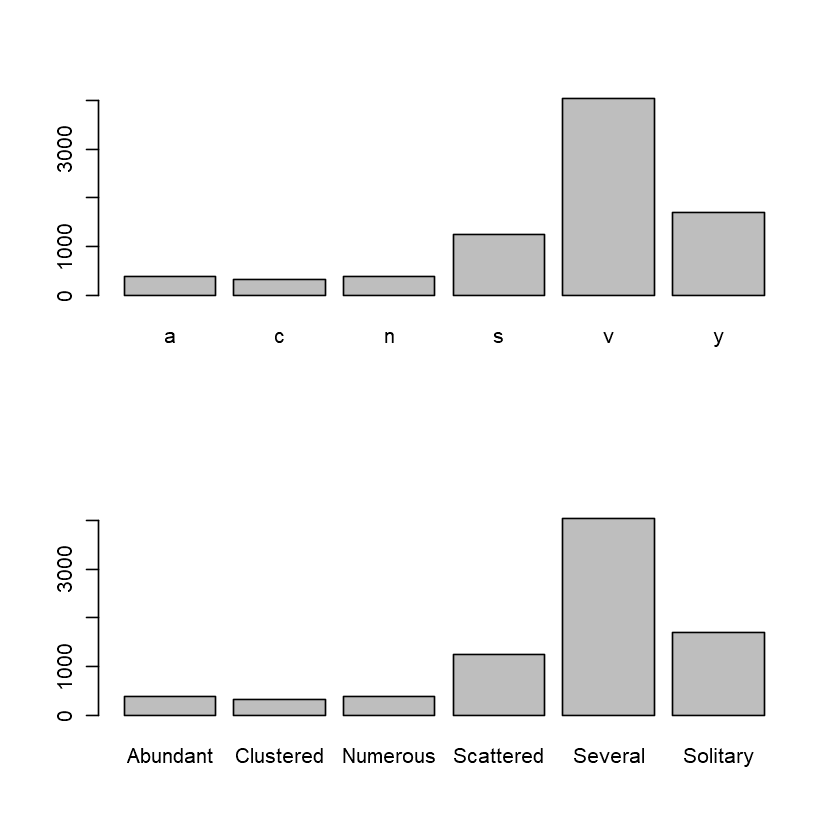

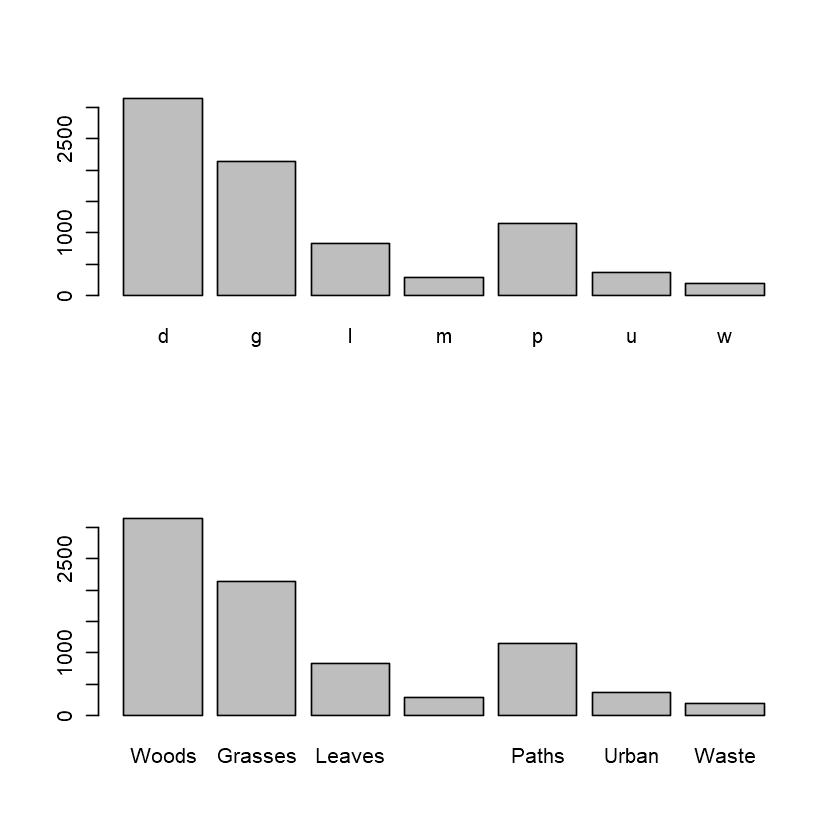

In [8]:
################################################################################
# Update Variable Names (Lauren Foltz)
################################################################################

# Look at barplot, update variable, check barplot again to make sure correct
par(mfrow=c(2,1))  # Set plot parameters for easy comparison
barplot(table(m$class))
m$class<-recode(m$class, e = "Edible", p = "Poisonous")
barplot(table(m$class))

barplot(table(m$cap.shape))
m$cap.shape<-recode(m$cap.shape, b = "Bell", c = "Conical" , x = "Convex" , f = "Flat" , k = "Knobbed" , s = "Sunken")
barplot(table(m$cap.shape))

barplot(table(m$cap.surface))
m$cap.surface<-recode(m$cap.surface, f = "Fibrous", g = "Grooves" , y = "Scaly" , s = "Smooth" )
barplot(table(m$cap.surface))

barplot(table(m$cap.color))
m$cap.color<-recode(m$cap.color, n = "Brown", b= "Buff" , c = "Cinnamon" , g = "Gray", r = "Green", p = "Pink" , u = "Purple" , e = "Red" , w = "White" ,y = "Yellow")
barplot(table(m$cap.color))

barplot(table(m$bruises))
m$bruises<-recode(m$bruises, t = "Bruises", f= "No")
barplot(table(m$bruises))

barplot(table(m$odor))
m$odor <-recode(m$odor, a = "Almond", l= "Anise" , c = "Creosote" , y = "Fishy", f = "Foul", m = "Musty" , n = "None" , p = "Pungent" , s = "Spicy")
barplot(table(m$odor))

barplot(table(m$gill.attachment))
m$gill.attachment<-recode(m$gill.attachment, a = "Attached", f = "Free")
barplot(table(m$gill.attachment))

barplot(table(m$gill.spacing))
m$gill.spacing<-recode(m$gill.spacing, c = "Close", w = "Crowded")
barplot(table(m$gill.spacing))

barplot(table(m$gill.size))
m$gill.size<-recode(m$gill.size, b = "Broad", n = "Narrow")
barplot(table(m$gill.size))

barplot(table(m$gill.color))
m$gill.color<-recode(m$gill.color, k = "Black", n = "Brown", b= "Buff" , h = "Chocolate" , g = "Gray", r = "Green", o = "Orange", p = "Pink" , u = "Purple" , e = "Red" , w = "White" ,y = "Yellow")
barplot(table(m$gill.color))

barplot(table(m$stalk.shape))
m$stalk.shape<-recode(m$stalk.shape, e = "Enlarging", t = "Tapering")
barplot(table(m$stalk.shape))

barplot(table(m$stalk.root))
m$stalk.root<-recode(m$stalk.root, b = "Bulbous", c = "Club", e = "Equal" ,r = "Rooted")
barplot(table(m$stalk.root))

barplot(table(m$stalk.surface.above.ring))
m$stalk.surface.above.ring<-recode(m$stalk.surface.above.ring, f= "fibrous", y = "Scaly", k= "Silky" , s = "Smooth")
barplot(table(m$stalk.surface.above.ring))

barplot(table(m$stalk.surface.below.ring))
m$stalk.surface.below.ring<-recode(m$stalk.surface.below.ring, f= "fibrous", y = "Scaly", k= "Silky" , s = "Smooth")
barplot(table(m$stalk.surface.below.ring))

barplot(table(m$stalk.color.above.ring))
m$stalk.color.above.ring<-recode(m$stalk.color.above.ring, n = "Brown", b= "Buff" , c = "Cinnamon" , g = "Gray", o = "Orange", p = "Pink" , e = "Red" , w = "White" ,y = "Yellow")
barplot(table(m$stalk.color.above.ring))

barplot(table(m$stalk.color.below.ring))
m$stalk.color.below.ring<-recode(m$stalk.color.below.ring , n = "Brown", b= "Buff" , c = "Cinnamon" , g = "Gray", o = "Orange", p = "Pink" , e = "Red" , w = "White" ,y = "Yellow")
barplot(table(m$stalk.color.below.ring))

barplot(table(m$veil.type))
m$veil.type<-recode(m$veil.type , p = "Partial")
barplot(table(m$veil.type))

barplot(table(m$veil.color))
m$veil.color<-recode(m$veil.color , n = "Brown", o = "Orange", w = "White" ,y = "Yellow")
barplot(table(m$veil.color))

barplot(table(m$ring.number))
m$ring.number<-recode(m$ring.number , n = "None", o = "One", t = "Two")
barplot(table(m$ring.number))

barplot(table(m$ring.type))
m$ring.type<-recode(m$ring.type , e= "Evanescent" , f = "Flaring" , l = "Large", n = "None", p = "Pendant" )
barplot(table(m$ring.type))

barplot(table(m$spore.print.color))
m$spore.print.color<-recode(m$spore.print.color , k = "Black", n = "Brown", b= "Buff" ,h = "Chocolate" , r = "Green", o = "Orange" , u = "Purple" , w = "White" ,y = "Yellow")
barplot(table(m$spore.print.color))

barplot(table(m$population))
m$population<-recode(m$population , a = "Abundant", c= "Clustered" , n = "Numerous" , s = "Scattered", v= "Several", y = "Solitary")
barplot(table(m$population))

barplot(table(m$habitat))
m$habitat<-recode(m$habitat , g = "Grasses", l= "Leaves" , m = "Meadows" , p = "Paths", u= "Urban", w = "Waste", d = "Woods")
barplot(table(m$habitat))


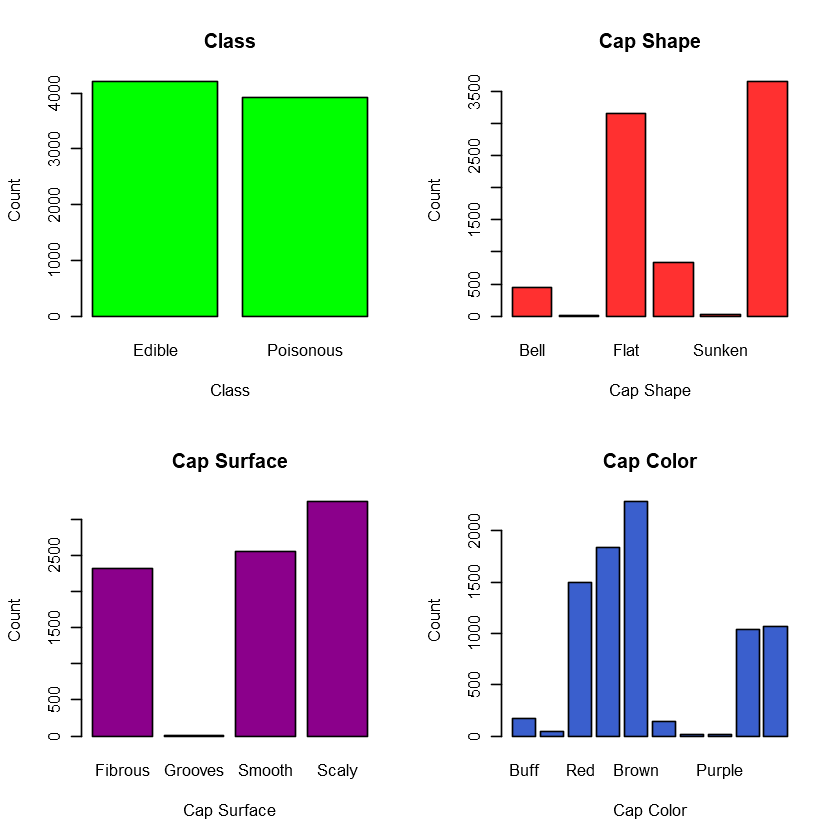

In [9]:
################################################################################
# Visual of Barcharts (Lauren Foltz)
################################################################################

#Set A
par(mfrow=c(2,2))
barplot(table(m$class), 
        col='green',
        xlab='Class',ylab='Count',
        main='Class')
barplot(table(m$cap.shape),
        col='firebrick1',
        xlab='Cap Shape',ylab='Count',
        main='Cap Shape')
barplot(table(m$cap.surface),
        col='darkmagenta',
        xlab='Cap Surface',ylab='Count',
        main='Cap Surface')
barplot(table(m$cap.color),
        col='royalblue3',
        xlab='Cap Color',ylab='Count',
        main='Cap Color')

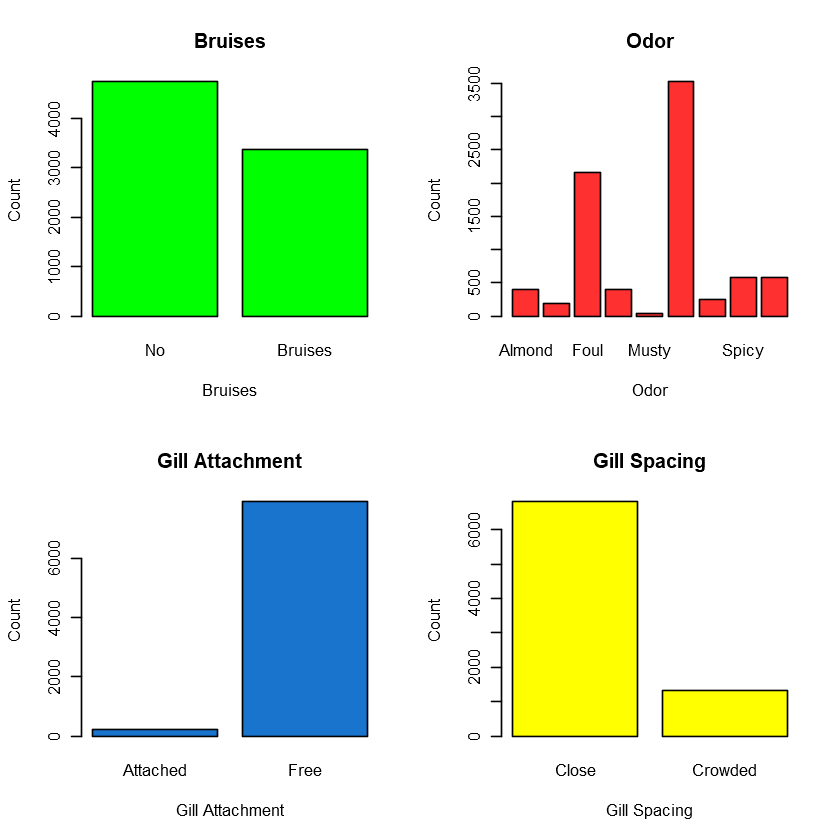

In [10]:
#Set B
par(mfrow=c(2,2))
barplot(table(m$bruises), 
        col='green',
        xlab='Bruises',ylab='Count',
        main='Bruises')
barplot(table(m$odor),
        col='firebrick1',
        xlab='Odor',ylab='Count',
        main='Odor')
barplot(table(m$gill.attachment),
        col='dodgerblue3',
        xlab='Gill Attachment',ylab='Count',
        main='Gill Attachment')
barplot(table(m$gill.spacing),
        col='yellow',
        xlab='Gill Spacing',ylab='Count',
        main='Gill Spacing')

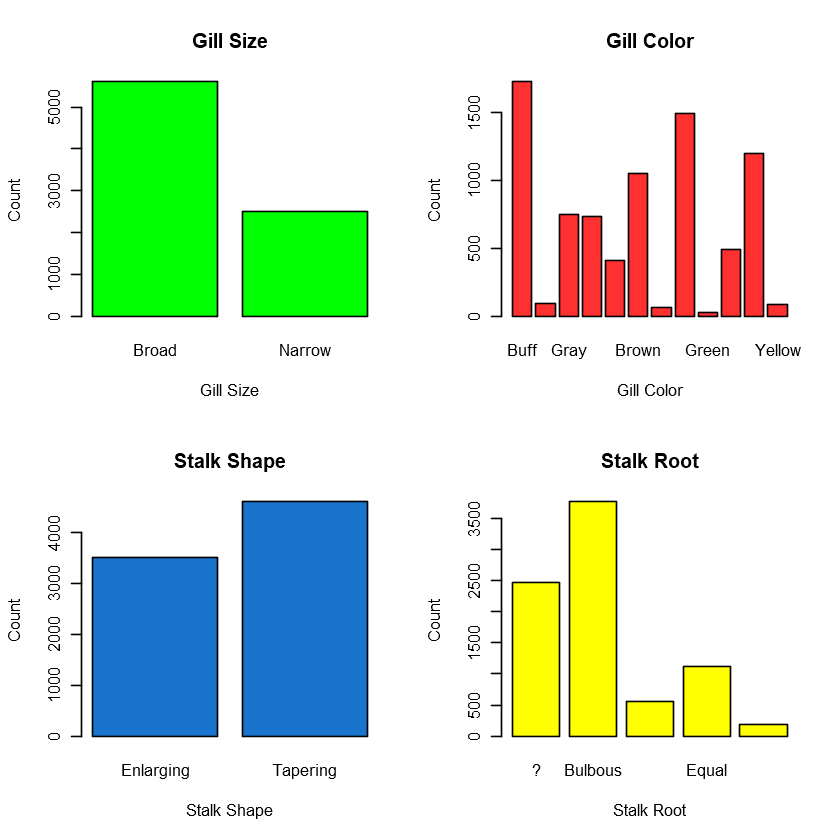

In [11]:
#Set C
par(mfrow=c(2,2))
barplot(table(m$gill.size),
        col='green',
        xlab='Gill Size',ylab='Count',
        main='Gill Size')
barplot(table(m$gill.color),
        col='firebrick1',
        xlab='Gill Color',ylab='Count',
        main='Gill Color')
barplot(table(m$stalk.shape),
        col='dodgerblue3',
        xlab='Stalk Shape',ylab='Count',
        main='Stalk Shape')
barplot(table(m$stalk.root),
        col='yellow',
        xlab='Stalk Root',ylab='Count',
        main='Stalk Root')

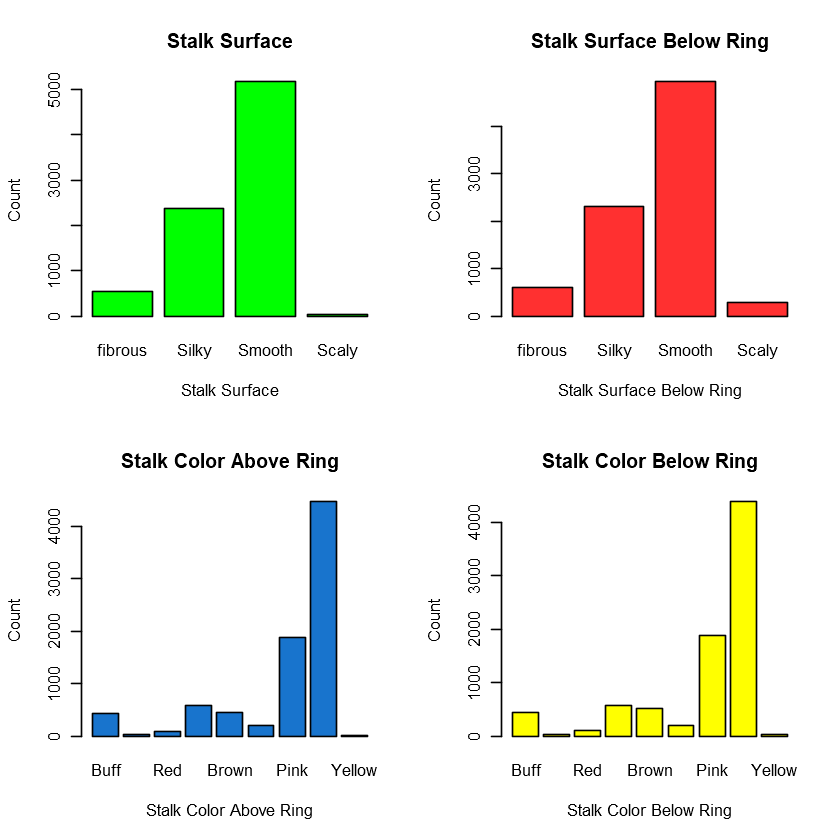

In [12]:
#Set D
par(mfrow=c(2,2))
barplot(table(m$stalk.surface.above.ring),
        col='green',
        xlab='Stalk Surface',ylab='Count',
        main='Stalk Surface')
barplot(table(m$stalk.surface.below.ring),
        col='firebrick1',
        xlab='Stalk Surface Below Ring',ylab='Count',
        main='Stalk Surface Below Ring')
barplot(table(m$stalk.color.above.ring),
        col='dodgerblue3',
        xlab='Stalk Color Above Ring',ylab='Count',
        main='Stalk Color Above Ring')
barplot(table(m$stalk.color.below.ring),
        col='yellow',
        xlab='Stalk Color Below Ring',ylab='Count',
        main='Stalk Color Below Ring')

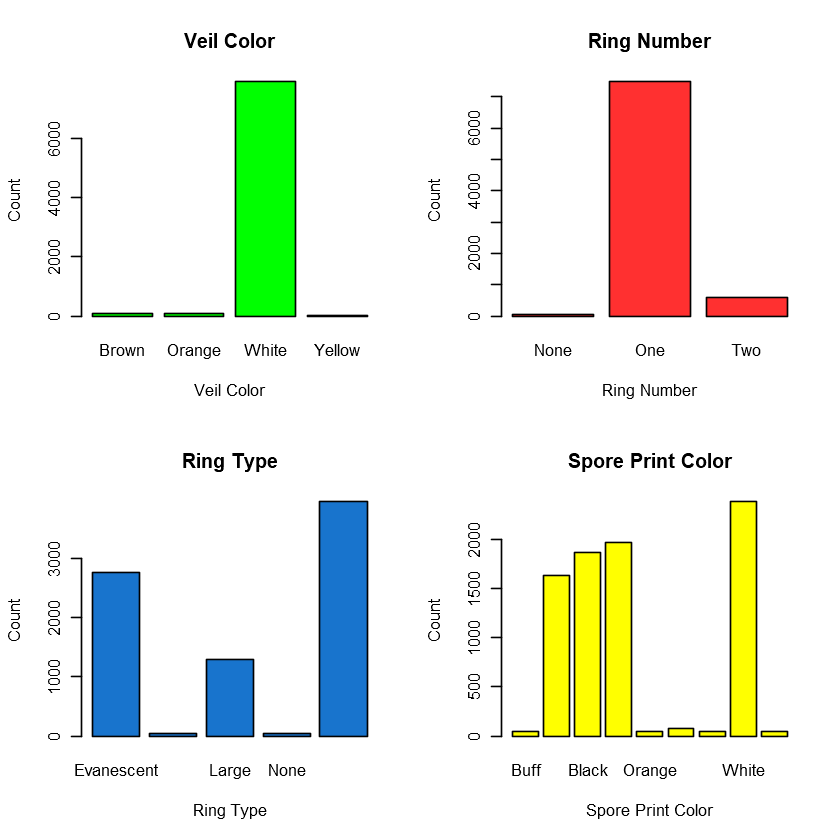

In [13]:
#Set E
par(mfrow=c(2,2))
barplot(table(m$veil.color),
        col='green',
        xlab='Veil Color',ylab='Count',
        main='Veil Color')
barplot(table(m$ring.number),
        col='firebrick1',
        xlab='Ring Number',ylab='Count',
        main='Ring Number')
barplot(table(m$ring.type),
        col='dodgerblue3',
        xlab='Ring Type',ylab='Count',
        main='Ring Type')
barplot(table(m$spore.print.color),
        col='yellow',
        xlab='Spore Print Color',ylab='Count',
        main='Spore Print Color')

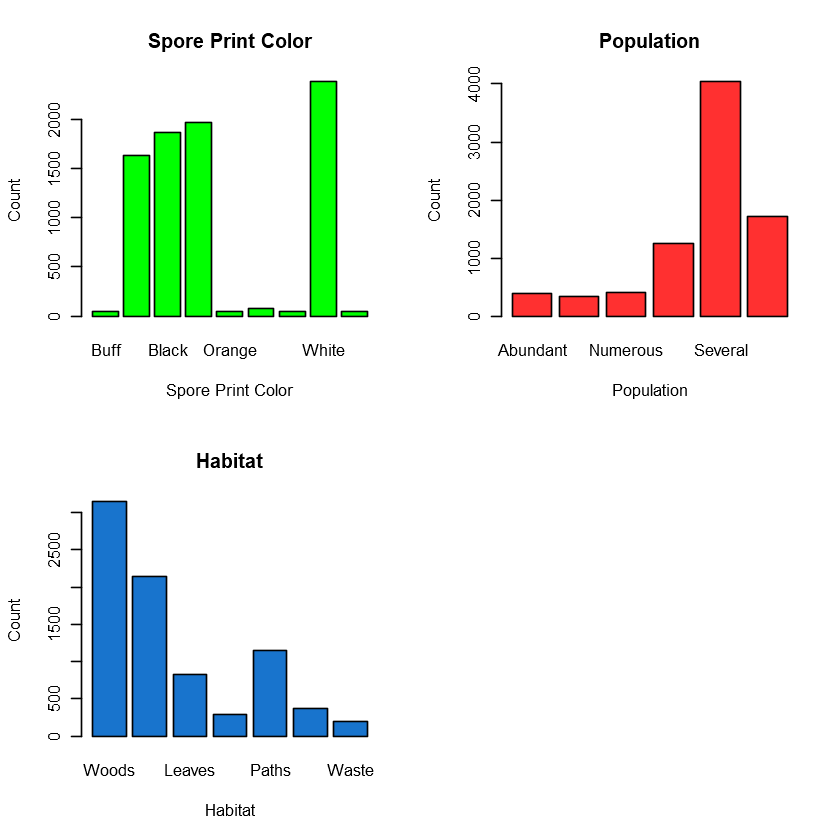

In [14]:
#Set F
par(mfrow=c(2,2))
barplot(table(m$spore.print.color),
        col='green',
        xlab='Spore Print Color',ylab='Count',
        main='Spore Print Color')
barplot(table(m$population),
        col='firebrick1',
        xlab='Population',ylab='Count',
        main='Population')
barplot(table(m$habitat),
        col='dodgerblue3',
        xlab='Habitat',ylab='Count',
        main='Habitat')


# Reset parameters before moving forward
par(mfrow=c(1,1))


## Decision Tree & Random Forest - Prep Work

In [15]:
#================================================================================
# Create Train and Test set for Decision Tree and Random Forest (Baskar Dakshin)
#================================================================================

# Make a copy of the data frame and remove veil.type, as it has only one value
m2<-m[,-c(17)]
str(m2)

# Create Training and Test Dataset using Sample method.
# Took 70% for Training and 30% for Testing data
n = nrow(m2)
n
trainIndex = sample(1:n, size = round(0.7*n), replace=FALSE)

# Create Training Set
mush_train = m2[trainIndex ,]
str(mush_train)
dim(mush_train)

# Create Testing set
mush_test = m2[-trainIndex ,]
dim(mush_test)

# Remove the Decision Class from the Testing set
mush_test_nolabels<-mush_test[-c(1)]
dim(mush_test_nolabels)

# Remove the Decision Class from the Training set
mush_train_nolabels<-mush_train[-c(1)]
dim(mush_train_nolabels)

str(mush_test_nolabels)

# Create a Label Data Frame for Class variable
TestClassLabels<-mush_test$class
length(TestClassLabels)
TrainClassLabels<-mush_train$class
length(TrainClassLabels)

'data.frame':	8124 obs. of  22 variables:
 $ class                   : Factor w/ 2 levels "Edible","Poisonous": 2 1 1 2 1 1 1 1 2 1 ...
 $ cap.shape               : Factor w/ 6 levels "Bell","Conical",..: 6 6 1 6 6 6 1 1 6 1 ...
 $ cap.surface             : Factor w/ 4 levels "Fibrous","Grooves",..: 3 3 3 4 3 4 3 4 4 3 ...
 $ cap.color               : Factor w/ 10 levels "Buff","Cinnamon",..: 5 10 9 9 4 10 9 9 9 10 ...
 $ bruises                 : Factor w/ 2 levels "No","Bruises": 2 2 2 2 1 2 2 2 2 2 ...
 $ odor                    : Factor w/ 9 levels "Almond","Creosote",..: 7 1 4 7 6 1 1 4 7 1 ...
 $ gill.attachment         : Factor w/ 2 levels "Attached","Free": 2 2 2 2 2 2 2 2 2 2 ...
 $ gill.spacing            : Factor w/ 2 levels "Close","Crowded": 1 1 1 1 2 1 1 1 1 1 ...
 $ gill.size               : Factor w/ 2 levels "Broad","Narrow": 2 1 1 2 1 1 1 1 2 1 ...
 $ gill.color              : Factor w/ 12 levels "Buff","Red","Gray",..: 5 5 6 6 5 6 3 6 8 3 ...
 $ stalk.shape          

[1] 8124

'data.frame':	5687 obs. of  22 variables:
 $ class                   : Factor w/ 2 levels "Edible","Poisonous": 2 1 1 1 1 1 2 1 1 2 ...
 $ cap.shape               : Factor w/ 6 levels "Bell","Conical",..: 6 1 3 6 3 6 3 3 3 6 ...
 $ cap.surface             : Factor w/ 4 levels "Fibrous","Grooves",..: 3 3 1 4 4 4 3 1 4 4 ...
 $ cap.color               : Factor w/ 10 levels "Buff","Cinnamon",..: 3 4 9 3 5 5 5 5 4 10 ...
 $ bruises                 : Factor w/ 2 levels "No","Bruises": 1 1 1 2 2 2 2 1 2 1 ...
 $ odor                    : Factor w/ 9 levels "Almond","Creosote",..: 8 6 6 6 6 6 7 6 6 3 ...
 $ gill.attachment         : Factor w/ 2 levels "Attached","Free": 2 2 2 2 2 2 2 2 2 2 ...
 $ gill.spacing            : Factor w/ 2 levels "Close","Crowded": 1 2 2 1 1 1 1 2 1 1 ...
 $ gill.size               : Factor w/ 2 levels "Broad","Narrow": 2 1 1 1 1 1 2 1 1 1 ...
 $ gill.color              : Factor w/ 12 levels "Buff","Red","Gray",..: 1 8 8 6 8 11 8 8 11 4 ...
 $ stalk.shape          

[1] 5687   22

[1] 2437   22

[1] 2437   21

[1] 5687   21

'data.frame':	2437 obs. of  21 variables:
 $ cap.shape               : Factor w/ 6 levels "Bell","Conical",..: 6 6 6 6 1 6 6 6 1 6 ...
 $ cap.surface             : Factor w/ 4 levels "Fibrous","Grooves",..: 3 3 4 3 3 4 4 4 4 4 ...
 $ cap.color               : Factor w/ 10 levels "Buff","Cinnamon",..: 5 10 9 4 9 9 10 10 9 9 ...
 $ bruises                 : Factor w/ 2 levels "No","Bruises": 2 2 2 1 2 2 2 2 2 2 ...
 $ odor                    : Factor w/ 9 levels "Almond","Creosote",..: 7 1 7 6 1 7 4 1 1 4 ...
 $ gill.attachment         : Factor w/ 2 levels "Attached","Free": 2 2 2 2 2 2 2 2 2 2 ...
 $ gill.spacing            : Factor w/ 2 levels "Close","Crowded": 1 1 1 2 1 1 1 1 1 1 ...
 $ gill.size               : Factor w/ 2 levels "Broad","Narrow": 2 1 2 1 1 2 1 1 1 1 ...
 $ gill.color              : Factor w/ 12 levels "Buff","Red","Gray",..: 5 5 6 5 3 8 3 6 11 11 ...
 $ stalk.shape             : Factor w/ 2 levels "Enlarging","Tapering": 1 1 1 2 1 1 1 1 1 1 ...
 $ stalk.root       

[1] 2437

[1] 5687

## Decision Tree

Call:
rpart(formula = class ~ ., data = mush_train, method = "class", 
    parms = list(split = "gini"))
  n= 5687 

          CP nsplit  rel error     xerror        xstd
1 0.97175959      0 1.00000000 1.00000000 0.013646129
2 0.01629254      1 0.02824041 0.02824041 0.003175592
3 0.01000000      2 0.01194786 0.01194786 0.002073813

Variable importance
                    odor        spore.print.color               gill.color 
                      25                       19                       15 
stalk.surface.above.ring                ring.type stalk.surface.below.ring 
                      14                       14                       13 

Node number 1: 5687 observations,    complexity param=0.9717596
  predicted class=Edible     expected loss=0.4856691  P(node) =1
    class counts:  2925  2762
   probabilities: 0.514 0.486 
  left son=2 (3003 obs) right son=3 (2684 obs)
  Primary splits:
      odor                     splits as  LRRLRLRRR,    improve=2689.2160, (0 missing)

png 
  2


Classification tree:
rpart(formula = class ~ ., data = mush_train, method = "class", 
    parms = list(split = "gini"))

Variables actually used in tree construction:
[1] odor              spore.print.color

Root node error: 2762/5687 = 0.48567

n= 5687 

        CP nsplit rel error   xerror      xstd
1 0.971760      0  1.000000 1.000000 0.0136461
2 0.016293      1  0.028240 0.028240 0.0031756
3 0.010000      2  0.011948 0.011948 0.0020738


[1] 2437

           Actual
predicted   Edible Poisonous
  Edible      1283        15
  Poisonous      0      1139

Confusion Matrix and Statistics

           Reference
Prediction  Edible Poisonous
  Edible      1283        15
  Poisonous      0      1139
                                          
               Accuracy : 0.9938          
                 95% CI : (0.9899, 0.9966)
    No Information Rate : 0.5265          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9876          
                                          
 Mcnemar's Test P-Value : 0.0003006       
                                          
            Sensitivity : 1.0000          
            Specificity : 0.9870          
         Pos Pred Value : 0.9884          
         Neg Pred Value : 1.0000          
             Prevalence : 0.5265          
         Detection Rate : 0.5265          
   Detection Prevalence : 0.5326          
      Balanced Accuracy : 0.9935          
                                          
       'Positive' Class : Edible          

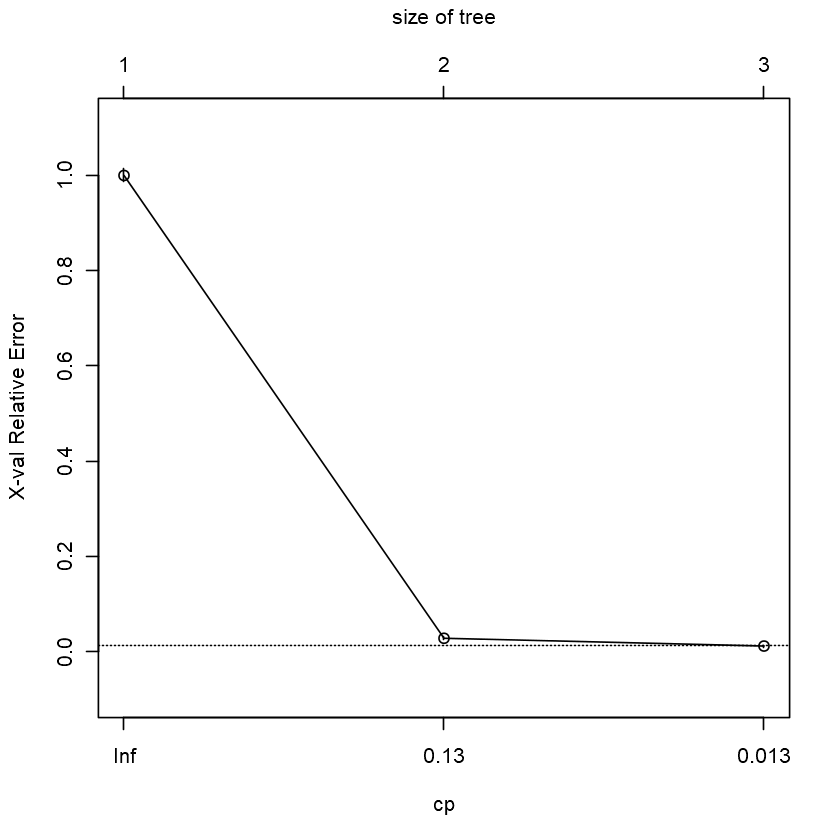

In [16]:
#================================================================================
# Decision Tree Classification Modelling (Baskar Dakshin)
#================================================================================

# Running the Model to find out what variables are important
set.seed(123)
# Create a model with split as gini
model <- rpart( class ~ ., data=mush_train,method="class",parms = list(split = "gini"))
summary(model)

# Create the Decision Tree and save as Jpeg
jpeg("DecisionTree_Mushroom_Sample1.jpg")
fancyRpartPlot(model)
rpart.plot(model,extr=101)
dev.off()
plotcp(model)
printcp(model)

# Do the prediction
#mush_test_nolabels
predicted=predict(model,mush_test_nolabels,type="class")
length(predicted)
Results<-data.frame(predicted=predicted,Actual=TestClassLabels)
(table(Results))

# Calculate Accuracy using the ConfusionMatrix- Accuracy comes in at 99.6%
confusionMatrix(predicted,TestClassLabels)



Call:
rpart(formula = class ~ odor + spore.print.color + gill.color + 
    stalk.surface.above.ring + stalk.color.below.ring + ring.type, 
    data = mush_train, method = "class", control = rpart.control(cp = 0, 
        maxdepth = 8, minsplit = 10))
  n= 5687 

           CP nsplit   rel error      xerror         xstd
1 0.971759594      0 1.000000000 1.000000000 0.0136461294
2 0.016292542      1 0.028240406 0.028240406 0.0031755922
3 0.006154960      2 0.011947864 0.011947864 0.0020738130
4 0.001991311      3 0.005792904 0.005792904 0.0014461872
5 0.000000000      5 0.001810282 0.001810282 0.0008092269

Variable importance
                    odor        spore.print.color               gill.color 
                      26                       19                       16 
stalk.surface.above.ring                ring.type   stalk.color.below.ring 
                      14                       14                       11 

Node number 1: 5687 observations,    complexity param=0.9717596

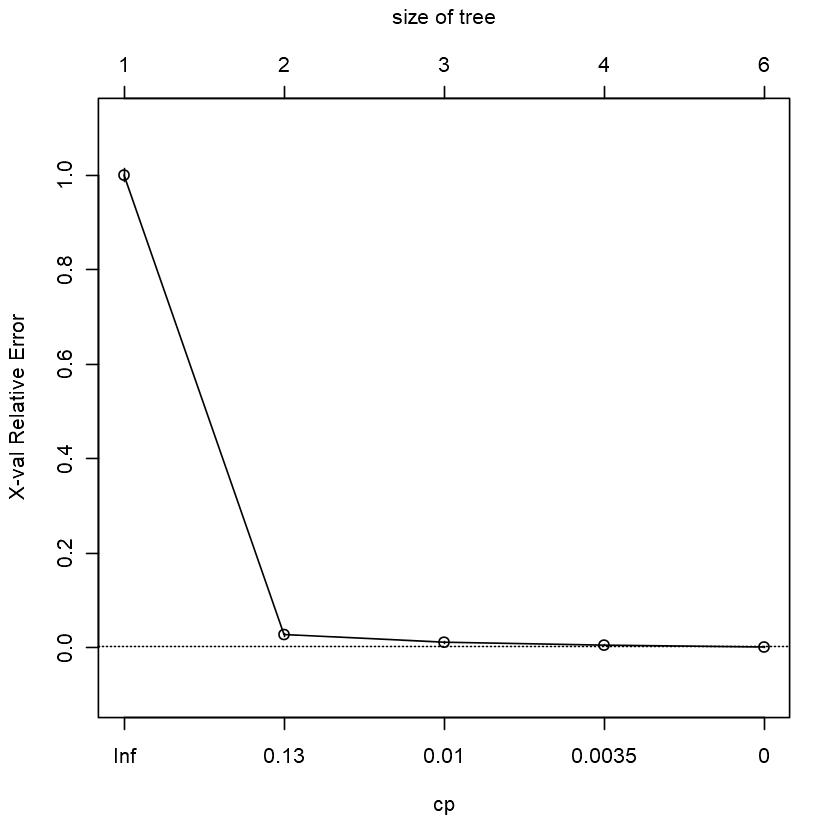

           Actual
predicted   Edible Poisonous
  Edible      1283         3
  Poisonous      0      1151

Confusion Matrix and Statistics

           Reference
Prediction  Edible Poisonous
  Edible      1283         3
  Poisonous      0      1151
                                          
               Accuracy : 0.9988          
                 95% CI : (0.9964, 0.9997)
    No Information Rate : 0.5265          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9975          
                                          
 Mcnemar's Test P-Value : 0.2482          
                                          
            Sensitivity : 1.0000          
            Specificity : 0.9974          
         Pos Pred Value : 0.9977          
         Neg Pred Value : 1.0000          
             Prevalence : 0.5265          
         Detection Rate : 0.5265          
   Detection Prevalence : 0.5277          
      Balanced Accuracy : 0.9987          
                                          
       'Positive' Class : Edible          

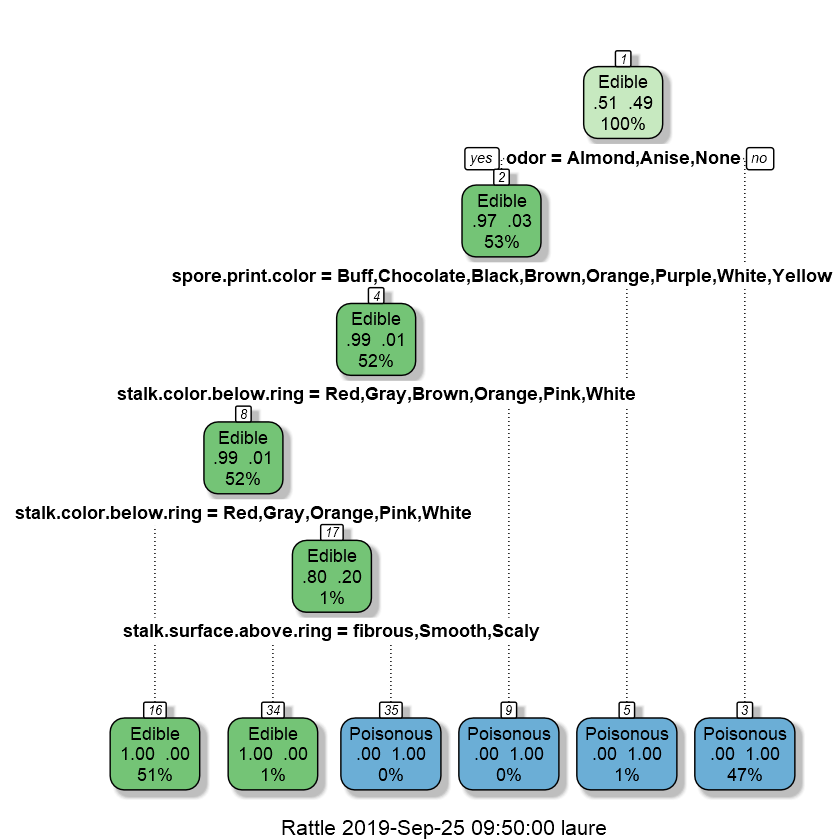

In [17]:
# I tried different combination of Variables against Decision Class 
model1 <- rpart( class ~ odor+spore.print.color+gill.color+stalk.surface.above.ring+stalk.color.below.ring+ring.type,
                 data=mush_train,method="class",control = rpart.control(cp = 0, maxdepth = 8,minsplit = 10))
summary(model1)
plotcp(model1)
printcp(model1)
fancyRpartPlot(model1)  # Visual of tree
predicted=predict(model1,mush_test_nolabels,type="class")
Results<-data.frame(predicted=predicted,Actual=TestClassLabels)
(table(Results))  # Shows Actual vs Predicted in Console
confusionMatrix(predicted,TestClassLabels)

#class ~ cap.color+cap.shape+habitat 
# Accuracy Comes in at 78%. 

Call:
rpart(formula = class ~ cap.color + cap.shape + habitat, data = mush_train, 
    method = "class", minsplit = 2, minbucket = 1)
  n= 5687 

          CP nsplit rel error    xerror       xstd
1 0.36241854      0 1.0000000 1.0000000 0.01364613
2 0.04706734      1 0.6375815 0.6375815 0.01262378
3 0.02643012      3 0.5434468 0.5434468 0.01203441
4 0.01774077      5 0.4905865 0.4905865 0.01163184
5 0.01267198      6 0.4728458 0.4728458 0.01148399
6 0.01000000      7 0.4601738 0.4630702 0.01139963

Variable importance
  habitat cap.shape cap.color 
       66        18        17 

Node number 1: 5687 observations,    complexity param=0.3624185
  predicted class=Edible     expected loss=0.4856691  P(node) =1
    class counts:  2925  2762
   probabilities: 0.514 0.486 
  left son=2 (4052 obs) right son=3 (1635 obs)
  Primary splits:
      habitat   splits as  LLRLRRL,    improve=471.27490, (0 missing)
      cap.shape splits as  LRRRLR,     improve=100.37250, (0 missing)
      cap.color sp

           Actual
predicted   Edible Poisonous
  Edible      1108       370
  Poisonous    175       784

Confusion Matrix and Statistics

           Reference
Prediction  Edible Poisonous
  Edible      1108       370
  Poisonous    175       784
                                          
               Accuracy : 0.7764          
                 95% CI : (0.7593, 0.7928)
    No Information Rate : 0.5265          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5476          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.8636          
            Specificity : 0.6794          
         Pos Pred Value : 0.7497          
         Neg Pred Value : 0.8175          
             Prevalence : 0.5265          
         Detection Rate : 0.4547          
   Detection Prevalence : 0.6065          
      Balanced Accuracy : 0.7715          
                                          
       'Positive' Class : Edible          

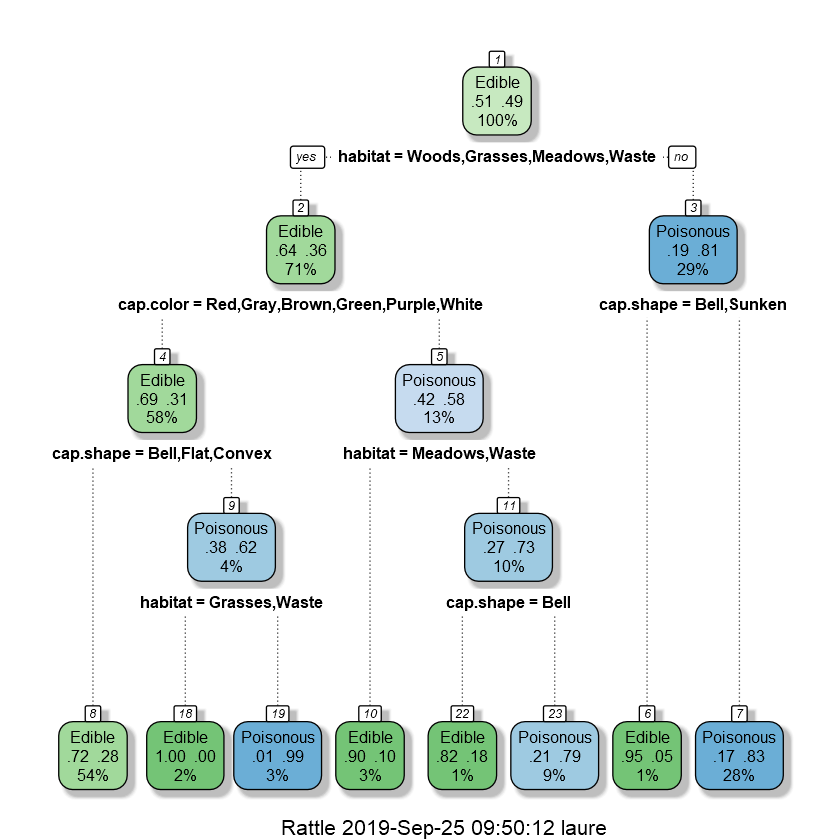

In [18]:
# We can do this for all other combinations but looks like Odor and Spore.print.color are variables of Importance.
model2 <- rpart( class ~ cap.color+cap.shape+habitat, data=mush_train,method="class",minsplit = 2, minbucket = 1)
summary(model2)
fancyRpartPlot(model2) # Visual of tree
predicted=predict(model2,mush_test_nolabels,type="class")
Results<-data.frame(predicted=predicted,Actual=TestClassLabels)
(table(Results))
confusionMatrix(predicted,TestClassLabels)
#model <- rpart( class ~ cap.shape, data=mush_train,method="class",minsplit = 2, minbucket = 1)
#model <- rpart( class ~ habitat, data=mush_train,method="class",minsplit = 2, minbucket = 1)

In [19]:
# Another Sample method to validate our results from previous Model
every7_indexes<-seq(1,nrow(m2),7)
mush_Df_sampletest=m2[every7_indexes, ]
mush_Df_sampletrain=m2[-every7_indexes, ]
str(mush_Df_sampletrain)
dim(mush_Df_sampletrain)
mush_test_labels<-mush_Df_sampletest$class
mush_Df_sampletest1<-mush_Df_sampletest[-c(1)]

head(mush_test_labels)
TestClassLabels1<-mush_test_labels
dim(mush_Df_sampletest1)
model_new <- rpart( class ~ ., data=mush_Df_sampletrain,method="class")
#model_new <- rpart( class ~ habitat, data=mush_Df_sampletrain,method="class",minsplit = 2, minbucket = 1)
summary(model)

jpeg("DecisionTree_Mushroom_Sample2.jpg")
fancyRpartPlot(model_new)  # Visual of tree
dev.off()


# Do the Prediction using Sample 2
predicted=predict(model_new,mush_Df_sampletest1,type="class")
Results<-data.frame(predicted=predicted,Actual=TestClassLabels1)
(table(Results))

# Calculate Accuracy using the ConfusionMatrix. Accuracy comes in at 99%
confusionMatrix(predicted,TestClassLabels1)

length(TestClassLabels1)

'data.frame':	6963 obs. of  22 variables:
 $ class                   : Factor w/ 2 levels "Edible","Poisonous": 1 1 2 1 1 1 2 1 1 1 ...
 $ cap.shape               : Factor w/ 6 levels "Bell","Conical",..: 6 1 6 6 6 1 6 1 6 6 ...
 $ cap.surface             : Factor w/ 4 levels "Fibrous","Grooves",..: 3 3 4 3 4 3 4 3 4 4 ...
 $ cap.color               : Factor w/ 10 levels "Buff","Cinnamon",..: 10 9 9 4 10 9 9 10 10 10 ...
 $ bruises                 : Factor w/ 2 levels "No","Bruises": 2 2 2 1 2 2 2 2 2 2 ...
 $ odor                    : Factor w/ 9 levels "Almond","Creosote",..: 1 4 7 6 1 1 7 1 4 1 ...
 $ gill.attachment         : Factor w/ 2 levels "Attached","Free": 2 2 2 2 2 2 2 2 2 2 ...
 $ gill.spacing            : Factor w/ 2 levels "Close","Crowded": 1 1 1 2 1 1 1 1 1 1 ...
 $ gill.size               : Factor w/ 2 levels "Broad","Narrow": 1 1 2 1 1 1 2 1 1 1 ...
 $ gill.color              : Factor w/ 12 levels "Buff","Red","Gray",..: 5 6 6 5 6 3 8 3 3 6 ...
 $ stalk.shape        

[1] 6963   22

[1] Poisonous Edible    Edible    Poisonous Edible    Edible   
Levels: Edible Poisonous

[1] 1161   21

Call:
rpart(formula = class ~ ., data = mush_train, method = "class", 
    parms = list(split = "gini"))
  n= 5687 

          CP nsplit  rel error     xerror        xstd
1 0.97175959      0 1.00000000 1.00000000 0.013646129
2 0.01629254      1 0.02824041 0.02824041 0.003175592
3 0.01000000      2 0.01194786 0.01194786 0.002073813

Variable importance
                    odor        spore.print.color               gill.color 
                      25                       19                       15 
stalk.surface.above.ring                ring.type stalk.surface.below.ring 
                      14                       14                       13 

Node number 1: 5687 observations,    complexity param=0.9717596
  predicted class=Edible     expected loss=0.4856691  P(node) =1
    class counts:  2925  2762
   probabilities: 0.514 0.486 
  left son=2 (3003 obs) right son=3 (2684 obs)
  Primary splits:
      odor                     splits as  LRRLRLRRR,    improve=2689.2160, (0 missing)

png 
  2

           Actual
predicted   Edible Poisonous
  Edible       597         4
  Poisonous      0       560

Confusion Matrix and Statistics

           Reference
Prediction  Edible Poisonous
  Edible       597         4
  Poisonous      0       560
                                          
               Accuracy : 0.9966          
                 95% CI : (0.9912, 0.9991)
    No Information Rate : 0.5142          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9931          
                                          
 Mcnemar's Test P-Value : 0.1336          
                                          
            Sensitivity : 1.0000          
            Specificity : 0.9929          
         Pos Pred Value : 0.9933          
         Neg Pred Value : 1.0000          
             Prevalence : 0.5142          
         Detection Rate : 0.5142          
   Detection Prevalence : 0.5177          
      Balanced Accuracy : 0.9965          
                                          
       'Positive' Class : Edible          

[1] 1161

## Random Forest

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:rattle':

    importance

The following object is masked from 'package:dplyr':

    combine

The following object is masked from 'package:ggplot2':

    margin



,class,cap.shape,cap.surface,cap.color,bruises,odor,gill.attachment,gill.spacing,gill.size,gill.color,...,stalk.surface.above.ring,stalk.surface.below.ring,stalk.color.above.ring,stalk.color.below.ring,veil.color,ring.number,ring.type,spore.print.color,population,habitat
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,...,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
6751,Poisonous,Convex,Smooth,Red,No,Spicy,Free,Close,Narrow,Buff,...,Silky,Smooth,White,White,White,One,Evanescent,White,Several,Leaves
7913,Edible,Bell,Smooth,Gray,No,None,Free,Crowded,Broad,Pink,...,Smooth,Silky,White,White,White,Two,Pendant,White,Numerous,Grasses
1474,Edible,Flat,Fibrous,White,No,None,Free,Crowded,Broad,Pink,...,Smooth,fibrous,White,White,White,One,Evanescent,Brown,Scattered,Grasses
2196,Edible,Convex,Scaly,Red,Bruises,None,Free,Close,Broad,Brown,...,Smooth,Smooth,Gray,White,White,One,Pendant,Brown,Several,Woods
4075,Edible,Flat,Scaly,Brown,Bruises,None,Free,Close,Broad,Pink,...,Smooth,Smooth,Gray,Gray,White,One,Pendant,Brown,Several,Woods
2597,Edible,Convex,Scaly,Brown,Bruises,None,Free,Close,Broad,White,...,Smooth,Smooth,Gray,Gray,White,One,Pendant,Brown,Solitary,Woods


Confusion Matrix and Statistics

           Reference
Prediction  Edible Poisonous
  Edible      1283         0
  Poisonous      0      1154
                                     
               Accuracy : 1          
                 95% CI : (0.9985, 1)
    No Information Rate : 0.5265     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.5265     
         Detection Rate : 0.5265     
   Detection Prevalence : 0.5265     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : Edible     
                                     


Call:
 randomForest(formula = class ~ ., data = mush_train, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 4

        OOB estimate of  error rate: 0%
Confusion matrix:
          Edible Poisonous class.error
Edible      2925         0           0
Poisonous      0      2762           0


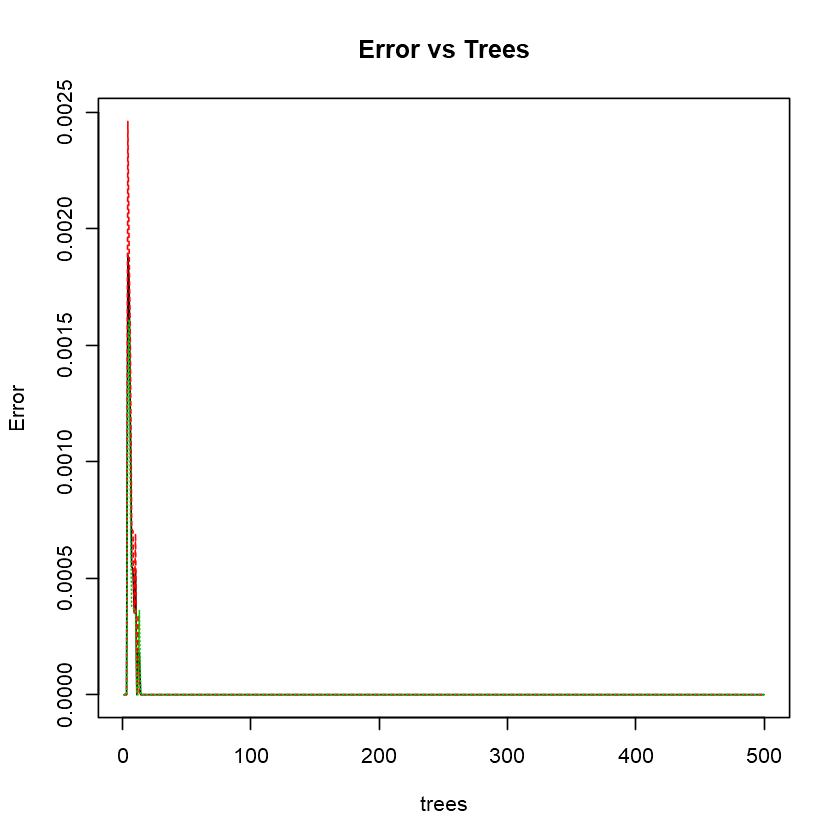

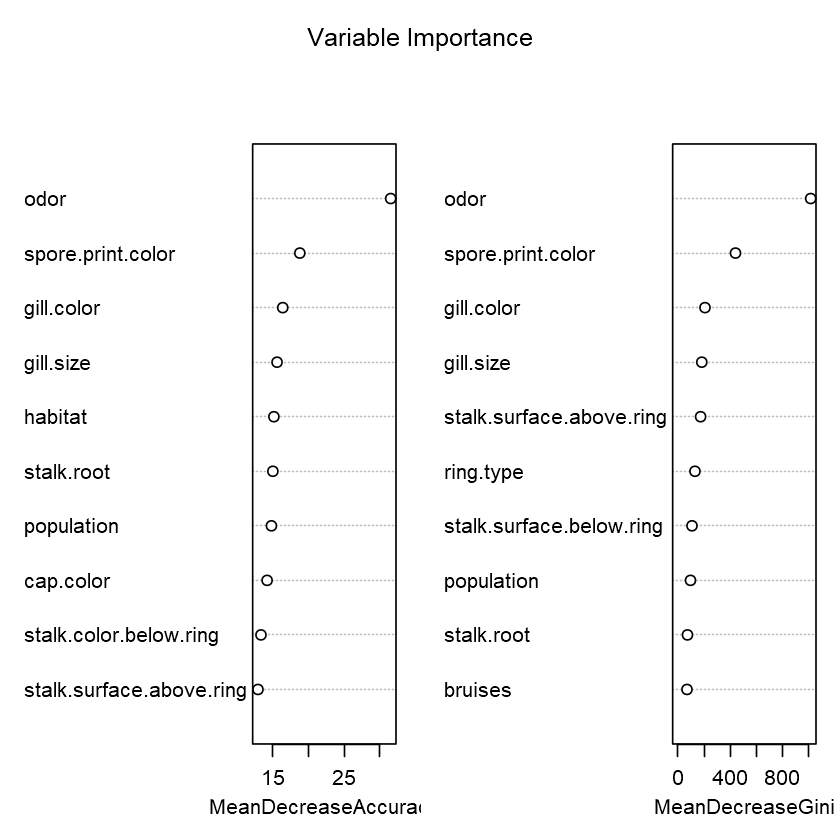

                         MeanDecreaseGini                Variables
odor                         1017.9916452                     odor
spore.print.color             441.0614764        spore.print.color
gill.color                    207.2592560               gill.color
gill.size                     182.6167677                gill.size
stalk.surface.above.ring      173.6218375 stalk.surface.above.ring
ring.type                     130.3526778                ring.type
stalk.surface.below.ring      107.5209874 stalk.surface.below.ring
population                     96.0830618               population
stalk.root                     72.8617743               stalk.root
bruises                        69.2320659                  bruises
habitat                        66.7852374                  habitat
gill.spacing                   58.2739123             gill.spacing
stalk.color.above.ring         42.1055472   stalk.color.above.ring
cap.color                      38.7896244                cap.c

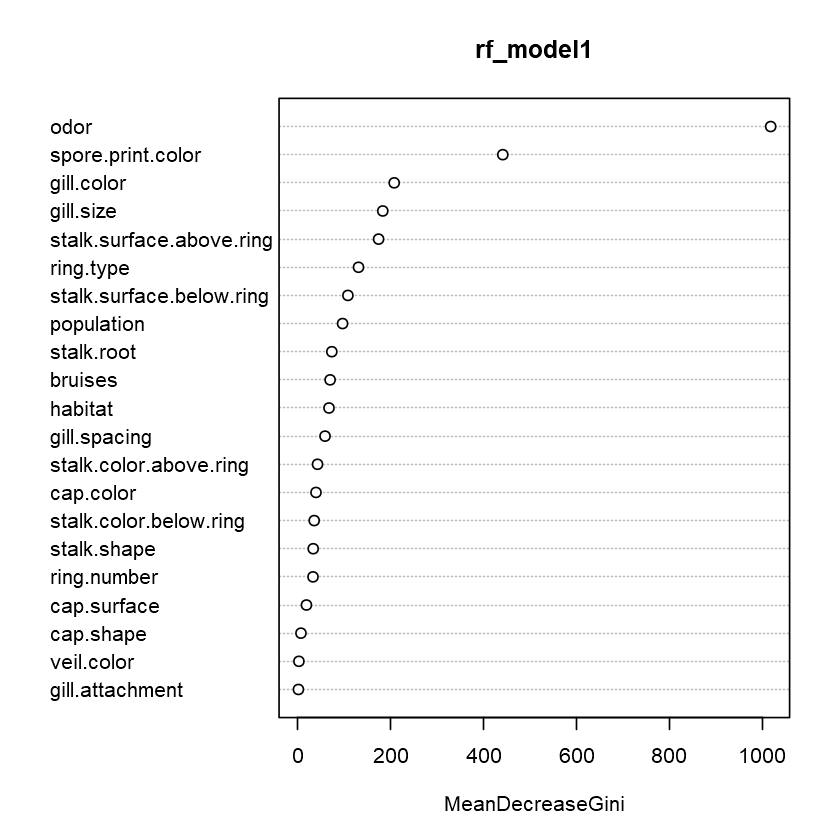

In [20]:
#================================================================================
# Random Forest to predict the importance of Variables and avoid overfitting (Baskar Dakshin)
#================================================================================

#install.packages("randomForest")
library(randomForest)


# Default model with ntree=500
set.seed(100)
head(mush_train)
rf_model1 = randomForest(class ~ .,
                         data = mush_train,importance=TRUE)
plot(rf_model1,main='Error vs Trees')

# Evaluate the performance of the model
predict_rf <- predict(rf_model1, newdata = mush_test_nolabels)
confusionMatrix(predict_rf, TestClassLabels)

# Plotting the Variables according to its Importance
print(rf_model1)

varImpPlot(rf_model1,
           sort = T,
           n.var = 10,
           main = "Variable Importance")

varImpPlot(rf_model1,type=2)

# Create a dataframe with Variable Importance
var.imp = data.frame(importance(rf_model1,type=2))

# List Variables according to its importance derived from Gini MeanDecrease
var.imp$Variables = row.names(var.imp)
print(var.imp[order(var.imp$MeanDecreaseGini,decreasing = T),])

Confusion Matrix and Statistics

           Reference
Prediction  Edible Poisonous
  Edible      1283         0
  Poisonous      0      1154
                                     
               Accuracy : 1          
                 95% CI : (0.9985, 1)
    No Information Rate : 0.5265     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.5265     
         Detection Rate : 0.5265     
   Detection Prevalence : 0.5265     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : Edible     
                                     

Random Forest 

5687 samples
  21 predictor
   2 classes: 'Edible', 'Poisonous' 

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 3 times) 
Summary of sample sizes: 4549, 4550, 4550, 4550, 4549, 4550, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   2    0.9657703  0.9313338
   4    0.9997069  0.9994133
   8    1.0000000  1.0000000
  16    1.0000000  1.0000000

Kappa was used to select the optimal model using the largest value.
The final value used for the model was mtry = 8.

Random Forest 

5687 samples
  21 predictor
   2 classes: 'Edible', 'Poisonous' 

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 3 times) 
Summary of sample sizes: 4549, 4550, 4550, 4550, 4549, 4550, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   2    0.9657703  0.9313338
   4    0.9997069  0.9994133
   8    1.0000000  1.0000000
  16    1.0000000  1.0000000

Kappa was used to select the optimal model using the largest value.
The final value used for the model was mtry = 8.


           Actual
predicted   Edible Poisonous
  Edible      1283         0
  Poisonous      0      1154

Confusion Matrix and Statistics

           Reference
Prediction  Edible Poisonous
  Edible      1283         0
  Poisonous      0      1154
                                     
               Accuracy : 1          
                 95% CI : (0.9985, 1)
    No Information Rate : 0.5265     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.5265     
         Detection Rate : 0.5265     
   Detection Prevalence : 0.5265     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : Edible     
                                     

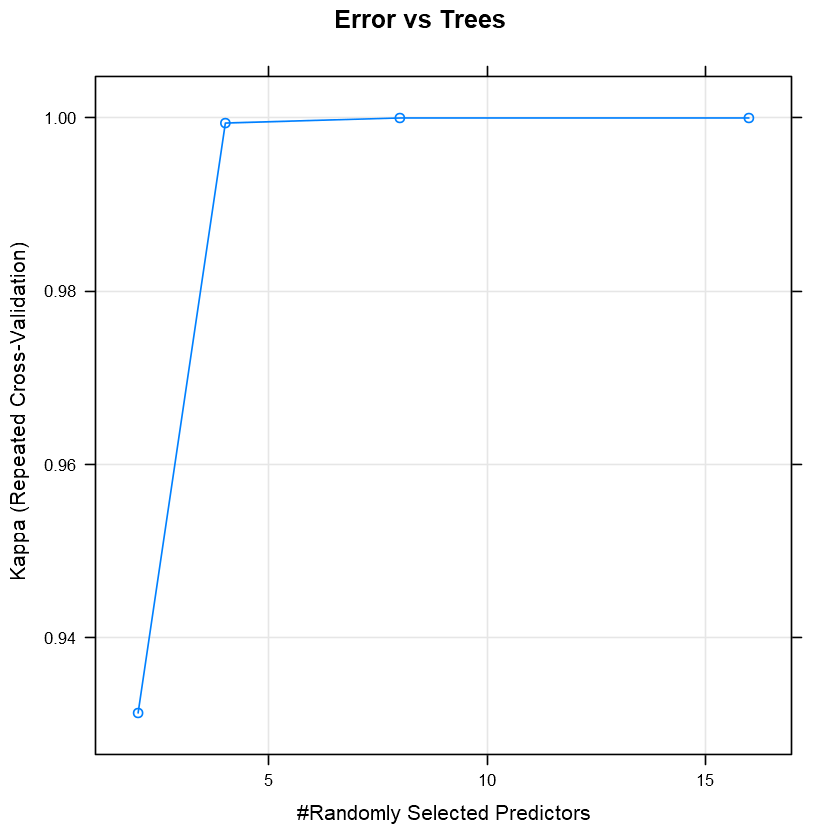

In [21]:
# Evaluate the performance of the model1
predict_rf <- predict(rf_model1, newdata = mush_test_nolabels)
confusionMatrix(predict_rf, TestClassLabels)

# Creating a RF model with Different mtry and ntrees
# This takes a while to run (~15 min) as we are tuning the model with different mtry values
ctrl <- trainControl(method = "repeatedcv", number = 5, repeats = 3)
grid_rf <- expand.grid(.mtry = c(2,4,8,16))
# Kappa was used to select the optimal model using the largest value.
# The final value used for the model was mtry = 4.
rf_model2 <- train(class ~ ., data = mush_train, method = "rf", metric = "Kappa", trControl = ctrl, tuneGrid = grid_rf)
rf_model2
plot(rf_model2,main='Error vs Trees')

print(rf_model2)

# Do the prediction
rfPredict=predict(rf_model2,mush_test_nolabels)
Results<-data.frame(predicted=rfPredict,Actual=TestClassLabels)
(table(Results))

# Calculate Accuracy using the ConfusionMatrix: Accuracy comes in at 99%
# Random Forest Accuracy comes in at 100% compared to Decision Tree Accuracy of 99.38% 
confusionMatrix(rfPredict,TestClassLabels)

## K-Nearest Neighbors Classification

Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
"These variables have zero variances: cap.shapeConical"Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
"These variables have zero variances: cap.shapeConical"Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
"These variables have zero variances: cap.shapeConical"Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
"These variables have zero variances: cap.shapeConical"Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
"These variables have zero variances: cap.shapeConical"Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
"These variables have zero variances: cap.shapeConical"Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
"These variables have zero

421.27 sec elapsed


k-Nearest Neighbors 

5687 samples
  21 predictor
   2 classes: 'Edible', 'Poisonous' 

Pre-processing: centered (95), scaled (95) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 5118, 5119, 5118, 5119, 5118, 5118, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   5  0.9994723  0.9989437
   7  0.9994138  0.9988264
   9  0.9990619  0.9981219
  11  0.9990619  0.9981219
  13  0.9991204  0.9982392
  15  0.9985924  0.9971817
  17  0.9980647  0.9961254
  19  0.9974200  0.9948345
  21  0.9968926  0.9937786
  23  0.9973028  0.9945998

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 5.

            Length Class      Mode     
learn        2     -none-     list     
k            1     -none-     numeric  
theDots      0     -none-     list     
xNames      95     -none-     character
problemType  1     -none-     character
tuneValue    1     data.frame list     
obsLevels    2     -none-     character
param        0     -none-     list     

Confusion Matrix and Statistics

           Reference
Prediction  Edible Poisonous
  Edible      1283         0
  Poisonous      0      1154
                                     
               Accuracy : 1          
                 95% CI : (0.9985, 1)
    No Information Rate : 0.5265     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.5265     
         Detection Rate : 0.5265     
   Detection Prevalence : 0.5265     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : Edible     
                                     

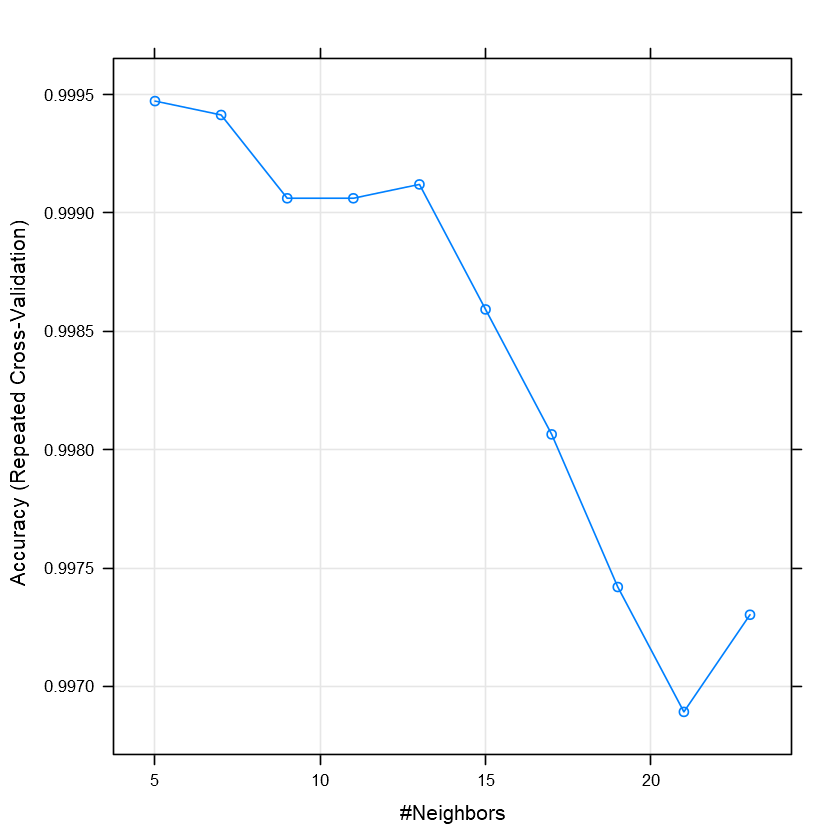

In [22]:
#================================================================================
# K-Nearest Neighbours (Baskar Dakshin)
#================================================================================
#install.packages("class")
library(class)
#install.packages("gmodels")
library(gmodels)
#install.packages("tictoc")
library(tictoc)

set.seed(101)
tic()

#knn_model <- knn(train=mush_train, test=mushroom,cl=TrainClassLabels,k=11)  # Create KNN model

# Training the Knn model                                                               
trctrl <- trainControl(method = "repeatedcv", number = 10, repeats = 3,classProbs = TRUE)
# Training the model -> Will run for 302.954 sec 
knn_fit <- train(class~., data=mush_train, method = "knn",
                 trControl=trctrl,
                 preProcess = c("center", "scale"),
                 tuneLength = 10)
toc()
knn_fit
# Accuracy was used to select the optimal model using the largest value.
# The final value used for the model was k = 7.
summary(knn_fit)
plot(knn_fit)

# Evaluate the performance of the model
knnPredict<-predict(knn_fit,mush_test_nolabels)

# How Accurately our model is working?
confusionMatrix(knnPredict,TestClassLabels)

## Support Vector Machines (SVM)

In [24]:
#================================================================================
#Support Vector Machines (Baskar)
#================================================================================

# Create SVM Model with default Values and do the prediction
svm_model <- svm(class~., data=mush_train, type='C-classification', kernel='radial') 
# We set the kernel to radial as this data set does not a have a linear plane that can be drawn
summary(svm_model)

test_svm <-predict(svm_model,mush_test_nolabels)  # Predicting with the new SVM model


mean(test_svm==TestClassLabels)  # Percentage of testset predicted correctly by svm
Results<-data.frame(predicted=test_svm,Actual=TestClassLabels)
table(Results)  # Confusion matrix of the predictions of the svm and the test data

# Perform a SVM tune to get the optimal Cost and Gamma Values-10-fold cross validation
# (Takes a while to run)
svm_tune <- tune(svm, class~., data = mush_train,                              
                 kernel="radial", ranges=list(cost=10^(-1:2), gamma=c(.5,1,2)))
# Best Parameters:
# cost gamma
#  1   0.5
print(svm_tune)

trctrl <- trainControl(method = "repeatedcv", number = 10, repeats = 3,classProbs = TRUE)

set.seed(101)
# Support Vector Machines with Linear Kernel and 10 Fold Cross-Validation
model_fit <- train(class~., data=mush_train, method = "svmLinear",
                   trControl=trctrl,
                   preProcess = c("center", "scale"),
                   tuneLength = 10)

print(model_fit);
# Classify from our reserved test set.
testing_set_predict = predict(model_fit, newdata = mush_test_nolabels); 
# Verifying our model from the classifications.
table(testing_set_predict, TestClassLabels);
confusionMatrix(testing_set_predict,TestClassLabels)

# Run the SVM Model one more time with tuned Gamma and Cost Values

svm_model1 <- svm(class~., data=mush_train, type='C-classification', kernel='radial',cost=1,gamma=0.5)
# Classify from our reserved test set.
testing_set_predict1 = predict(svm_model1, newdata = mush_test_nolabels); 
# Verifying our model from the classifications.
table(testing_set_predict1, TestClassLabels);
confusionMatrix(testing_set_predict1,TestClassLabels)


Call:
svm(formula = class ~ ., data = mush_train, type = "C-classification", 
    kernel = "radial")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  524

 ( 265 259 )


Number of Classes:  2 

Levels: 
 Edible Poisonous




[1] 0.9971276

           Actual
predicted   Edible Poisonous
  Edible      1283         7
  Poisonous      0      1147


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma
    1   0.5

- best performance: 0 



Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
"These variables have zero variances: cap.shapeConical"Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
"These variables have zero variances: cap.shapeConical"Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
"These variables have zero variances: cap.shapeConical"Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."

Support Vector Machines with Linear Kernel 

5687 samples
  21 predictor
   2 classes: 'Edible', 'Poisonous' 

Pre-processing: centered (95), scaled (95) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 5118, 5119, 5118, 5119, 5118, 5118, ... 
Resampling results:

  Accuracy  Kappa
  1         1    

Tuning parameter 'C' was held constant at a value of 1


                   TestClassLabels
testing_set_predict Edible Poisonous
          Edible      1283         0
          Poisonous      0      1154

Confusion Matrix and Statistics

           Reference
Prediction  Edible Poisonous
  Edible      1283         0
  Poisonous      0      1154
                                     
               Accuracy : 1          
                 95% CI : (0.9985, 1)
    No Information Rate : 0.5265     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.5265     
         Detection Rate : 0.5265     
   Detection Prevalence : 0.5265     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : Edible     
                                     

                    TestClassLabels
testing_set_predict1 Edible Poisonous
           Edible      1283         0
           Poisonous      0      1154

Confusion Matrix and Statistics

           Reference
Prediction  Edible Poisonous
  Edible      1283         0
  Poisonous      0      1154
                                     
               Accuracy : 1          
                 95% CI : (0.9985, 1)
    No Information Rate : 0.5265     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.5265     
         Detection Rate : 0.5265     
   Detection Prevalence : 0.5265     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : Edible     
                                     

## Clustering

In [25]:
#================================================================================
# Clustering using K-Means,K-mode, Rock, etc. (Baskar Dakshin)
#================================================================================

#install.packages("factoextra")
library(factoextra)  # for DBSCAN
#install.packages("klaR")
library(klaR)
#install.packages("cba")
library(cba)

# Reading the dataset again
filename="mushrooms.csv"
mushroomDf<- read.csv(filename, header = TRUE, na.strings = "NA")
any(is.na(mushroomDf))
# Removing the Class variable and Veil.type from the dataset
mushroomDf.torun <- subset(mushroomDf, select = -c(class, veil.type))

Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ
Loading required package: MASS

Attaching package: 'MASS'

The following object is masked from 'package:dplyr':

    select

Loading required package: grid
Loading required package: proxy

Attaching package: 'proxy'

The following object is masked from 'package:Matrix':

    as.matrix

The following objects are masked from 'package:stats':

    as.dist, dist

The following object is masked from 'package:base':

    as.matrix



[1] FALSE

### K-Means Clustering

 num [1:8124, 1:96] 0 0 1 0 0 0 1 1 0 1 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:8124] "1" "2" "3" "4" ...
  ..$ : chr [1:96] "cap.shapeb" "cap.shapec" "cap.shapef" "cap.shapek" ...
 - attr(*, "assign")= int [1:96] 1 1 1 1 1 1 2 2 2 3 ...
 - attr(*, "contrasts")=List of 21
  ..$ cap.shape               : chr "contr.treatment"
  ..$ cap.surface             : chr "contr.treatment"
  ..$ cap.color               : chr "contr.treatment"
  ..$ bruises                 : chr "contr.treatment"
  ..$ odor                    : chr "contr.treatment"
  ..$ gill.attachment         : chr "contr.treatment"
  ..$ gill.spacing            : chr "contr.treatment"
  ..$ gill.size               : chr "contr.treatment"
  ..$ gill.color              : chr "contr.treatment"
  ..$ stalk.shape             : chr "contr.treatment"
  ..$ stalk.root              : chr "contr.treatment"
  ..$ stalk.surface.above.ring: chr "contr.treatment"
  ..$ stalk.surface.below.ring: chr "contr.treatment"
  ..$ stalk.c

[1] 0.8953717

[1] 0.8945101

[1] 0.8938946

[1] 0.8936484


Attaching package: 'gridExtra'

The following object is masked from 'package:randomForest':

    combine

The following object is masked from 'package:dplyr':

    combine



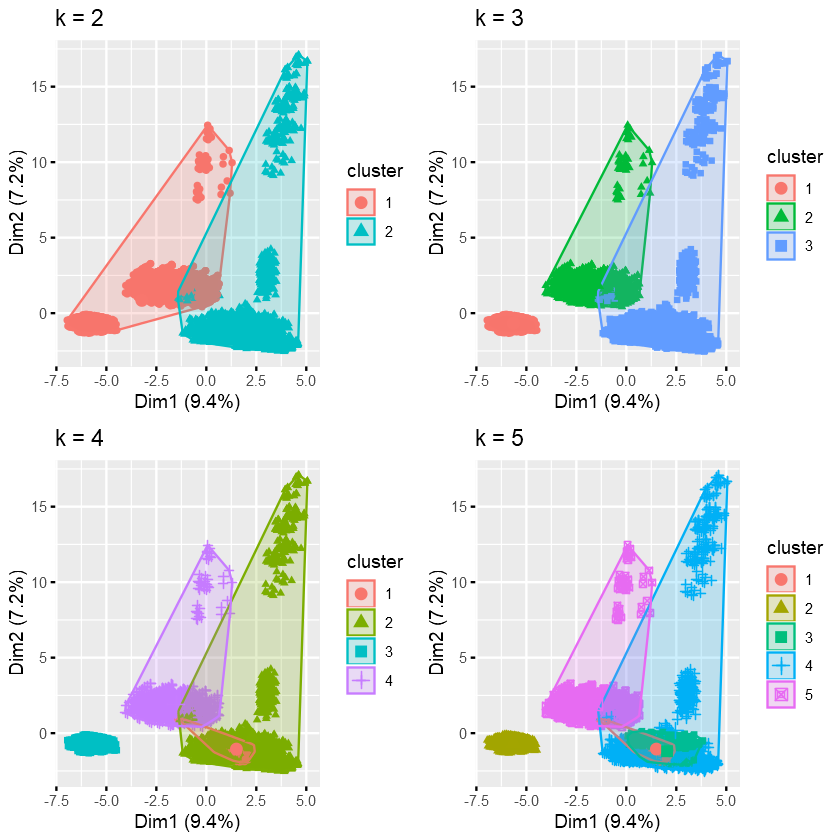

In [26]:
##########
# Clustering using k-means by one-hot encoding
# This is basically creating dummy variables for each value of the category, for all the variables.
mushroomDf.torun.ohe <- model.matrix(~.-1, data=mushroomDf.torun)

str(mushroomDf.torun.ohe)

set.seed(20)  # For reproducibility
# Nstart = 50, indicates R will run 50 different random starting assignments 
# and selects the lowest within cluster variation
result.kmean = kmeans(mushroomDf.torun.ohe, 2, nstart = 50, iter.max = 15) 
#print(result.kmean)
result.kmean3 <- kmeans(mushroomDf.torun.ohe, centers = 3, nstart = 25)
result.kmean4 <- kmeans(mushroomDf.torun.ohe, centers = 4, nstart = 25)
result.kmean5 <- kmeans(mushroomDf.torun.ohe, centers = 5, nstart = 25)


# Purity of clustering is a simple measure of the accuracy, which is between 0 and 1. 
# 0 indicates poor clustering, and 1 indicates perfect clustering

# Purity of Cluster with K=2
result.kmean.mm <- table(mushroomDf$class, result.kmean$cluster)
purity.kmean <- sum(apply(result.kmean.mm, 2, max)) / nrow(mushroomDf.torun)
purity.kmean
# Purity of Cluster with K=3
result.kmean3.mm <- table(mushroomDf$class, result.kmean3$cluster)
purity.kmean3 <- sum(apply(result.kmean3.mm, 2, max)) / nrow(mushroomDf.torun)
purity.kmean3
# Purity of Cluster with K=4
result.kmean4.mm <- table(mushroomDf$class, result.kmean4$cluster)
purity.kmean4 <- sum(apply(result.kmean4.mm, 2, max)) / nrow(mushroomDf.torun)
purity.kmean4
# Purity of Cluster with K=5
result.kmean5.mm <- table(mushroomDf$class, result.kmean5$cluster)
purity.kmean5 <- sum(apply(result.kmean5.mm, 2, max)) / nrow(mushroomDf.torun)
purity.kmean5

# Creating plots to compare between different K-Values
p1 <- fviz_cluster(result.kmean, geom = "point", data = mushroomDf.torun.ohe) + ggtitle("k = 2")
p2 <- fviz_cluster(result.kmean3, geom = "point",  data = mushroomDf.torun.ohe) + ggtitle("k = 3")
p3 <- fviz_cluster(result.kmean4, geom = "point",  data = mushroomDf.torun.ohe) + ggtitle("k = 4")
p4 <- fviz_cluster(result.kmean5, geom = "point",  data = mushroomDf.torun.ohe) + ggtitle("k = 5")

#install.packages("gridExtra")
library(gridExtra)
grid.arrange(p1, p2, p3, p4, nrow = 2)


### K-Mode Clustering

   
       1    2
  e 3200 1008
  p 1932 1984

[1] 0.6381093

   
       1    2    3
  e 1248   30 2930
  p  152 3064  700

[1] 0.8914328

[1] 0.8838011

[1] 0.8893402

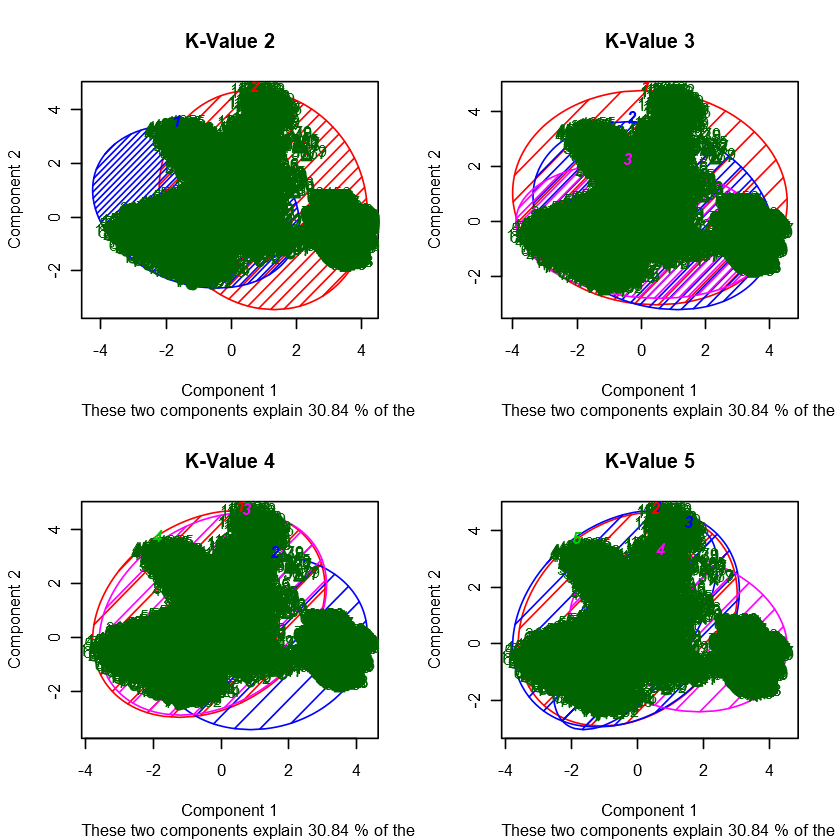

In [27]:
##########
# Clustering using K-mode with different K-Values 

set.seed(20)  # For reproducibility
# Nstart = 50, indicates R will run 50 different random starting assignments 
# and selects the lowest within cluster variation
result.kmode <- kmodes(mushroomDf.torun.ohe, 2, iter.max = 50, weighted = FALSE)
#print(result.kmode)
result.kmode.mm <- table(mushroomDf$class, result.kmode$cluster)
result.kmode.mm
purity.kmode <- sum(apply(result.kmode.mm, 2, max)) / nrow(mushroomDf.torun)
purity.kmode
result.kmode3 <- kmodes(mushroomDf.torun.ohe,3,iter.max = 50, weighted = FALSE)
#print(result.kmode3)
result.kmode3.mm <- table(mushroomDf$class, result.kmode3$cluster)
result.kmode3.mm
purity.kmode3 <- sum(apply(result.kmode3.mm, 2, max)) / nrow(mushroomDf.torun)
purity.kmode3
result.kmode4 <- kmodes(mushroomDf.torun.ohe,4,iter.max = 50, weighted = FALSE)
#print(result.kmode4)
result.kmode4.mm <- table(mushroomDf$class, result.kmode4$cluster)
purity.kmode4 <- sum(apply(result.kmode4.mm, 2, max)) / nrow(mushroomDf.torun)
purity.kmode4
result.kmode5 <- kmodes(mushroomDf.torun.ohe,5,iter.max = 50, weighted = FALSE)
#print(result.kmode5)
result.kmode5.mm <- table(mushroomDf$class, result.kmode5$cluster)
purity.kmode5 <- sum(apply(result.kmode5.mm, 2, max)) / nrow(mushroomDf.torun)
purity.kmode5

# Plots to compare
par(mfrow=c(2,2))
clusplot(mushroomDf.torun, result.kmode$cluster, color=TRUE, shade=TRUE, labels=2, lines=0,main='K-Value 2') 
clusplot(mushroomDf.torun, result.kmode3$cluster, color=TRUE, shade=TRUE, labels=2, lines=0,main='K-Value 3')
clusplot(mushroomDf.torun, result.kmode4$cluster, color=TRUE, shade=TRUE, labels=2, lines=0,main='K-Value 4')
clusplot(mushroomDf.torun, result.kmode5$cluster, color=TRUE, shade=TRUE, labels=2, lines=0,main='K-Value 5')


### Rock Clustering

In [28]:
##########
# Clustering using Rock
mushroom.torun.binary <- as.dummy(mushroomDf.torun)
result.rock <-rockCluster(mushroom.torun.binary, n=5, theta=0.8)
result.rock.mm<-table(mushroomDf$class, result.rock$cl)
purity.rock <- sum(apply(result.rock.mm, 2, max)) / nrow(mushroomDf.torun)
purity.rock


Clustering:
computing distances ...
computing links ...
computing clusters ...
rockMerge: terminated with 21 clusters


[1] 0.9960611

### Hierarchical Clustering

odor,stalk.color.below.ring,stalk.color.above.ring,habitat,gill.size,gill.color,population,ring.number
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
p,w,w,u,n,k,s,o
a,w,w,g,b,k,n,o
l,w,w,m,b,n,n,o
p,w,w,u,n,n,s,o
n,w,w,g,b,k,a,o
a,w,w,g,b,n,n,o


odora,odorc,odorf,odorl,odorm,odorn,odorp,odors,odory,stalk.color.below.ringc,...,gill.coloru,gill.colorw,gill.colory,populationc,populationn,populations,populationv,populationy,ring.numbero,ring.numbert
-0.2275528,-0.1555724,-0.6017711,-0.2275528,-0.066712,-0.8760876,5.5435180,-0.2762286,-0.2762286,-0.066712,...,-0.2538848,-0.4166868,-0.1034305,-0.2089832,-0.2275528,2.347113,-0.9945373,-0.516688,0.2914197,-0.2823739
4.3940440,-0.1555724,-0.6017711,-0.2275528,-0.066712,-0.8760876,-0.1803687,-0.2762286,-0.2762286,-0.066712,...,-0.2538848,-0.4166868,-0.1034305,-0.2089832,4.3940440,-0.426003,-0.9945373,-0.516688,0.2914197,-0.2823739
-0.2275528,-0.1555724,-0.6017711,4.3940440,-0.066712,-0.8760876,-0.1803687,-0.2762286,-0.2762286,-0.066712,...,-0.2538848,-0.4166868,-0.1034305,-0.2089832,4.3940440,-0.426003,-0.9945373,-0.516688,0.2914197,-0.2823739
-0.2275528,-0.1555724,-0.6017711,-0.2275528,-0.066712,-0.8760876,5.5435180,-0.2762286,-0.2762286,-0.066712,...,-0.2538848,-0.4166868,-0.1034305,-0.2089832,-0.2275528,2.347113,-0.9945373,-0.516688,0.2914197,-0.2823739
-0.2275528,-0.1555724,-0.6017711,-0.2275528,-0.066712,1.1412978,-0.1803687,-0.2762286,-0.2762286,-0.066712,...,-0.2538848,-0.4166868,-0.1034305,-0.2089832,-0.2275528,-0.426003,-0.9945373,-0.516688,0.2914197,-0.2823739
4.3940440,-0.1555724,-0.6017711,-0.2275528,-0.066712,-0.8760876,-0.1803687,-0.2762286,-0.2762286,-0.066712,...,-0.2538848,-0.4166868,-0.1034305,-0.2089832,4.3940440,-0.426003,-0.9945373,-0.516688,0.2914197,-0.2823739


sub_grp
   1    2    3    4    5 
4426 1766 1296  600   36 

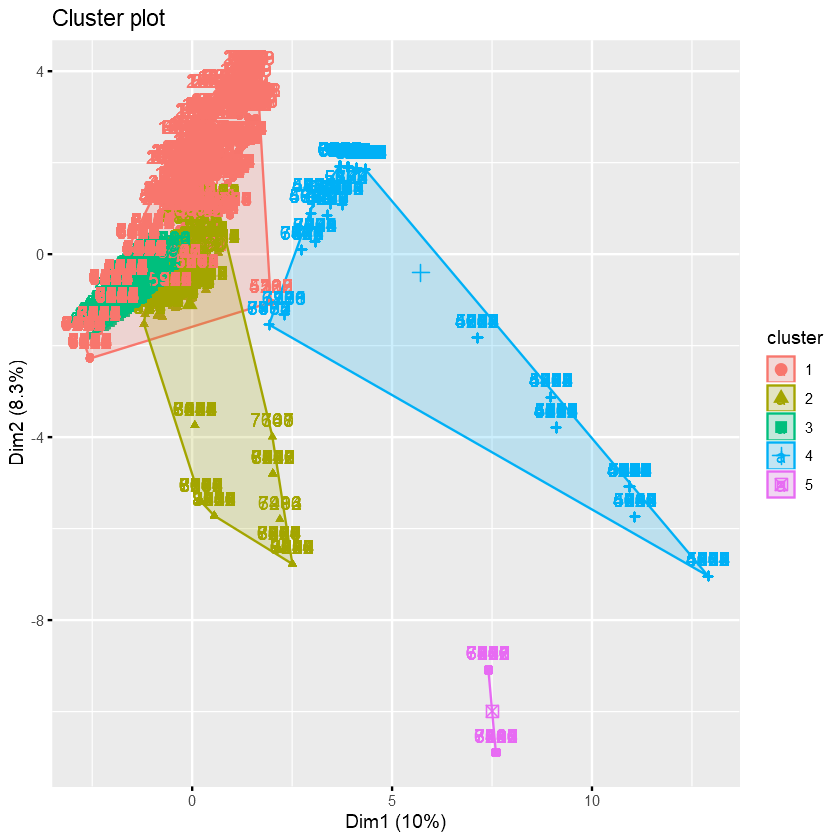

In [29]:
##########
# Compute hierarchical clustering
mushroomDf.torun2 <- subset(mushroomDf, select = c(odor,stalk.color.below.ring,stalk.color.above.ring,habitat,gill.size,gill.color,population,ring.number))
head(mushroomDf.torun2)
# Clustering using k-means by one-hot encoding

# This is basically creating dummy variables for each value of the category, for all the variables.
mushroomDf.torun.ohe2 <- model.matrix(~.-1, data=mushroomDf.torun2)
mushroomDf.torun.ohe3<- scale(mushroomDf.torun.ohe2)
head(mushroomDf.torun.ohe3)
# Dissimilarity matrix
d <- dist(mushroomDf.torun.ohe2, method = "euclidean")

# Hierarchical clustering using Complete Linkage
hc1 <- hclust(d, method = "complete" )


# Cut tree into 4 groups
sub_grp <- cutree(hc1, k = 5)
table(sub_grp)
fviz_cluster(list(data = mushroomDf.torun.ohe2, cluster = sub_grp))

### Enhanced K-Means Clustering

Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 406200)"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 it

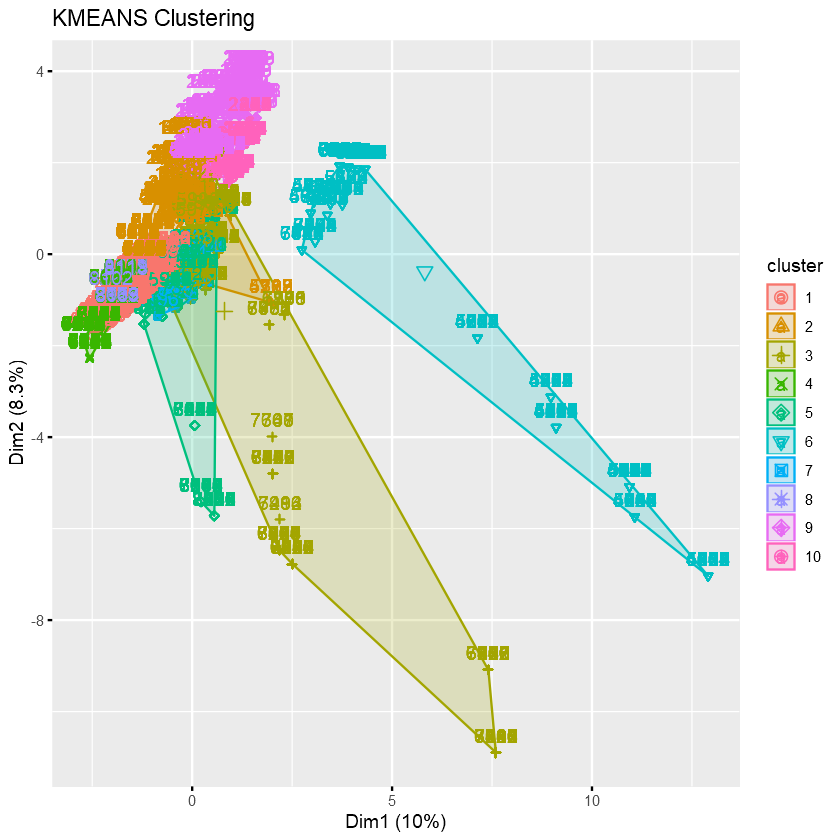

   cluster size ave.sil.width
1        1 1296          0.15
2        2  976          0.14
3        3  804          0.00
4        4  864          0.21
5        5 1040          0.10
6        6  584          0.14
7        7  288          0.33
8        8  432          0.39
9        9 1072          0.01
10      10  768          0.45


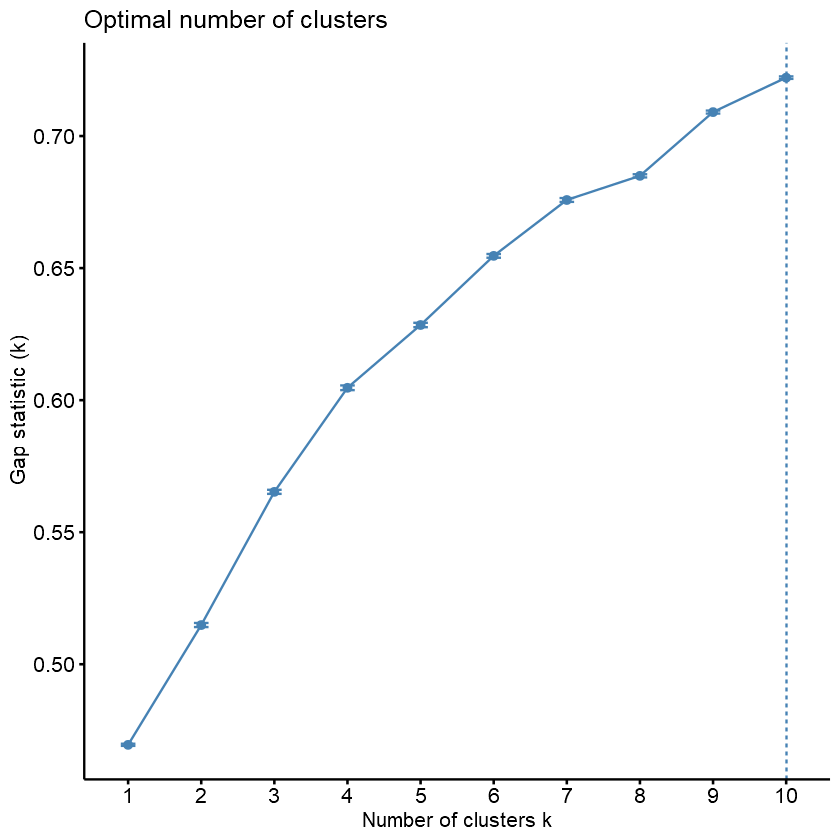

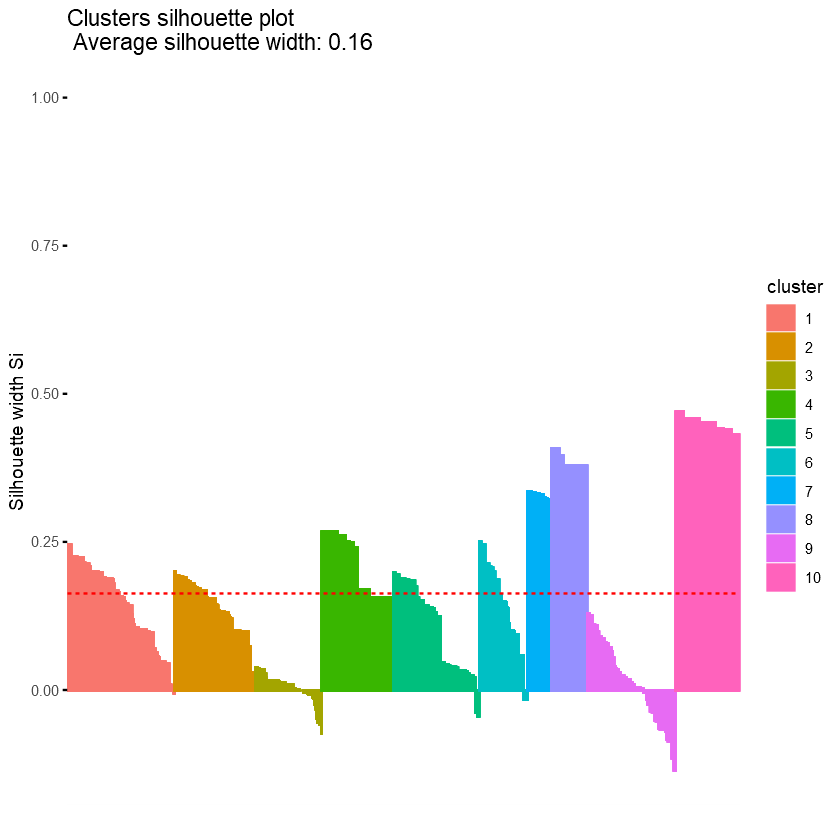

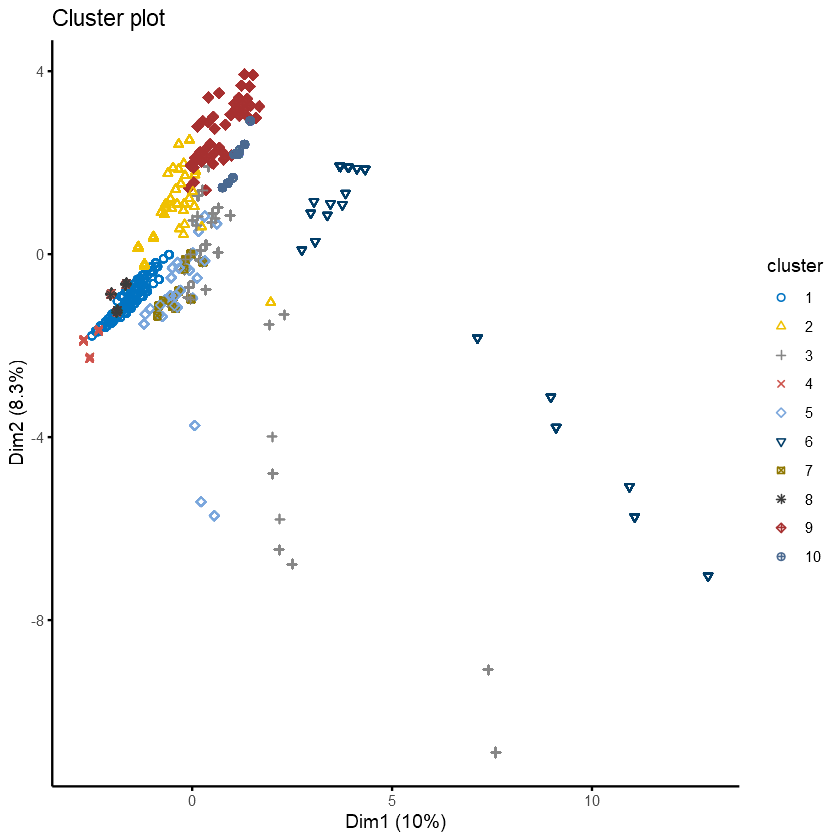

In [30]:
##########
# ENHANCED K-MEANS
# Enhanced k-means clustering
res.km <- eclust(mushroomDf.torun.ohe2, "kmeans", nstart = 25,nboot=5)  # Takes 5 minutes to run
# Gap statistic plot
fviz_gap_stat(res.km$gap_stat)
# Silhouette plot
fviz_silhouette(res.km)

# List of cluster assignments

fviz_cluster(res.km, df,  geom = "point", 
             ellipse= FALSE, show.clust.cent = FALSE,
             palette = "jco", ggtheme = theme_classic())

### Density-Based Clustering

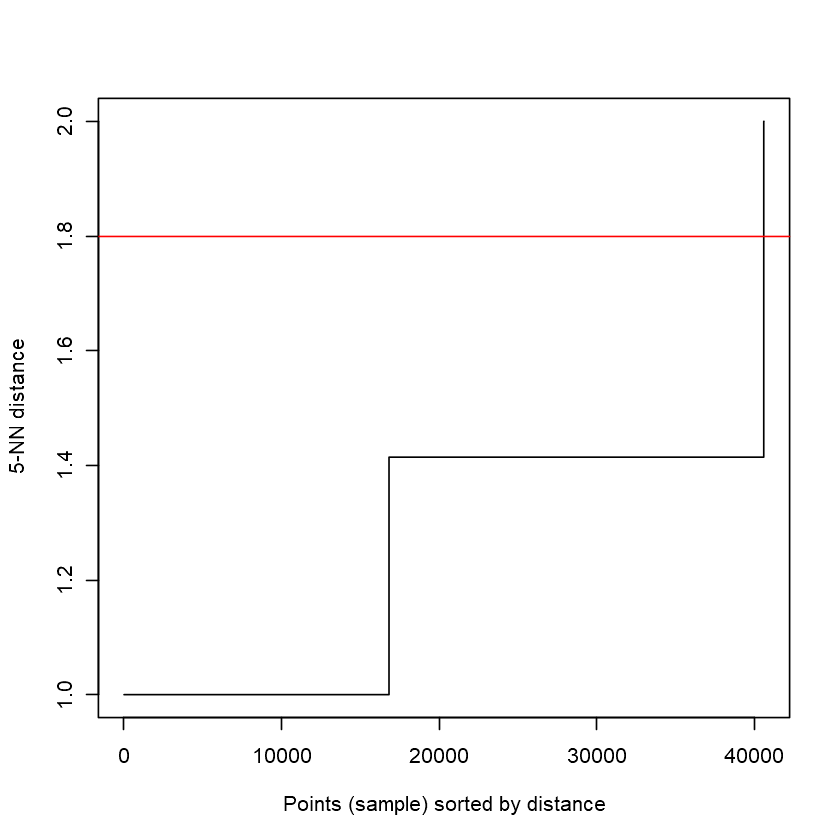

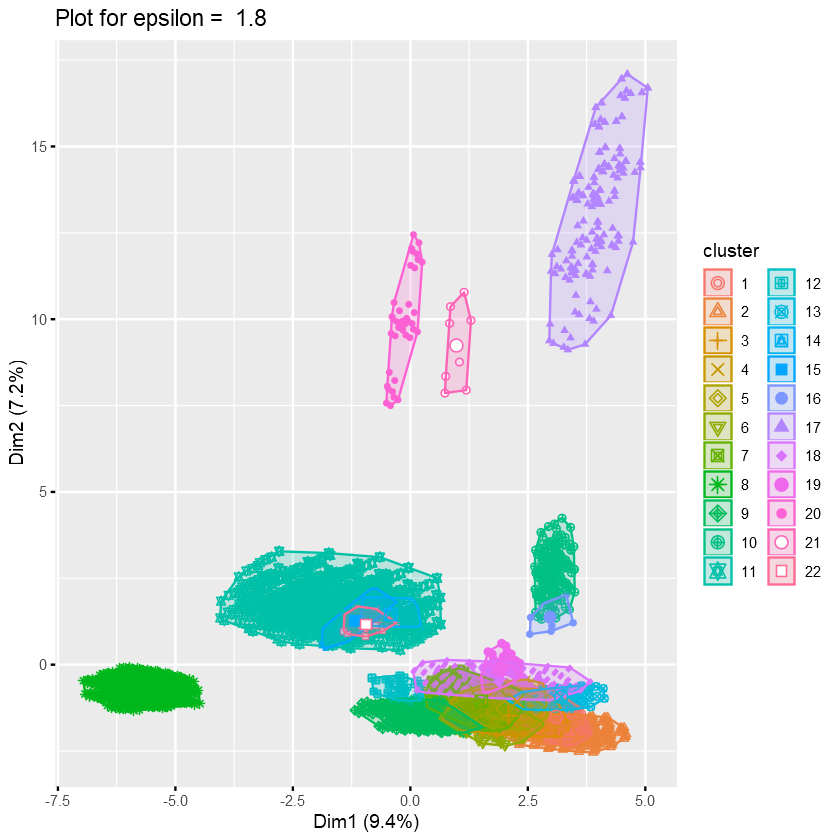

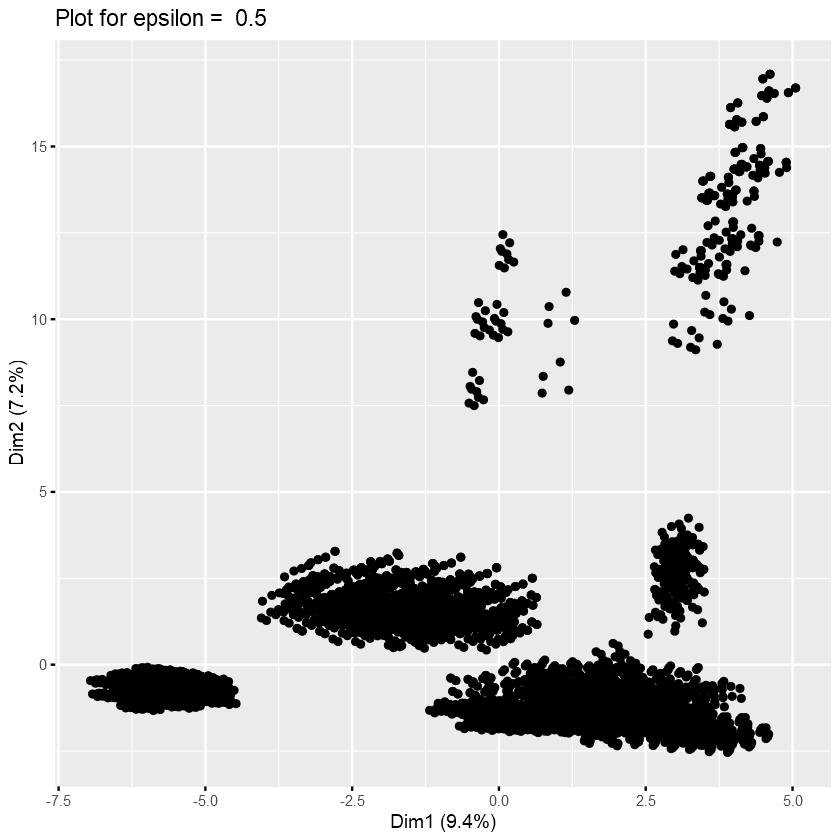

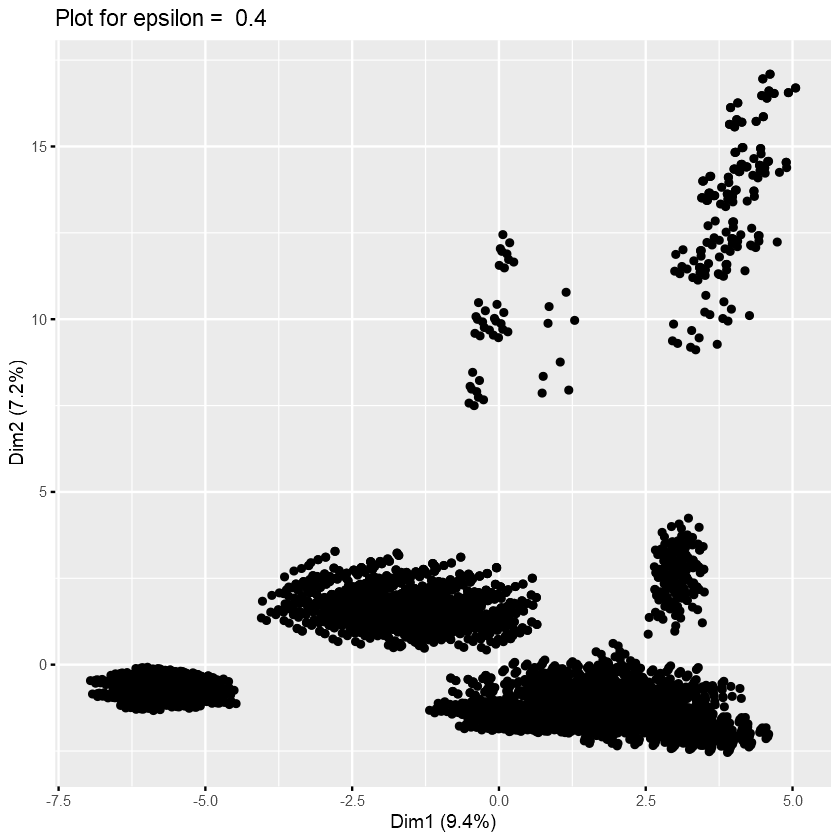

In [31]:
##########
# DBSCAN Density-based clustering with columns 

#install.packages("dbscan")
library(dbscan)
df <- mushroomDf.torun.ohe

# Create a vector of epsilon values
epsilon_values <- c(1.8, 0.5, 0.4)

# Plot the distribution of distances
kNNdistplot(df, k = 5)

# Plot lines at epsilon values
for (e in epsilon_values) {
  abline(h = e, col = "red")
}

for (e in epsilon_values) {
  db_clusters <- dbscan(df, eps=e, minPts=4)
  title <- paste("Plot for epsilon = ", e)
  g <- fviz_cluster(db_clusters, df, ellipse = TRUE, geom = "point",
                    main = title)
  print(g)
}

## Naive Bayes

In [32]:
#================================================================================
# Naive Bayes (Lauren Foltz)
#================================================================================

# Create another data set without stalk.root or veil.type

# Create training set
str(mush_train)  # Veiltype has already been removed for this data set
mush_train2<-mush_train[,-c(12)]  # Removing stalk.root
str(mush_train2)
dim(mush_train2)

# Create testing set
str(mush_test)  # Veiltype has already been removed for this data set
mush_test2<-mush_test[,-c(12)]  # Removing stalk.root
str(mush_test2)
dim(mush_train2)

# Create training with no labels
mush_train2_no_labels<-mush_train2[,-c(1)]  # Remove class column
str(mush_train2_no_labels)
dim(mush_train2_no_labels)

# Create testing with no labels
mush_test2_no_labels<-mush_test2[,-c(1)]  # Remove class column
str(mush_test2_no_labels)
dim(mush_train2_no_labels) 

'data.frame':	5687 obs. of  22 variables:
 $ class                   : Factor w/ 2 levels "Edible","Poisonous": 2 1 1 1 1 1 2 1 1 2 ...
 $ cap.shape               : Factor w/ 6 levels "Bell","Conical",..: 6 1 3 6 3 6 3 3 3 6 ...
 $ cap.surface             : Factor w/ 4 levels "Fibrous","Grooves",..: 3 3 1 4 4 4 3 1 4 4 ...
 $ cap.color               : Factor w/ 10 levels "Buff","Cinnamon",..: 3 4 9 3 5 5 5 5 4 10 ...
 $ bruises                 : Factor w/ 2 levels "No","Bruises": 1 1 1 2 2 2 2 1 2 1 ...
 $ odor                    : Factor w/ 9 levels "Almond","Creosote",..: 8 6 6 6 6 6 7 6 6 3 ...
 $ gill.attachment         : Factor w/ 2 levels "Attached","Free": 2 2 2 2 2 2 2 2 2 2 ...
 $ gill.spacing            : Factor w/ 2 levels "Close","Crowded": 1 2 2 1 1 1 1 2 1 1 ...
 $ gill.size               : Factor w/ 2 levels "Broad","Narrow": 2 1 1 1 1 1 2 1 1 1 ...
 $ gill.color              : Factor w/ 12 levels "Buff","Red","Gray",..: 1 8 8 6 8 11 8 8 11 4 ...
 $ stalk.shape          

[1] 5687   21

'data.frame':	2437 obs. of  22 variables:
 $ class                   : Factor w/ 2 levels "Edible","Poisonous": 2 1 2 1 1 2 1 1 1 1 ...
 $ cap.shape               : Factor w/ 6 levels "Bell","Conical",..: 6 6 6 6 1 6 6 6 1 6 ...
 $ cap.surface             : Factor w/ 4 levels "Fibrous","Grooves",..: 3 3 4 3 3 4 4 4 4 4 ...
 $ cap.color               : Factor w/ 10 levels "Buff","Cinnamon",..: 5 10 9 4 9 9 10 10 9 9 ...
 $ bruises                 : Factor w/ 2 levels "No","Bruises": 2 2 2 1 2 2 2 2 2 2 ...
 $ odor                    : Factor w/ 9 levels "Almond","Creosote",..: 7 1 7 6 1 7 4 1 1 4 ...
 $ gill.attachment         : Factor w/ 2 levels "Attached","Free": 2 2 2 2 2 2 2 2 2 2 ...
 $ gill.spacing            : Factor w/ 2 levels "Close","Crowded": 1 1 1 2 1 1 1 1 1 1 ...
 $ gill.size               : Factor w/ 2 levels "Broad","Narrow": 2 1 2 1 1 2 1 1 1 1 ...
 $ gill.color              : Factor w/ 12 levels "Buff","Red","Gray",..: 5 5 6 5 3 8 3 6 11 11 ...
 $ stalk.shape        

[1] 5687   21

'data.frame':	5687 obs. of  20 variables:
 $ cap.shape               : Factor w/ 6 levels "Bell","Conical",..: 6 1 3 6 3 6 3 3 3 6 ...
 $ cap.surface             : Factor w/ 4 levels "Fibrous","Grooves",..: 3 3 1 4 4 4 3 1 4 4 ...
 $ cap.color               : Factor w/ 10 levels "Buff","Cinnamon",..: 3 4 9 3 5 5 5 5 4 10 ...
 $ bruises                 : Factor w/ 2 levels "No","Bruises": 1 1 1 2 2 2 2 1 2 1 ...
 $ odor                    : Factor w/ 9 levels "Almond","Creosote",..: 8 6 6 6 6 6 7 6 6 3 ...
 $ gill.attachment         : Factor w/ 2 levels "Attached","Free": 2 2 2 2 2 2 2 2 2 2 ...
 $ gill.spacing            : Factor w/ 2 levels "Close","Crowded": 1 2 2 1 1 1 1 2 1 1 ...
 $ gill.size               : Factor w/ 2 levels "Broad","Narrow": 2 1 1 1 1 1 2 1 1 1 ...
 $ gill.color              : Factor w/ 12 levels "Buff","Red","Gray",..: 1 8 8 6 8 11 8 8 11 4 ...
 $ stalk.shape             : Factor w/ 2 levels "Enlarging","Tapering": 2 1 2 2 2 2 1 2 2 1 ...
 $ stalk.surface.above

[1] 5687   20

'data.frame':	2437 obs. of  20 variables:
 $ cap.shape               : Factor w/ 6 levels "Bell","Conical",..: 6 6 6 6 1 6 6 6 1 6 ...
 $ cap.surface             : Factor w/ 4 levels "Fibrous","Grooves",..: 3 3 4 3 3 4 4 4 4 4 ...
 $ cap.color               : Factor w/ 10 levels "Buff","Cinnamon",..: 5 10 9 4 9 9 10 10 9 9 ...
 $ bruises                 : Factor w/ 2 levels "No","Bruises": 2 2 2 1 2 2 2 2 2 2 ...
 $ odor                    : Factor w/ 9 levels "Almond","Creosote",..: 7 1 7 6 1 7 4 1 1 4 ...
 $ gill.attachment         : Factor w/ 2 levels "Attached","Free": 2 2 2 2 2 2 2 2 2 2 ...
 $ gill.spacing            : Factor w/ 2 levels "Close","Crowded": 1 1 1 2 1 1 1 1 1 1 ...
 $ gill.size               : Factor w/ 2 levels "Broad","Narrow": 2 1 2 1 1 2 1 1 1 1 ...
 $ gill.color              : Factor w/ 12 levels "Buff","Red","Gray",..: 5 5 6 5 3 8 3 6 11 11 ...
 $ stalk.shape             : Factor w/ 2 levels "Enlarging","Tapering": 1 1 1 2 1 1 1 1 1 1 ...
 $ stalk.surface.abo

[1] 5687   20

Warning message:
"predict.naive_bayes(): More features in the newdata are provided as there are probability tables in the object. Calculation is performed based on features to be found in the tables."

             TestClassLabels
nb_prediction Edible Poisonous
    Edible      1276        93
    Poisonous      7      1061

The accuracy of the Naive Bayes model is  95.9%

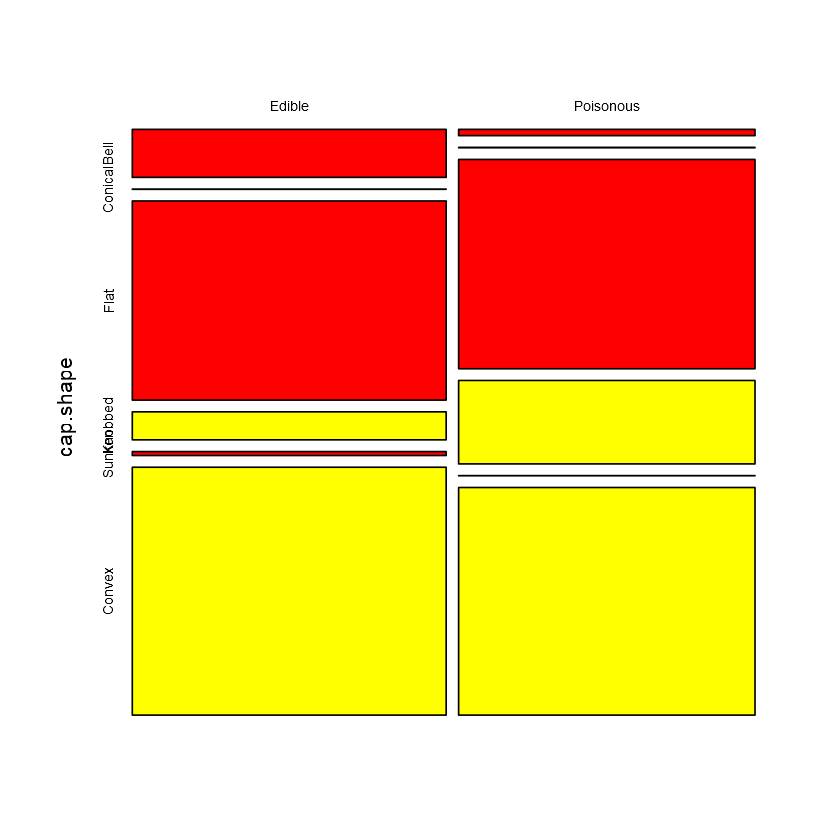

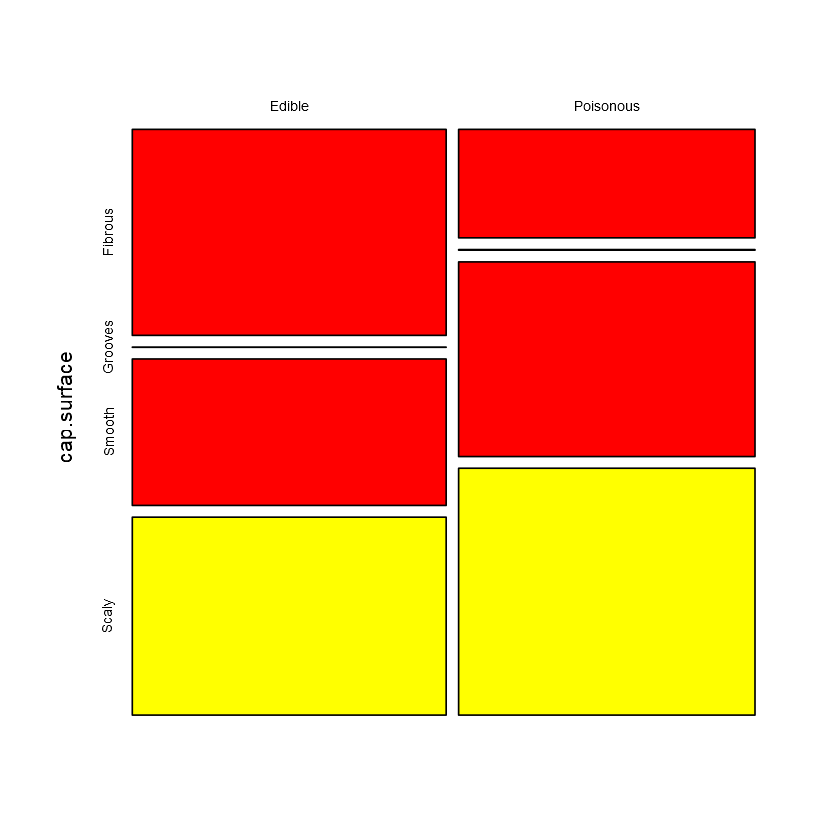

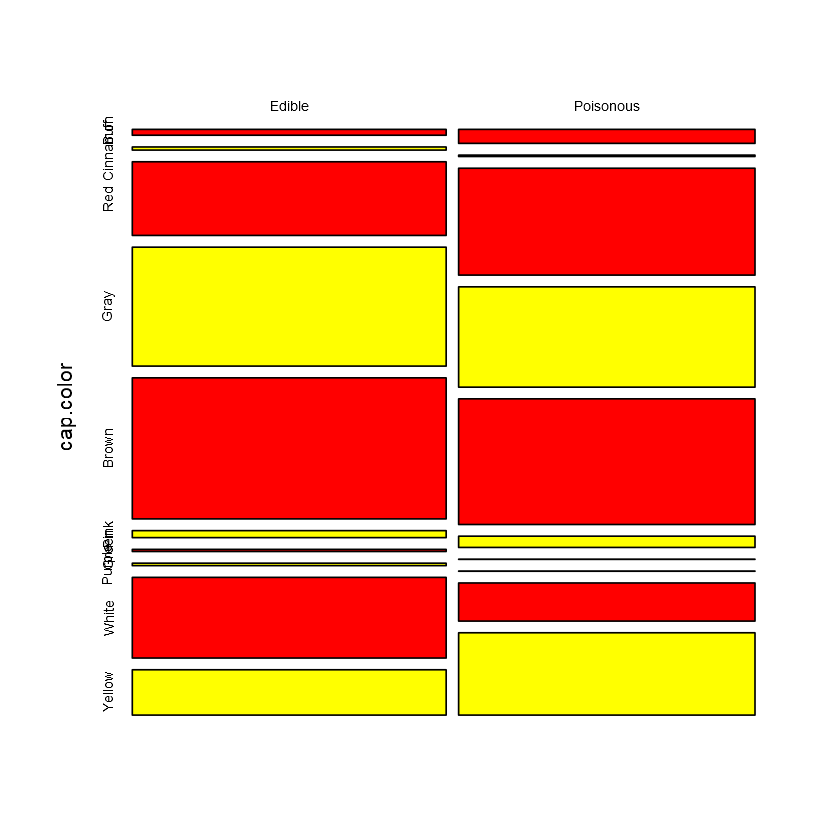

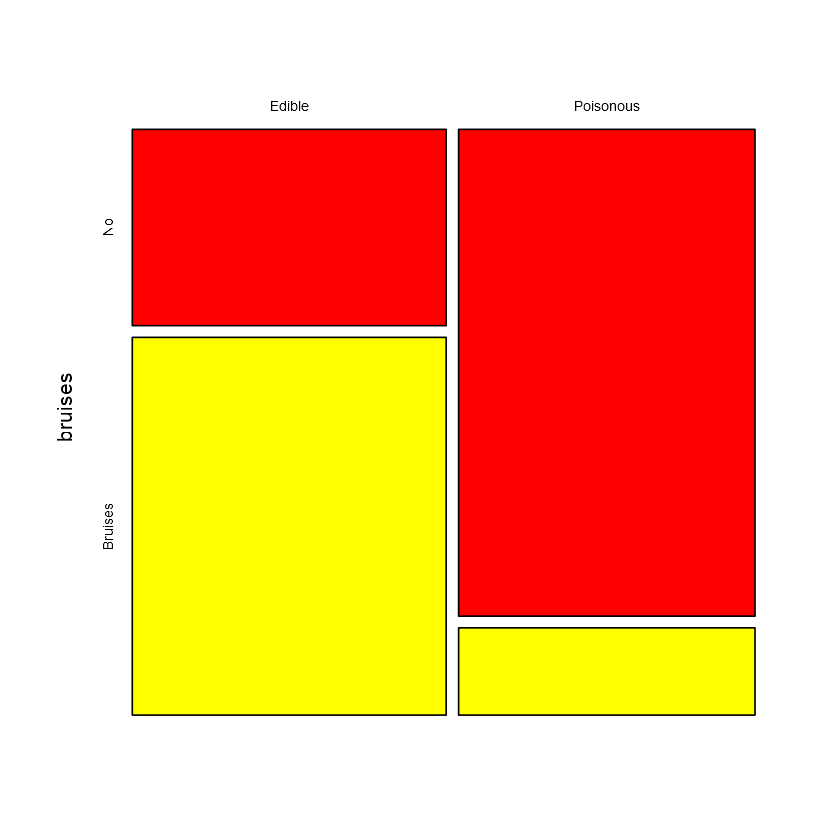

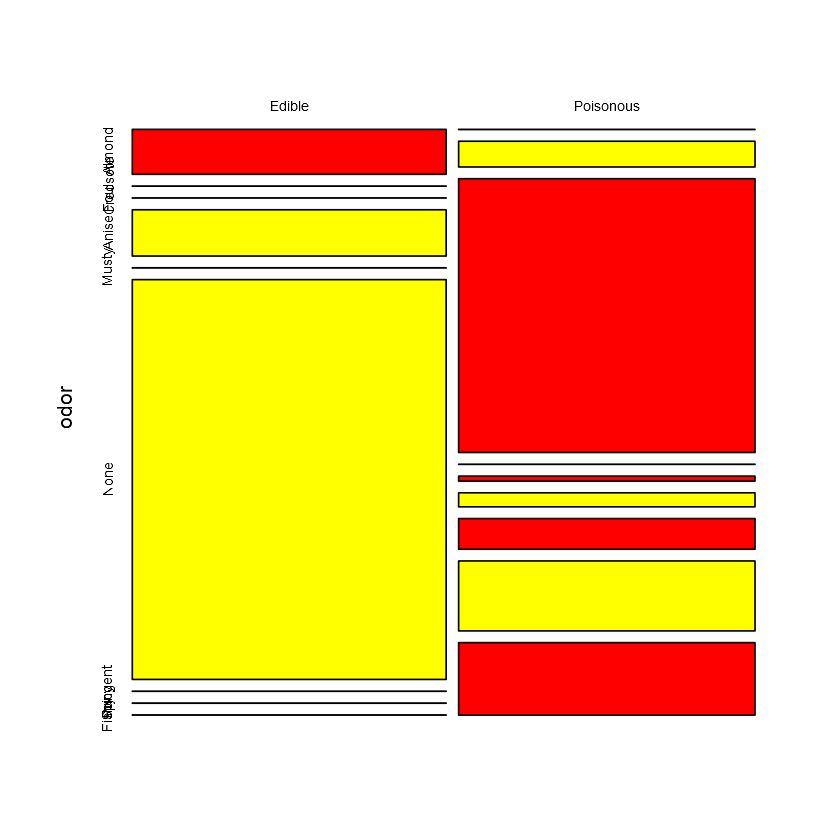

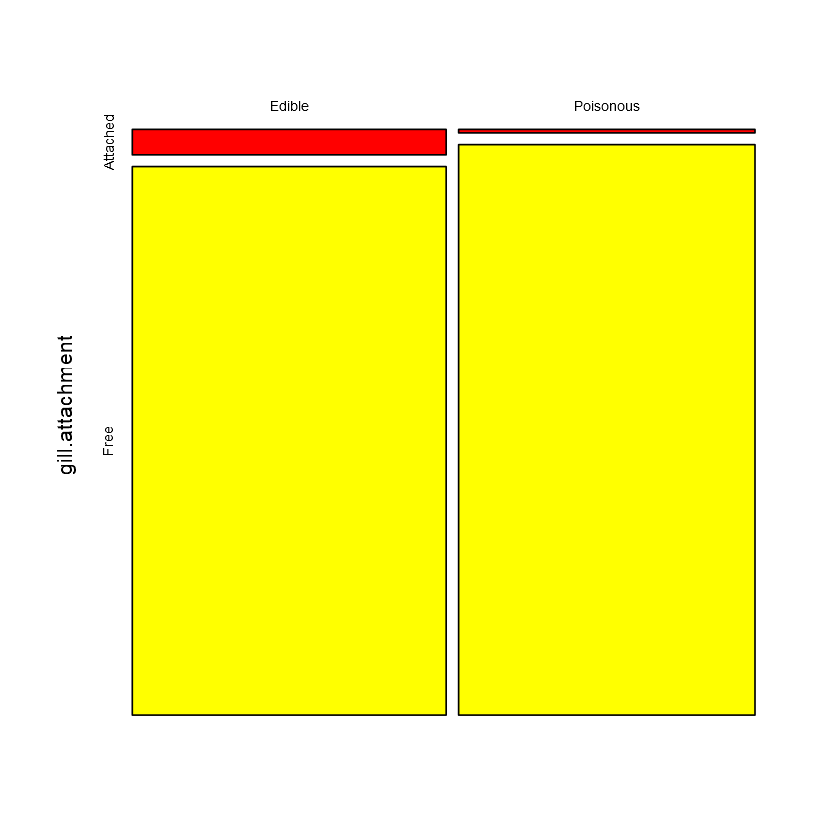

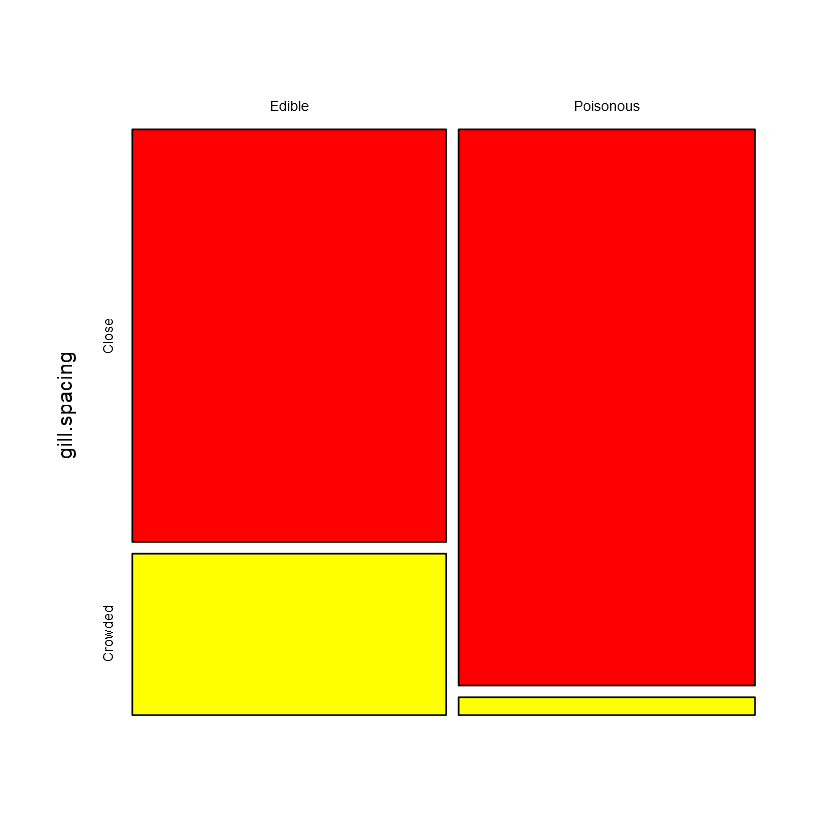

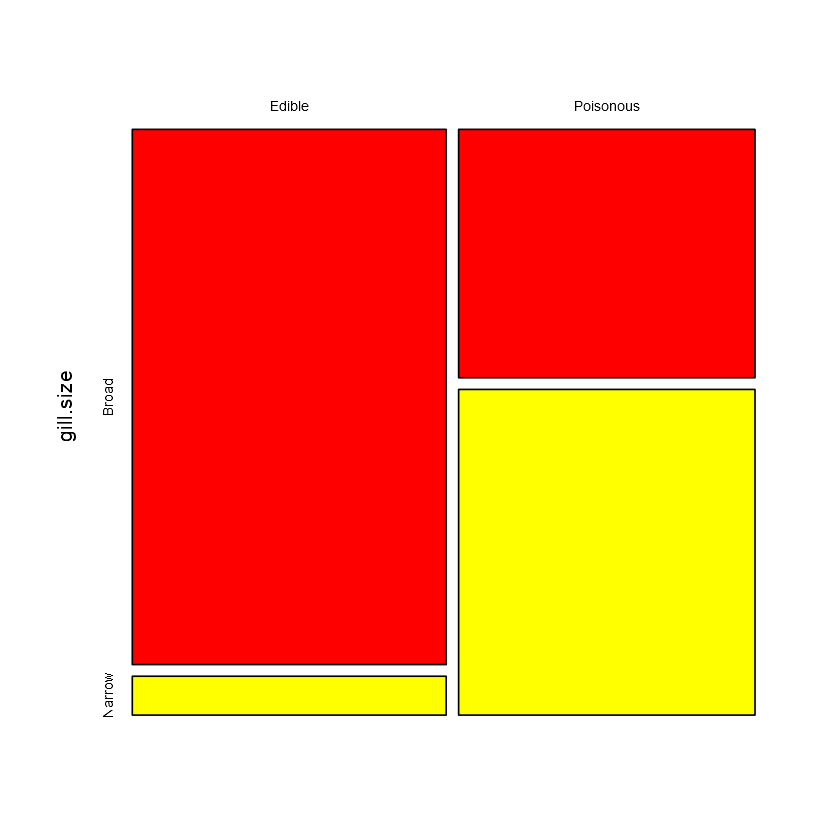

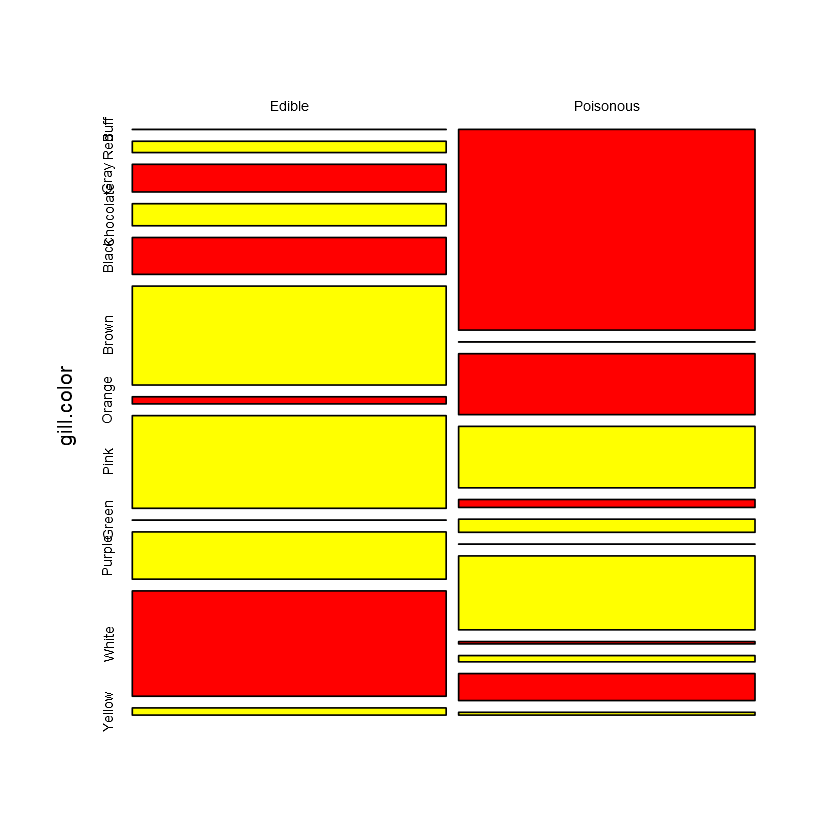

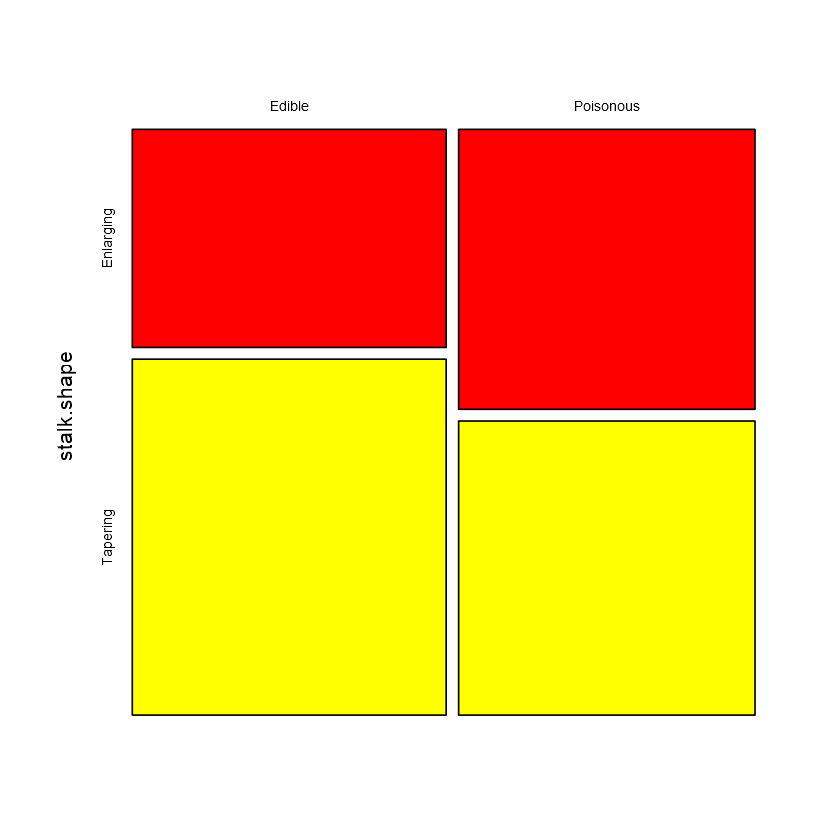

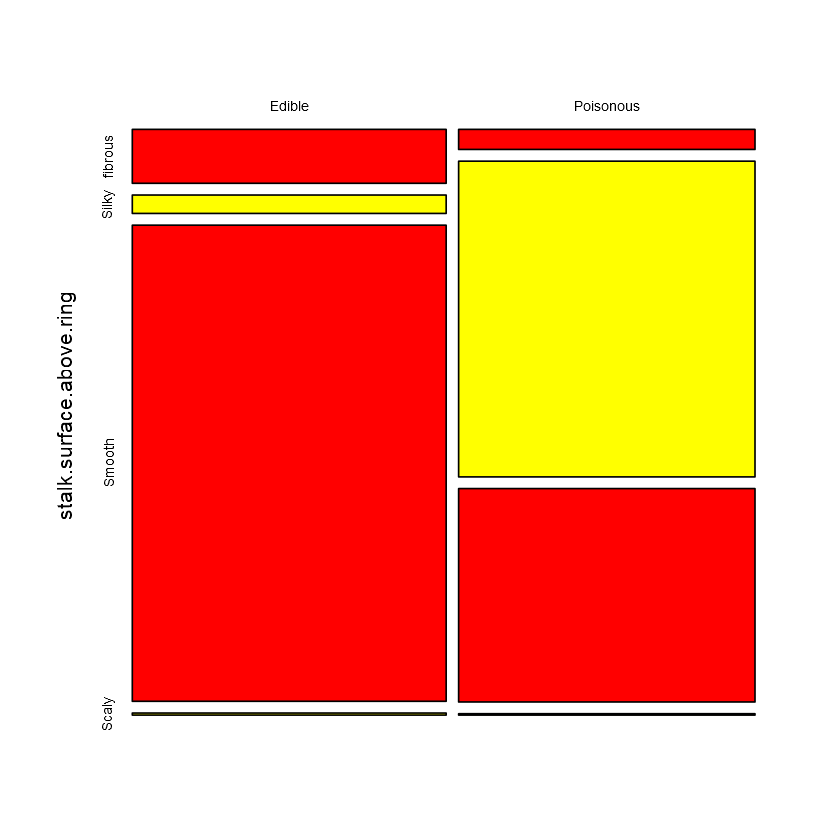

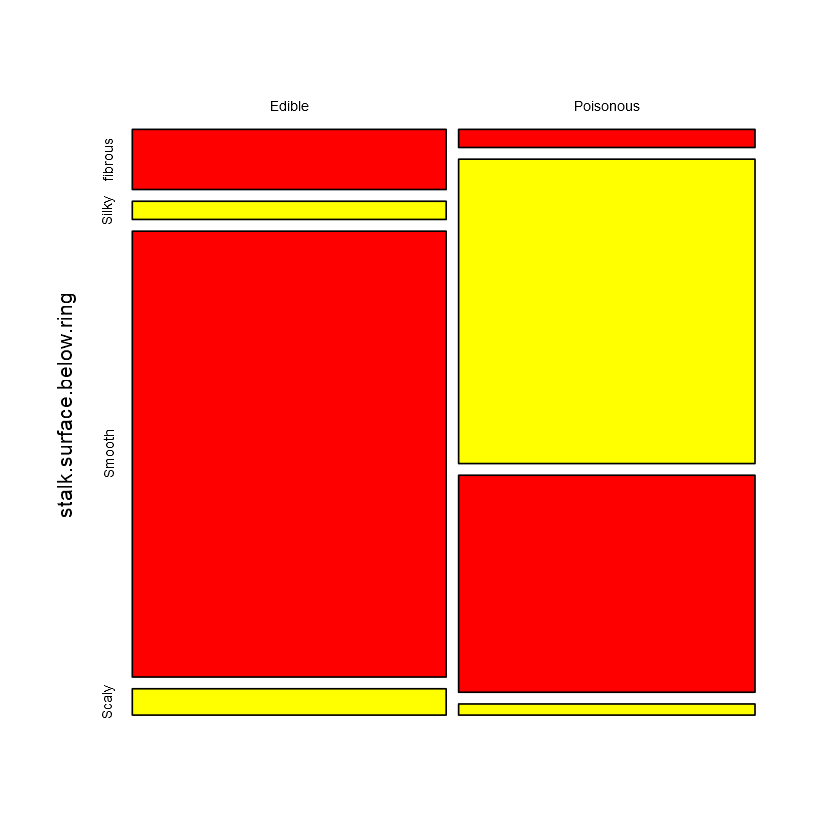

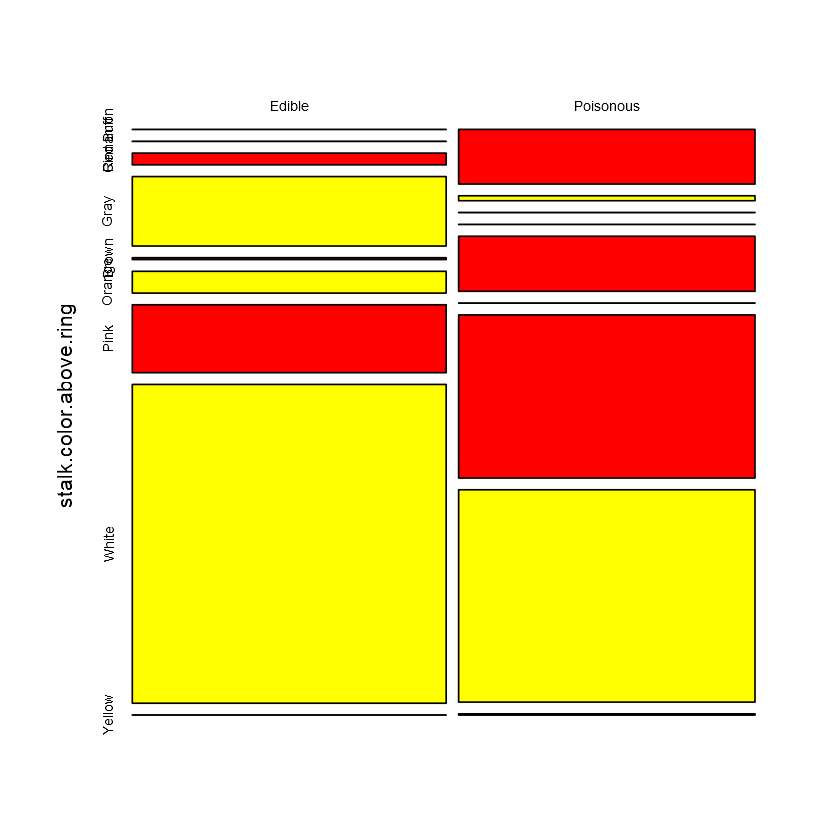

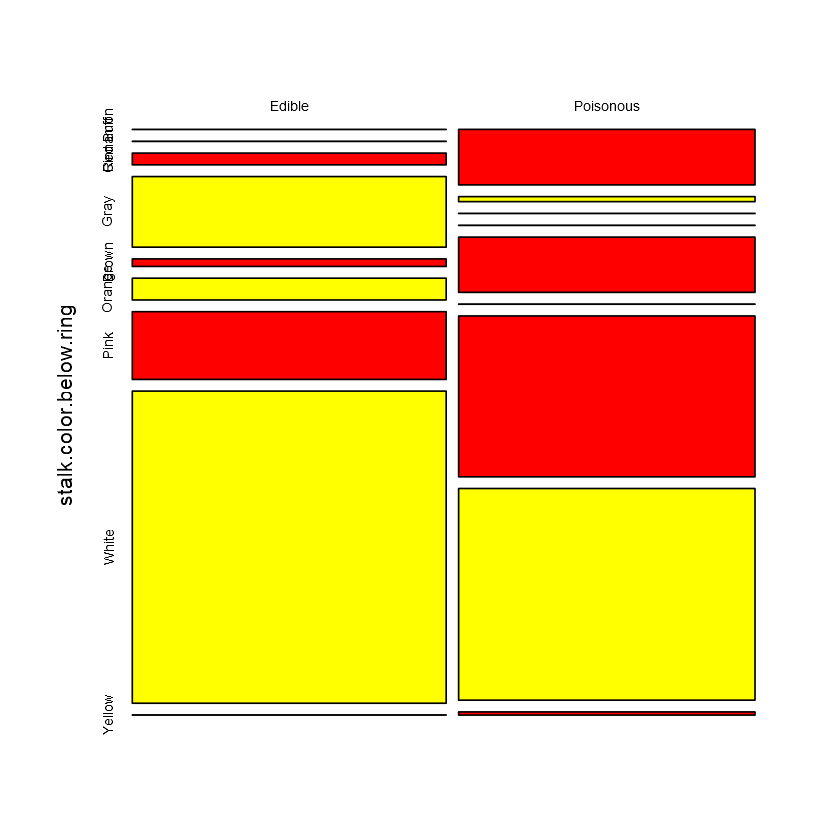

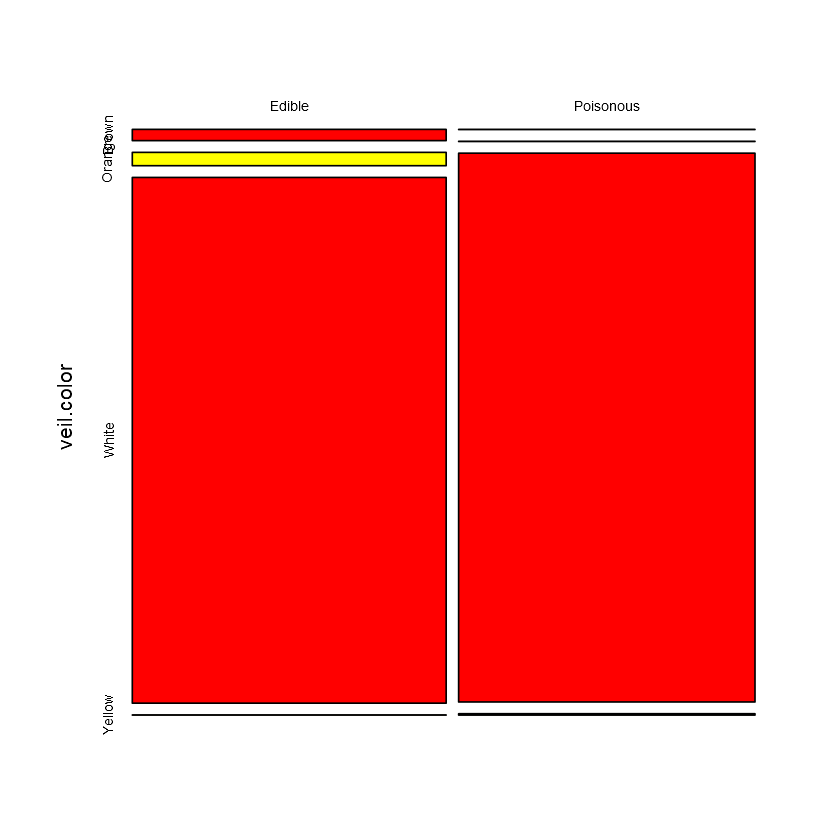

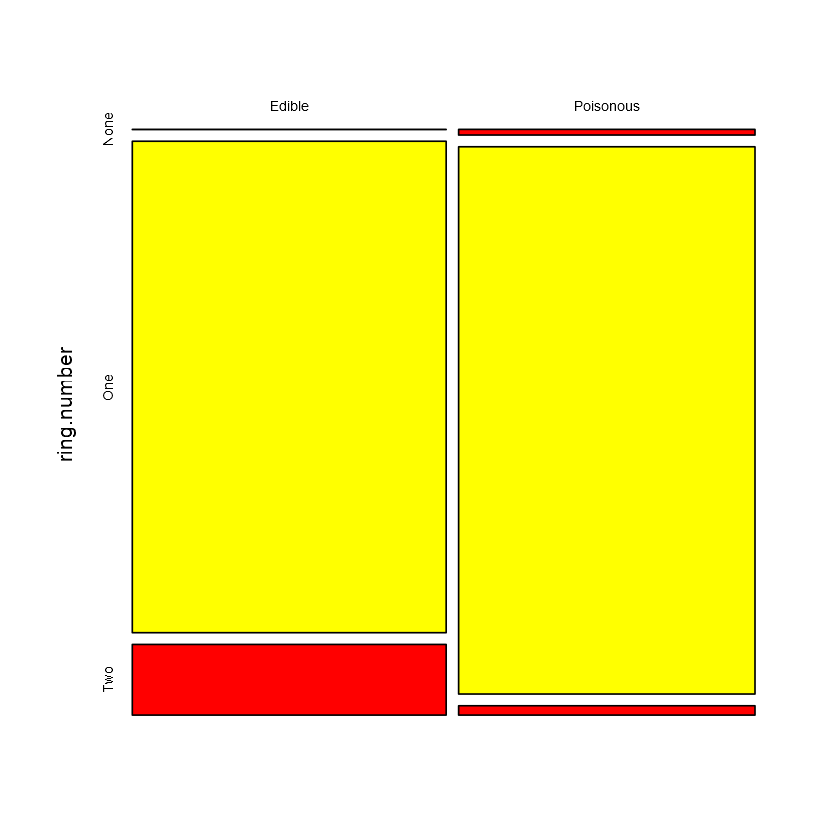

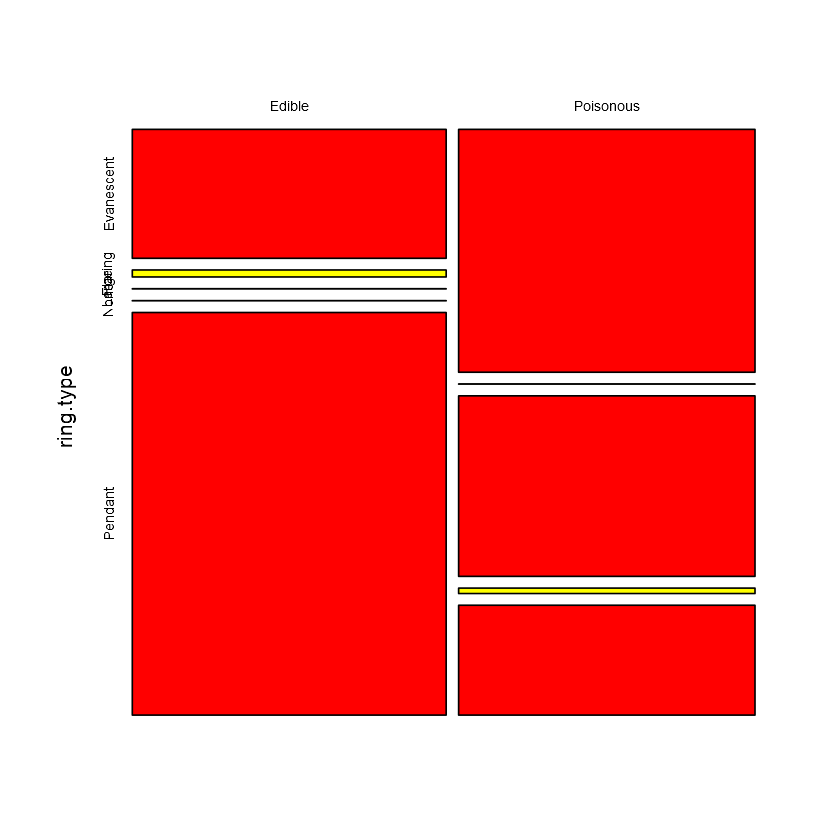

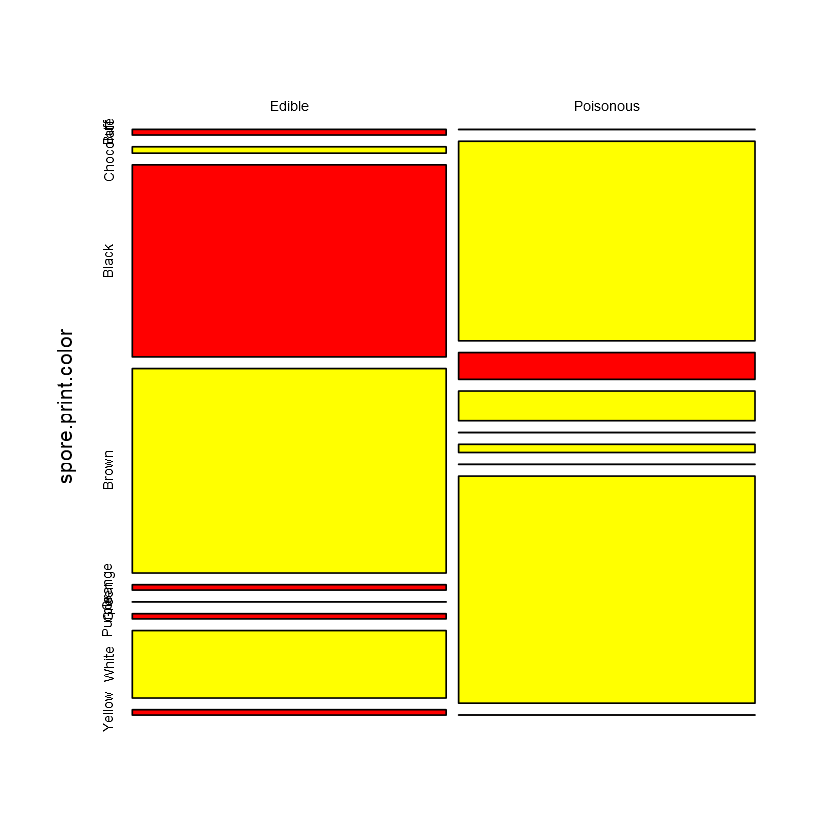

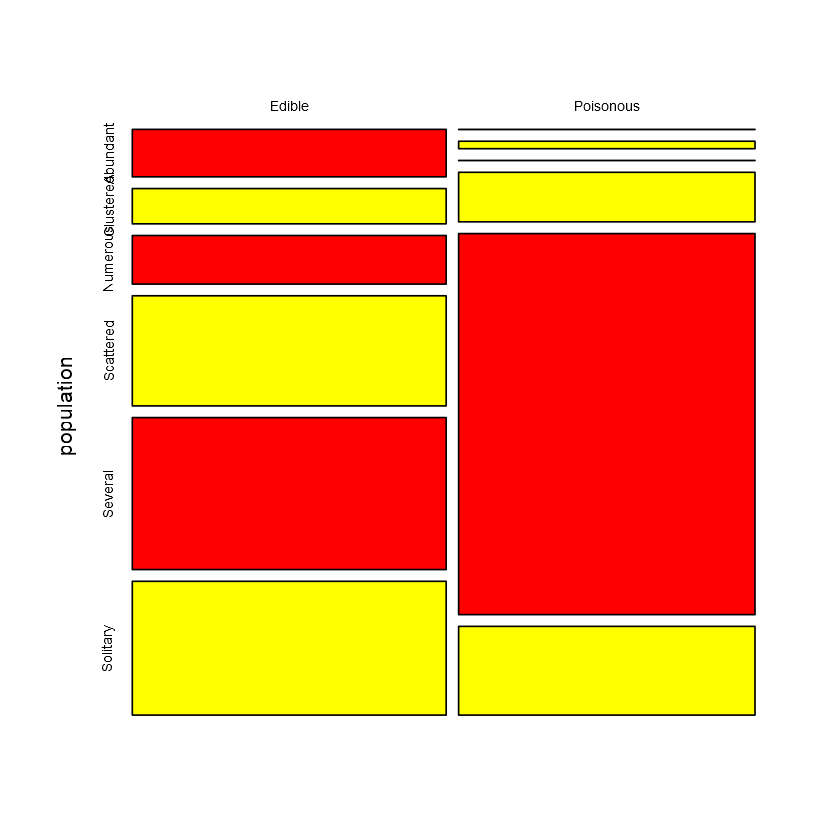

[1] 0.3939405

odor 
   5

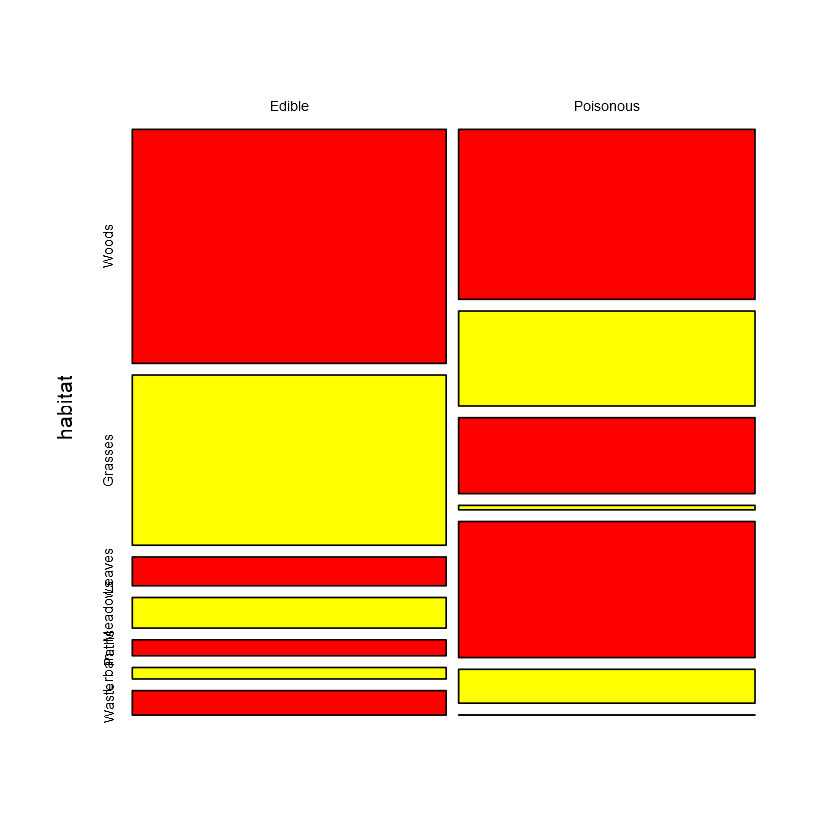

In [33]:
# NB Model #1 (using Naive Bayes package)

nb <- naive_bayes( class ~. , data= mush_train2 , laplace=1, na.action = na.pass )  # Create model with train set
nb_prediction <- predict ( nb ,  mush_test2 )  # Create prediction with test set
(cm = table(nb_prediction , TestClassLabels))  # Get confusion matrix
model_accuracy = sum(diag(cm))/sum(cm)  # Calculate accuracy
a<-(model_accuracy_p<- paste(round((model_accuracy)*100,digits=2),"%",sep=""))  # Convert to a percent
cat("The accuracy of the Naive Bayes model is ", model_accuracy_p )

# Visualize Naive Bayes
# This gives a separate vis per variable
plot(nb, legend.box = TRUE) 


# Look at information gain with Entropy
#install.packages("CORElearn")
library(CORElearn)
Method.CORElearn <- CORElearn::attrEval(mush_train2$class ~ ., data=mush_train2,  estimator = "GainRatio")
max(Method.CORElearn)
which.max(Method.CORElearn)

In [34]:
# NB Model #2 (using e1071 package)
NB_e1071<-naiveBayes (class~., data=mush_train2, na.action = na.pass)
NB_e1071_Pred <- predict(NB_e1071, mush_test2_no_labels)  # Takes a while
(cm = table(NB_e1071_Pred, TestClassLabels))  # Get confusion matrix
model_accuracy = sum(diag(cm))/sum(cm)  # Calculate accuracy
model_accuracy_p<- paste(round((model_accuracy)*100,digits=2),"%",sep="")  # Convert to a percent
cat("The accuracy of the Naive Bayes model made with package e1071 is ", model_accuracy_p )

#plot(NB_e1071, ylab = "Density", main = "Naive Bayes Plot")  # Commented out due to error below.
# Error in xy.coords(x, y, xlabel, ylabel, log) : 'x' is a list, but does not have components 'x' and 'y'

             TestClassLabels
NB_e1071_Pred Edible Poisonous
    Edible      1276       126
    Poisonous      7      1028

The accuracy of the Naive Bayes model made with package e1071 is  94.54%

## Association Rule Mining (ARM)

In [35]:
#================================================================================
# Association Rule Mining (Lauren Foltz)
#================================================================================
# Important: This model was included last because the Arules package does not play nicely with other packages.
# For example, this package masks "recode" and "inspect" 

#install.packages("arules")
library("arules")
# The following object is masked from package:dplyr: recode
# The following object is masked from package:tm:inspect
# The following objects are masked from package:base: abbreviate, write

#install.packages("arulesViz")
library("arulesViz")

# Adjust Data

# Make a copy of data frame with veil.type removed. Call it "armDF"
armDF <- m2
str(armDF)

# Remove column for stalk.root because it has "?" in some cells
which( colnames(armDF)=="stalk.root" ) # 12 means stalk.root is column 12
armDF <-armDF[-c(12)]
which( colnames(armDF)=="stalk.root" ) # 0 means stalk.root is no longer present

# Make a copy and remove the label, which is the first column
armDF_unlabeled <-armDF[-c(1)]
str(armDF_unlabeled)



Attaching package: 'arules'

The following object is masked from 'package:CORElearn':

    discretize

The following object is masked from 'package:dplyr':

    recode

The following object is masked from 'package:tm':

    inspect

The following objects are masked from 'package:base':

    abbreviate, write

Registered S3 methods overwritten by 'registry':
  method               from 
  print.registry_field proxy
  print.registry_entry proxy
Registered S3 method overwritten by 'seriation':
  method         from 
  reorder.hclust gclus


'data.frame':	8124 obs. of  22 variables:
 $ class                   : Factor w/ 2 levels "Edible","Poisonous": 2 1 1 2 1 1 1 1 2 1 ...
 $ cap.shape               : Factor w/ 6 levels "Bell","Conical",..: 6 6 1 6 6 6 1 1 6 1 ...
 $ cap.surface             : Factor w/ 4 levels "Fibrous","Grooves",..: 3 3 3 4 3 4 3 4 4 3 ...
 $ cap.color               : Factor w/ 10 levels "Buff","Cinnamon",..: 5 10 9 9 4 10 9 9 9 10 ...
 $ bruises                 : Factor w/ 2 levels "No","Bruises": 2 2 2 2 1 2 2 2 2 2 ...
 $ odor                    : Factor w/ 9 levels "Almond","Creosote",..: 7 1 4 7 6 1 1 4 7 1 ...
 $ gill.attachment         : Factor w/ 2 levels "Attached","Free": 2 2 2 2 2 2 2 2 2 2 ...
 $ gill.spacing            : Factor w/ 2 levels "Close","Crowded": 1 1 1 1 2 1 1 1 1 1 ...
 $ gill.size               : Factor w/ 2 levels "Broad","Narrow": 2 1 1 2 1 1 1 1 2 1 ...
 $ gill.color              : Factor w/ 12 levels "Buff","Red","Gray",..: 5 5 6 6 5 6 3 6 8 3 ...
 $ stalk.shape          

[1] 12

integer(0)

'data.frame':	8124 obs. of  20 variables:
 $ cap.shape               : Factor w/ 6 levels "Bell","Conical",..: 6 6 1 6 6 6 1 1 6 1 ...
 $ cap.surface             : Factor w/ 4 levels "Fibrous","Grooves",..: 3 3 3 4 3 4 3 4 4 3 ...
 $ cap.color               : Factor w/ 10 levels "Buff","Cinnamon",..: 5 10 9 9 4 10 9 9 9 10 ...
 $ bruises                 : Factor w/ 2 levels "No","Bruises": 2 2 2 2 1 2 2 2 2 2 ...
 $ odor                    : Factor w/ 9 levels "Almond","Creosote",..: 7 1 4 7 6 1 1 4 7 1 ...
 $ gill.attachment         : Factor w/ 2 levels "Attached","Free": 2 2 2 2 2 2 2 2 2 2 ...
 $ gill.spacing            : Factor w/ 2 levels "Close","Crowded": 1 1 1 1 2 1 1 1 1 1 ...
 $ gill.size               : Factor w/ 2 levels "Broad","Narrow": 2 1 1 2 1 1 1 1 2 1 ...
 $ gill.color              : Factor w/ 12 levels "Buff","Red","Gray",..: 5 5 6 6 5 6 3 6 8 3 ...
 $ stalk.shape             : Factor w/ 2 levels "Enlarging","Tapering": 1 1 1 1 2 1 1 1 1 1 ...
 $ stalk.surface.above

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.95    0.1    1 none FALSE            TRUE       5     0.5      2
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 4062 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[111 item(s), 8124 transaction(s)] done [0.01s].
sorting and recoding items ... [11 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [76 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.


     lhs                                  rhs                    support confidence lift count
[1]  {stalk.color.below.ring=White}    => {gill.attachment=Free}   0.540          1 1.03  4384
[2]  {stalk.color.below.ring=White}    => {veil.color=White}       0.540          1 1.03  4384
[3]  {stalk.color.above.ring=White}    => {gill.attachment=Free}   0.549          1 1.03  4464
[4]  {stalk.color.above.ring=White}    => {veil.color=White}       0.549          1 1.03  4464
[5]  {stalk.shape=Tapering}            => {ring.number=One}        0.567          1 1.08  4608
[6]  {stalk.shape=Tapering}            => {gill.attachment=Free}   0.567          1 1.03  4608
[7]  {stalk.shape=Tapering}            => {veil.color=White}       0.567          1 1.03  4608
[8]  {gill.attachment=Free,                                                                   
      stalk.surface.below.ring=Smooth} => {veil.color=White}       0.584          1 1.03  4744
[9]  {stalk.surface.below.ring=Smooth,            

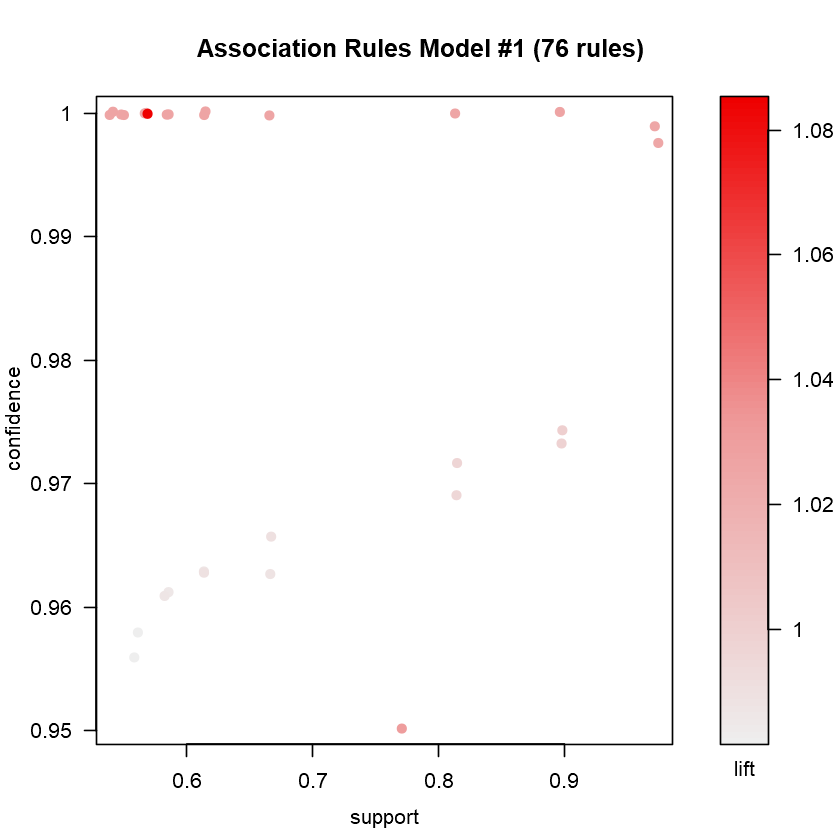

In [36]:

################
# Arm Model 1  #
################

# Explore unlabeled data
rules<-arules::apriori(armDF_unlabeled,parameter = list(supp=0.50, conf = 0.95,minlen=2))
rules <- rules[!is.redundant(rules)]  # Remove redundant rules
options(digits=3)
# Produced 76 rules

plot(rules, main = "Association Rules Model #1 (76 rules)")  # Add title

# Sort by confidence & inspect
rules_conf<-sort (rules, decreasing = TRUE, by='confidence')
inspect(rules_conf[1:10])

# Top 10 rules:
# lhs                                                       rhs                    support confidence lift count
# [1]  {stalk.color.below.ring=White}                         => {gill.attachment=Free} 0.540   1          1.03 4384 
# [2]  {stalk.color.below.ring=White}                         => {veil.color=White}     0.540   1          1.03 4384 
# [3]  {stalk.color.above.ring=White}                         => {gill.attachment=Free} 0.549   1          1.03 4464 
# [4]  {stalk.color.above.ring=White}                         => {veil.color=White}     0.549   1          1.03 4464 
# [5]  {stalk.shape=Tapering}                                 => {ring.number=One}      0.567   1          1.08 4608 
# [6]  {stalk.shape=Tapering}                                 => {gill.attachment=Free} 0.567   1          1.03 4608 
# [7]  {stalk.shape=Tapering}                                 => {veil.color=White}     0.567   1          1.03 4608 
# [8]  {gill.attachment=Free,stalk.surface.below.ring=Smooth} => {veil.color=White}     0.584   1          1.03 4744 
# [9]  {stalk.surface.below.ring=Smooth,veil.color=White}     => {gill.attachment=Free} 0.584   1          1.03 4744 
# [10] {gill.attachment=Free,stalk.surface.above.ring=Smooth} => {veil.color=White}     0.613   1          1.03 4984 

# Sort by support
rules_supp <- sort(rules, decreasing = TRUE, by="supp")
inspect(rules_supp[1:10])

# Top 10 rules:
# lhs                                          rhs                    support confidence lift  count
# [1]  {gill.attachment=Free}                    => {veil.color=White}     0.973   0.999      1.024 7906 
# [2]  {veil.color=White}                        => {gill.attachment=Free} 0.973   0.998      1.024 7906 
# [3]  {ring.number=One}                         => {gill.attachment=Free} 0.898   0.974      1.000 7296 
# [4]  {ring.number=One}                         => {veil.color=White}     0.897   0.973      0.998 7288 
# [5]  {veil.color=White,ring.number=One}        => {gill.attachment=Free} 0.897   1.000      1.027 7288 
# [6]  {gill.spacing=Close}                      => {veil.color=White}     0.815   0.972      0.996 6620 
# [7]  {gill.spacing=Close}                      => {gill.attachment=Free} 0.813   0.969      0.995 6602 
# [8]  {gill.attachment=Free,gill.spacing=Close} => {veil.color=White}     0.813   1.000      1.025 6602 
# [9]  {gill.attachment=Free,gill.spacing=Close} => {ring.number=One}      0.772   0.950      1.031 6272 
# [10] {gill.size=Broad}                         => {veil.color=White}     0.667   0.966      0.990 5420 

# Sort by lift
rules_lift <- sort(rules, decreasing = TRUE,by="lift")
inspect(rules_lift[1:10])

# Top 10 rules:
# lhs                                                   rhs                    support confidence lift count
# [1]  {stalk.shape=Tapering}                             => {ring.number=One}      0.567   1.00       1.08 4608 
# [2]  {gill.attachment=Free,gill.spacing=Close}          => {ring.number=One}      0.772   0.95       1.03 6272 
# [3]  {stalk.color.below.ring=White}                     => {gill.attachment=Free} 0.540   1.00       1.03 4384 
# [4]  {stalk.color.above.ring=White}                     => {gill.attachment=Free} 0.549   1.00       1.03 4464 
# [5]  {stalk.shape=Tapering}                             => {gill.attachment=Free} 0.567   1.00       1.03 4608 
# [6]  {stalk.surface.below.ring=Smooth,veil.color=White} => {gill.attachment=Free} 0.584   1.00       1.03 4744 
# [7]  {stalk.surface.above.ring=Smooth,veil.color=White} => {gill.attachment=Free} 0.613   1.00       1.03 4984 
# [8]  {veil.color=White,ring.number=One}                 => {gill.attachment=Free} 0.897   1.00       1.03 7288 
# [9]  {stalk.color.below.ring=White}                     => {veil.color=White}     0.540   1.00       1.03 4384 
# [10] {stalk.color.above.ring=White}                     => {veil.color=White}     0.549   1.00       1.03 4464 


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.9    0.1    1 none FALSE            TRUE       5     0.4      2
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 3249 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[111 item(s), 8124 transaction(s)] done [0.01s].
sorting and recoding items ... [17 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 done [0.00s].
writing ... [283 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.


     lhs                               rhs                    support confidence lift count
[1]  {bruises=Bruises}              => {gill.attachment=Free}   0.416          1 1.03  3376
[2]  {bruises=Bruises}              => {veil.color=White}       0.416          1 1.03  3376
[3]  {stalk.color.below.ring=White} => {gill.attachment=Free}   0.540          1 1.03  4384
[4]  {stalk.color.below.ring=White} => {veil.color=White}       0.540          1 1.03  4384
[5]  {stalk.color.above.ring=White} => {gill.attachment=Free}   0.549          1 1.03  4464
[6]  {stalk.color.above.ring=White} => {veil.color=White}       0.549          1 1.03  4464
[7]  {stalk.shape=Tapering}         => {ring.number=One}        0.567          1 1.08  4608
[8]  {stalk.shape=Tapering}         => {gill.attachment=Free}   0.567          1 1.03  4608
[9]  {stalk.shape=Tapering}         => {veil.color=White}       0.567          1 1.03  4608
[10] {odor=None,                                                                

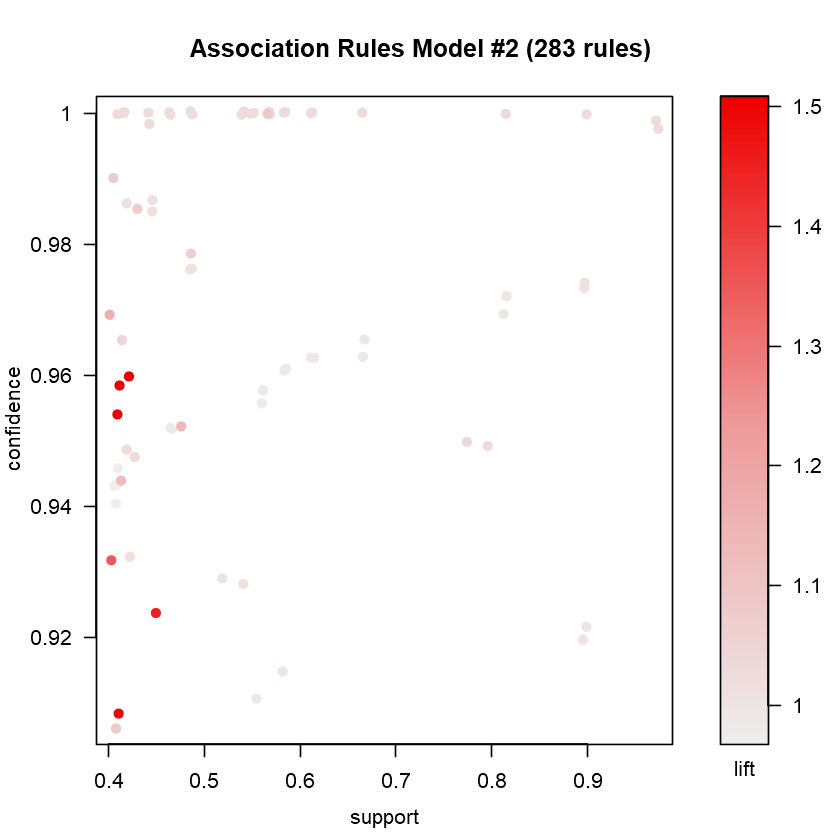

In [37]:
################
# Arm Model 2  #
################

# What happens if I reduce confidence to 0.90 and support to 0.40?
rules<-arules::apriori(armDF_unlabeled,parameter = list(supp=0.40, conf = 0.90,minlen=2))
rules <- rules[!is.redundant(rules)]  # Remove redundant rules
options(digits=3)
# Produced 283 rules

plot(rules, main = "Association Rules Model #2 (283 rules)")  # Add title
# We got more rules, and the lift range increased

# Sort by confidence & inspect
rules_conf<-sort (rules, decreasing = TRUE, by='confidence')
rules <- rules[!is.redundant(rules)]  # Remove redundant rules
inspect(rules_conf[1:10])

# Top 10 rules:
# lhs                               rhs                    support confidence lift count
# [1]  {bruises=Bruises}              => {gill.attachment=Free} 0.416   1          1.03 3376 
# [2]  {bruises=Bruises}              => {veil.color=White}     0.416   1          1.03 3376 
# [3]  {stalk.color.below.ring=White} => {gill.attachment=Free} 0.540   1          1.03 4384 
# [4]  {stalk.color.below.ring=White} => {veil.color=White}     0.540   1          1.03 4384 
# [5]  {stalk.color.above.ring=White} => {gill.attachment=Free} 0.549   1          1.03 4464 
# [6]  {stalk.color.above.ring=White} => {veil.color=White}     0.549   1          1.03 4464 
# [7]  {stalk.shape=Tapering}         => {ring.number=One}      0.567   1          1.08 4608 
# [8]  {stalk.shape=Tapering}         => {gill.attachment=Free} 0.567   1          1.03 4608 
# [9]  {stalk.shape=Tapering}         => {veil.color=White}     0.567   1          1.03 4608 
# [10] {odor=None,veil.color=White}   => {gill.attachment=Free} 0.410   1          1.03 3328 


# Sort by support
rules_supp <- sort(rules, decreasing = TRUE, by="supp")
inspect(rules_supp[1:10])

# Top 10 rules:
# lhs                                          rhs                    support confidence lift  count
# [1]  {gill.attachment=Free}                    => {veil.color=White}     0.973   0.999      1.024 7906 
# [2]  {veil.color=White}                        => {gill.attachment=Free} 0.973   0.998      1.024 7906 
# [3]  {ring.number=One}                         => {gill.attachment=Free} 0.898   0.974      1.000 7296 
# [4]  {gill.attachment=Free}                    => {ring.number=One}      0.898   0.922      1.000 7296 
# [5]  {ring.number=One}                         => {veil.color=White}     0.897   0.973      0.998 7288 
# [6]  {veil.color=White}                        => {ring.number=One}      0.897   0.920      0.998 7288 
# [7]  {veil.color=White,ring.number=One}        => {gill.attachment=Free} 0.897   1.000      1.027 7288 
# [8]  {gill.spacing=Close}                      => {veil.color=White}     0.815   0.972      0.996 6620 
# [9]  {gill.spacing=Close}                      => {gill.attachment=Free} 0.813   0.969      0.995 6602 
# [10] {gill.attachment=Free,gill.spacing=Close} => {veil.color=White}     0.813   1.000      1.025 6602 


# Sort by lift
rules_lift <- sort(rules, decreasing = TRUE,by="lift")
inspect(rules_lift[1:10])

# Top 10 rules:
# lhs                                                    rhs                               support confidence lift count
# [1]  {ring.number=One,ring.type=Pendant}                 => {stalk.surface.above.ring=Smooth} 0.420   0.960      1.51 3416 
# [2]  {stalk.surface.below.ring=Smooth,ring.type=Pendant} => {stalk.surface.above.ring=Smooth} 0.410   0.959      1.50 3328 
# [3]  {gill.spacing=Close,ring.type=Pendant}              => {stalk.surface.above.ring=Smooth} 0.409   0.954      1.50 3320 
# [4]  {stalk.surface.above.ring=Smooth,ring.type=Pendant} => {stalk.surface.below.ring=Smooth} 0.410   0.908      1.49 3328 
# [5]  {ring.type=Pendant}                                 => {stalk.surface.above.ring=Smooth} 0.451   0.923      1.45 3664 
# [6]  {odor=None}                                         => {gill.size=Broad}                 0.405   0.932      1.35 3288 
# [7]  {bruises=Bruises}                                   => {gill.spacing=Close}              0.403   0.969      1.16 3272 
# [8]  {population=Several}                                => {gill.spacing=Close}              0.474   0.952      1.14 3848 
# [9]  {ring.number=One,ring.type=Pendant}                 => {gill.spacing=Close}              0.414   0.944      1.13 3360 
# [10] {stalk.shape=Tapering}                              => {ring.number=One}                 0.567   1.000      1.08 4608 

set of 12 rules 

To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.


     lhs                       rhs               support confidence lift count
[1]  {bruises=No,                                                             
      gill.attachment=Free,                                                   
      gill.spacing=Close,                                                     
      population=Several}   => {class=Poisonous}   0.302      0.972 2.02  2456
[2]  {bruises=No,                                                             
      gill.spacing=Close,                                                     
      veil.color=White,                                                       
      population=Several}   => {class=Poisonous}   0.302      0.972 2.02  2456
[3]  {bruises=No,                                                             
      gill.attachment=Free,                                                   
      gill.spacing=Close,                                                     
      ring.number=One}      => {class=Poisonous}   0

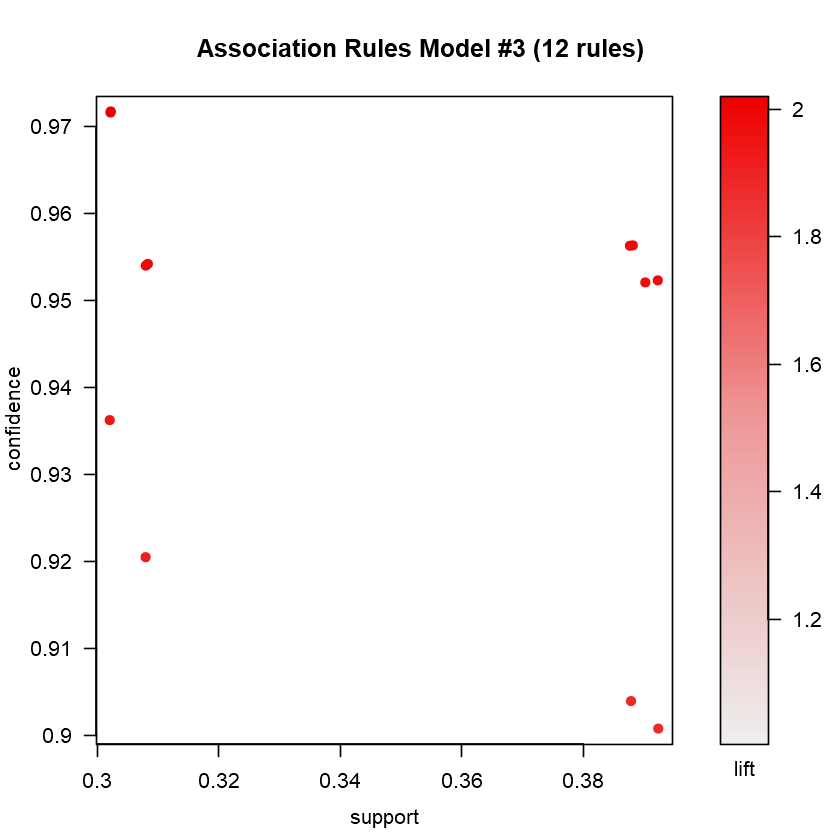

In [38]:
################
# Arm Model 3  #
################

# Now let's use labeled data and set the class as the rhs, to find out what's most associated with poison/edible
# Support of .40 gave no rules, so reduce it to .30
rules<-arules::apriori(data = armDF, parameter = list(supp=0.30, conf = 0.90, minlen=2),
                       appearance = list(default="lhs",rhs="class=Poisonous"),
                       control = list(verbose = F))
options(digits=3)
rules <- rules[!is.redundant(rules)]  # Remove redundant rules
rules
# Produced 12 rules

plot(rules, main = "Association Rules Model #3 (12 rules)")  # Add title
# Lift looks strong

# Sort by confidence & inspect
rules_conf<-sort (rules, decreasing = TRUE, by='confidence')
inspect(rules_conf[1:10])

# Sort by support
rules_supp <- sort(rules, decreasing = TRUE, by="supp")
inspect(rules_supp[1:10])

# Sort by lift
rules_lift <- sort(rules, decreasing = TRUE,by="lift")
inspect(rules_lift[1:10])

# This produced some pretty complicated rules that centered around the same 6 attributes
#   lhs                                                                                                                  rhs               support confidence lift count
#  {bruises=No, gill.attachment=Free,gill.spacing=Close,                    population=Several}                          => {class=Poisonous} 0.302   0.972      2.02 2456 
#  {bruises=No,                      gill.spacing=Close, veil.color=White,  population=Several}                          => {class=Poisonous} 0.302   0.972      2.02 2456 
#  {bruises=No,                      gill.spacing=Close,                    population=Several}                          => {class=Poisonous} 0.302   0.936      1.94 2456 
#  {bruises=No, gill.attachment=Free,gill.spacing=Close,                                         ring.number=One}        => {class=Poisonous} 0.388   0.956      1.98 3152 
#  {bruises=No,                      gill.spacing=Close, veil.color=White,                       ring.number=One}        => {class=Poisonous} 0.388   0.956      1.98 3152 
#  {bruises=No, gill.attachment=Free,gill.spacing=Close}                                                                 => {class=Poisonous} 0.390   0.952      1.97 3170 
#  {bruises=No,                      gill.spacing=Close, veil.color=White}                                               => {class=Poisonous} 0.392   0.952      1.98 3188 
#  {bruises=No, gill.attachment=Free,                                      population=Several}                           => {class=Poisonous} 0.308   0.954      1.98 2504 
#  {bruises=No,                                         veil.color=White,  population=Several}                           => {class=Poisonous} 0.308   0.954      1.98 2504 


# PLOT POISONOUS
plot(rules, method="graph", engine="interactive")


set of 2 rules 

    lhs                                rhs               support confidence
[1] {bruises=No,population=Several} => {class=Poisonous} 0.308   0.921     
[2] {bruises=No,gill.spacing=Close} => {class=Poisonous} 0.392   0.901     
    lift count
[1] 1.91 2504 
[2] 1.87 3188 


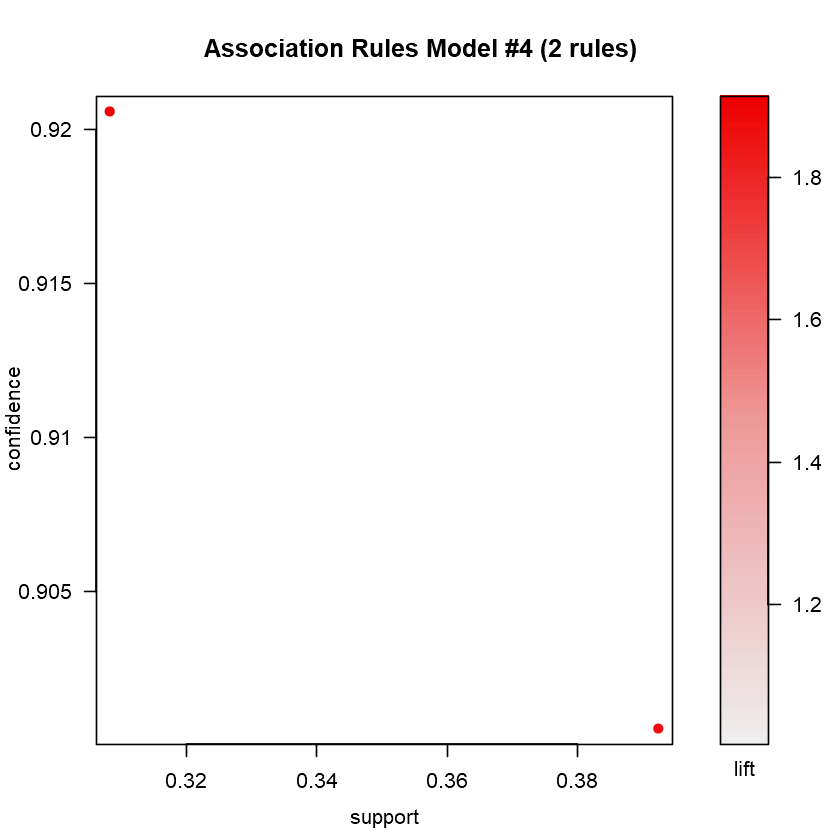

In [39]:
################
# Arm Model 4  #
################

# Let's reduce rule length to get simpler rules
# maxlen = 2 produced no rules, so go with 3
rules<-arules::apriori(data = armDF, parameter = list(supp=0.30, conf = 0.90, minlen=2, maxlen=3),
                       appearance = list(default="lhs",rhs="class=Poisonous"),
                       control = list(verbose = F))
options(digits=3)
rules <- rules[!is.redundant(rules)]  # Remove redundant rules
rules
# Produced 2 rules

plot(rules, main = "Association Rules Model #4 (2 rules)")  # Add title
# Lift looks strong
inspect(rules)


# gill.spacing had higher support, but population had stronger confidence.
# I don't think "population several" is very useful though,
# so let's go with "bruises = No" and "Gill Spacing = Close" as the most important variables.

# lhs                                rhs               support confidence lift count
# [1] {bruises=No,population=Several} => {class=Poisonous} 0.308   0.921      1.91 2504 
# [2] {bruises=No,gill.spacing=Close} => {class=Poisonous} 0.392   0.901      1.87 3188 

set of 9 rules 

    lhs                                  rhs            support confidence lift count
[1] {odor=None}                       => {class=Edible}   0.419      0.966 1.86  3408
[2] {odor=None,                                                                      
     stalk.shape=Tapering}            => {class=Edible}   0.307      1.000 1.93  2496
[3] {odor=None,                                                                      
     stalk.surface.below.ring=Smooth} => {class=Edible}   0.344      0.972 1.88  2792
[4] {odor=None,                                                                      
     stalk.surface.above.ring=Smooth} => {class=Edible}   0.350      0.973 1.88  2840
[5] {odor=None,                                                                      
     gill.size=Broad}                 => {class=Edible}   0.396      0.978 1.89  3216
[6] {odor=None,                                                                      
     ring.number=One}                 => {class=Edible

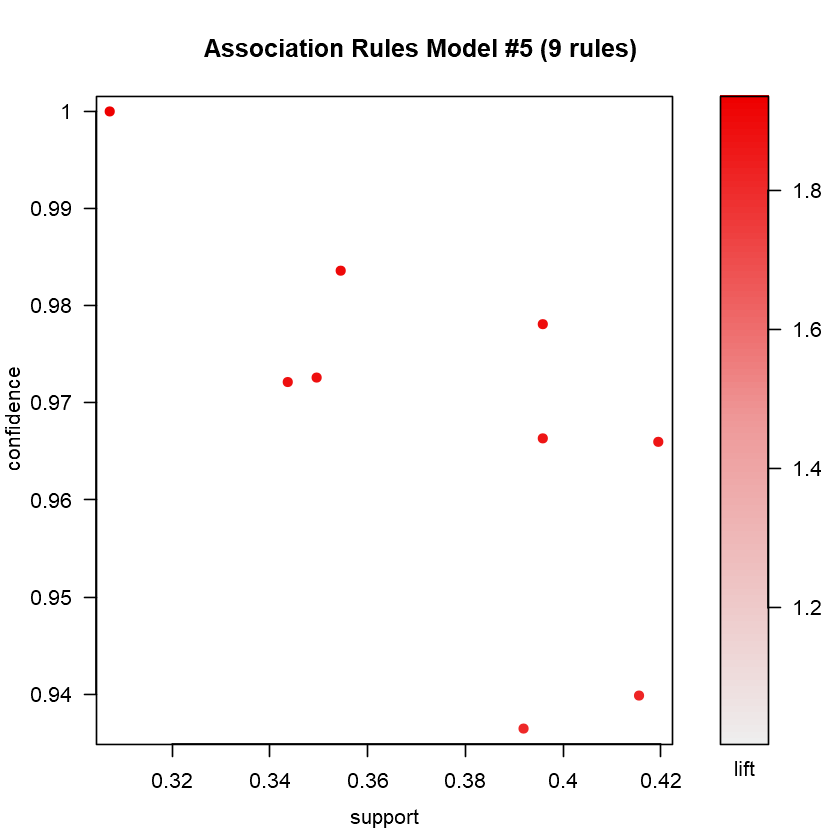

In [40]:
################
# Arm Model 5  #
################

# Now let's set the rhs to edible
rules<-arules::apriori(data = armDF, parameter = list(supp=0.30, conf = 0.90, minlen=2, maxlen =3),
                       appearance = list(default="lhs",rhs="class=Edible"),
                       control = list(verbose = F))
options(digits=3)
rules <- rules[!is.redundant(rules)]  # Remove redundant rules
rules
plot(rules, main = "Association Rules Model #5 (9 rules)")  # Add title
# Lift looks strong
inspect(rules)

# We have 9 rules. "Odor= None" seems to have a strong association.
# lhs                                                   rhs           support confidence lift count
# {odor=None}                                       => {class=Edible} 0.419   0.966      1.86 3408 
# {odor=None,stalk.shape=Tapering}                  => {class=Edible} 0.307   1.000      1.93 2496 
# {odor=None,stalk.surface.below.ring=Smooth}       => {class=Edible} 0.344   0.972      1.88 2792 
# {odor=None,stalk.surface.above.ring=Smooth}       => {class=Edible} 0.350   0.973      1.88 2840 
# {odor=None,gill.size=Broad}                       => {class=Edible} 0.396   0.978      1.89 3216 
# {odor=None,ring.number=One}                       => {class=Edible} 0.355   0.984      1.90 2880 
# {odor=None,veil.color=White}                      => {class=Edible} 0.396   0.966      1.87 3216 
# {gill.size=Broad,stalk.surface.below.ring=Smooth} => {class=Edible} 0.392   0.936      1.81 3184 
# {gill.size=Broad,stalk.surface.above.ring=Smooth} => {class=Edible} 0.416   0.940      1.81 3376 

set of 17 rules 

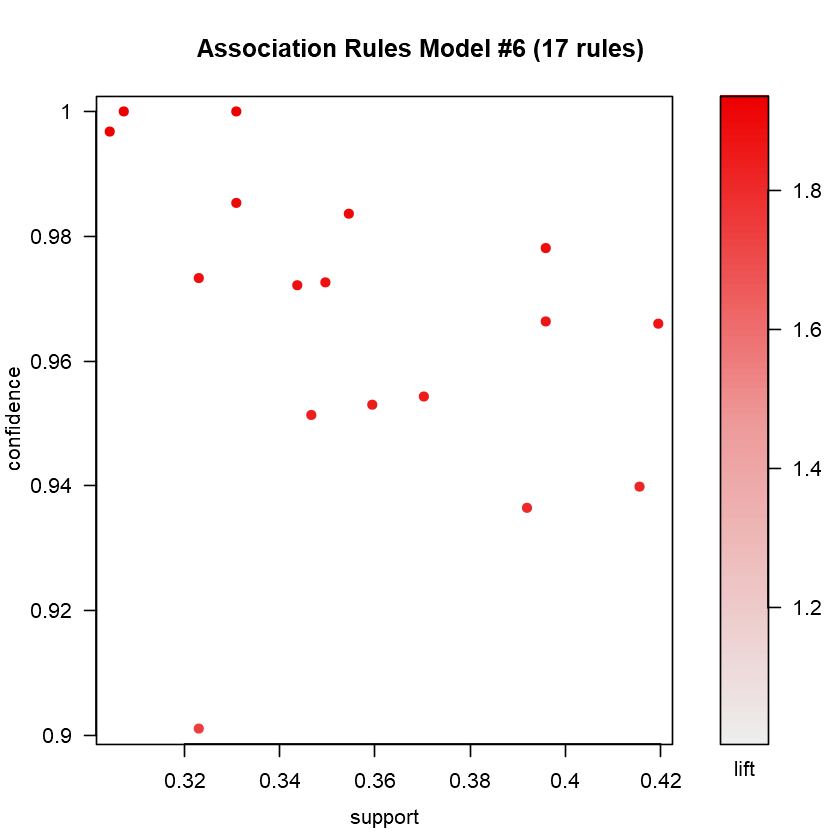

In [41]:
################
# Arm Model 6  #
################

## Make a slightly larger model of Edible for an interactive plot
rules<-arules::apriori(data = armDF, parameter = list(supp=0.30, conf = 0.90, minlen=2),
                       appearance = list(default="lhs",rhs="class=Edible"),
                       control = list(verbose = F))
rules <- rules[!is.redundant(rules)] ## Remove redundant rules
rules ## 17 rules
plot(rules, main = "Association Rules Model #6 (17 rules)") ## Add title

## PLOT EDIBLE
plot(rules, method="graph", engine="interactive")

set of 6 rules 

    lhs                  rhs                    support confidence lift count
[1] {class=Poisonous} => {veil.color=White}     0.481   0.998      1.02 3908 
[2] {class=Poisonous} => {gill.attachment=Free} 0.480   0.995      1.02 3898 
[3] {class=Poisonous} => {ring.number=One}      0.469   0.972      1.06 3808 
[4] {class=Poisonous} => {gill.spacing=Close}   0.468   0.971      1.16 3804 
[5] {class=Poisonous} => {bruises=No}           0.405   0.841      1.44 3292 
[6] {class=Poisonous} => {population=Several}   0.351   0.727      1.46 2848 
    lhs                  rhs                    support confidence lift count
[1] {class=Poisonous} => {veil.color=White}     0.481   0.998      1.02 3908 
[2] {class=Poisonous} => {gill.attachment=Free} 0.480   0.995      1.02 3898 
[3] {class=Poisonous} => {ring.number=One}      0.469   0.972      1.06 3808 
[4] {class=Poisonous} => {gill.spacing=Close}   0.468   0.971      1.16 3804 
[5] {class=Poisonous} => {bruises=No}           0.405   0.841   

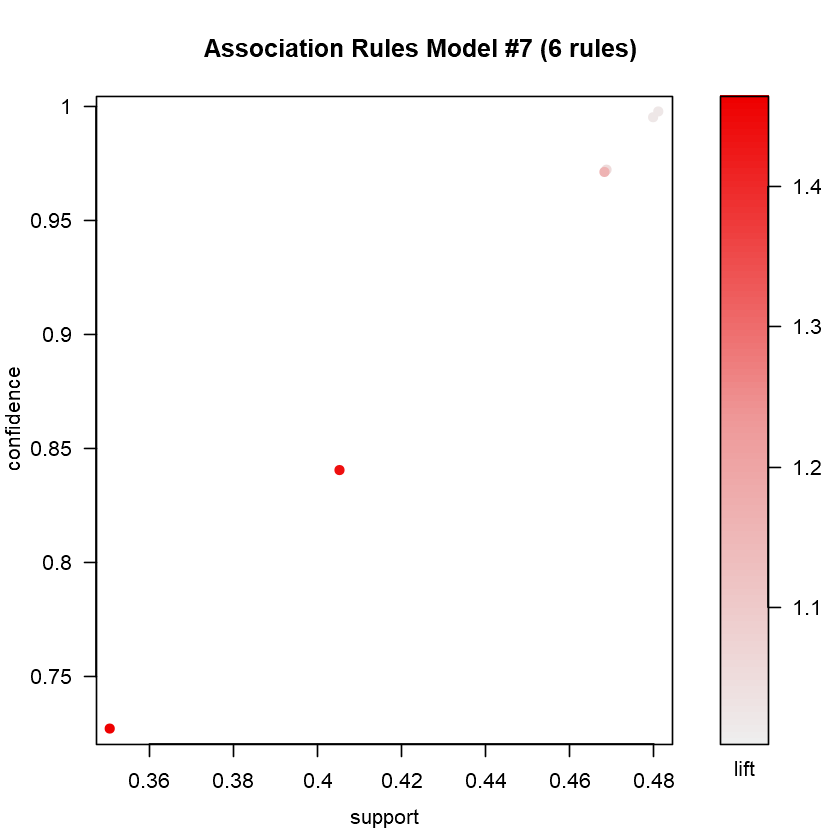

In [42]:
################
# Arm Model 7  #
################
# Per Instructions, set the LHS 
# I'll try setting LHS to Poisonous
rules<-arules::apriori(data = armDF, parameter = list(supp=0.01, conf = 0.60, minlen=2),
                       appearance = list(lhs = "class=Poisonous",default = "rhs"),
                       control = list(verbose = F))
options(digits=3)
rules <- rules[!is.redundant(rules)]  # Remove redundant rules
rules
# Produced 6 rules

plot(rules, main = "Association Rules Model #7 (6 rules)")  # Add title

# Sort by confidence & inspect
rules_conf<-sort (rules, decreasing = TRUE, by='confidence')
inspect(rules_conf)

# lhs                  rhs                    support confidence lift count
# [1] {class=Poisonous} => {veil.color=White}     0.481   0.998      1.02 3908 
# [2] {class=Poisonous} => {gill.attachment=Free} 0.480   0.995      1.02 3898 
# [3] {class=Poisonous} => {ring.number=One}      0.469   0.972      1.06 3808 
# [4] {class=Poisonous} => {gill.spacing=Close}   0.468   0.971      1.16 3804 
# [5] {class=Poisonous} => {bruises=No}           0.405   0.841      1.44 3292 
# [6] {class=Poisonous} => {population=Several}   0.351   0.727      1.46 2848 

# Sort by support
rules_supp <- sort(rules, decreasing = TRUE, by="supp")
inspect(rules_supp)

# Sort by lift
rules_lift <- sort(rules, decreasing = TRUE,by="lift")
inspect(rules_lift)


set of 13 rules 

To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.


     lhs               rhs                               support confidence
[1]  {class=Edible} => {gill.attachment=Free}            0.494   0.954     
[2]  {class=Edible} => {veil.color=White}                0.494   0.954     
[3]  {class=Edible} => {gill.size=Broad}                 0.483   0.932     
[4]  {class=Edible} => {ring.number=One}                 0.453   0.875     
[5]  {class=Edible} => {stalk.surface.above.ring=Smooth} 0.448   0.865     
[6]  {class=Edible} => {odor=None}                       0.419   0.810     
[7]  {class=Edible} => {stalk.surface.below.ring=Smooth} 0.419   0.808     
[8]  {class=Edible} => {ring.type=Pendant}               0.388   0.749     
[9]  {class=Edible} => {gill.spacing=Close}              0.370   0.715     
[10] {class=Edible} => {bruises=Bruises}                 0.339   0.654     
     lift  count
[1]  0.980 4016 
[2]  0.978 4016 
[3]  1.349 3920 
[4]  0.949 3680 
[5]  1.358 3640 
[6]  1.865 3408 
[7]  1.330 3400 
[8]  1.534 3152 
[9]  0.853 

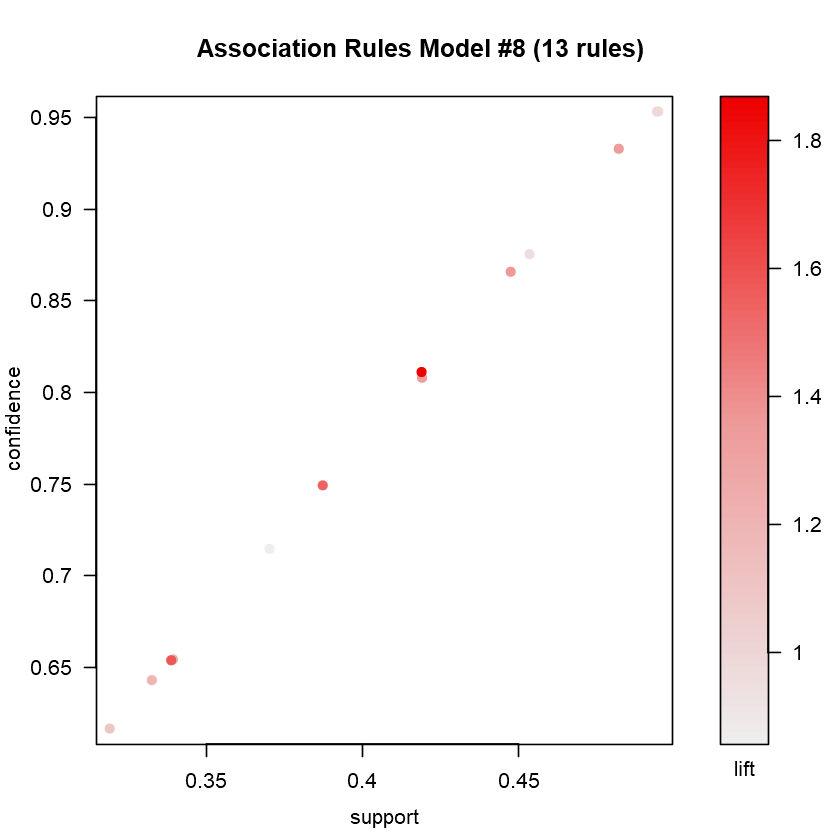

In [43]:
################
# Arm Model 8  #
################
# Now try setting LHS to Edible
rules<-arules::apriori(data = armDF, parameter = list(supp=0.01, conf = 0.60, minlen=2),
                       appearance = list(lhs = "class=Edible",default = "rhs"),
                       control = list(verbose = F))
options(digits=3)
rules <- rules[!is.redundant(rules)]  # Remove redundant rules
rules
# Produced 13 rules
 
plot(rules, main = "Association Rules Model #8 (13 rules)")  # Add title


# Sort by confidence & inspect
rules_conf<-sort (rules, decreasing = TRUE, by='confidence')
inspect(rules_conf[1:10])
# lhs               rhs                               support confidence lift  count
# [1]  {class=Edible} => {gill.attachment=Free}            0.494   0.954      0.980 4016 
# [2]  {class=Edible} => {veil.color=White}                0.494   0.954      0.978 4016 
# [3]  {class=Edible} => {gill.size=Broad}                 0.483   0.932      1.349 3920 
# [4]  {class=Edible} => {ring.number=One}                 0.453   0.875      0.949 3680 
# [5]  {class=Edible} => {stalk.surface.above.ring=Smooth} 0.448   0.865      1.358 3640 
# [6]  {class=Edible} => {odor=None}                       0.419   0.810      1.865 3408 
# [7]  {class=Edible} => {stalk.surface.below.ring=Smooth} 0.419   0.808      1.330 3400 
# [8]  {class=Edible} => {ring.type=Pendant}               0.388   0.749      1.534 3152 
# [9]  {class=Edible} => {gill.spacing=Close}              0.370   0.715      0.853 3008 
# [10] {class=Edible} => {bruises=Bruises}                 0.339   0.654      1.574 2752 


# Sort by support
rules_supp <- sort(rules, decreasing = TRUE, by="supp")
inspect(rules_supp[1:10])
# lhs               rhs                               support confidence lift  count
# [1]  {class=Edible} => {gill.attachment=Free}            0.494   0.954      0.980 4016 
# [2]  {class=Edible} => {veil.color=White}                0.494   0.954      0.978 4016 
# [3]  {class=Edible} => {gill.size=Broad}                 0.483   0.932      1.349 3920 
# [4]  {class=Edible} => {ring.number=One}                 0.453   0.875      0.949 3680 
# [5]  {class=Edible} => {stalk.surface.above.ring=Smooth} 0.448   0.865      1.358 3640 
# [6]  {class=Edible} => {odor=None}                       0.419   0.810      1.865 3408 
# [7]  {class=Edible} => {stalk.surface.below.ring=Smooth} 0.419   0.808      1.330 3400 
# [8]  {class=Edible} => {ring.type=Pendant}               0.388   0.749      1.534 3152 
# [9]  {class=Edible} => {gill.spacing=Close}              0.370   0.715      0.853 3008 
# [10] {class=Edible} => {bruises=Bruises}                 0.339   0.654      1.574 2752 

# Sort by lift
rules_lift <- sort(rules, decreasing = TRUE,by="lift")
inspect(rules_lift[1:10])
# lhs               rhs                               support confidence lift count
# [1]  {class=Edible} => {odor=None}                       0.419   0.810      1.86 3408 
# [2]  {class=Edible} => {bruises=Bruises}                 0.339   0.654      1.57 2752 
# [3]  {class=Edible} => {ring.type=Pendant}               0.388   0.749      1.53 3152 
# [4]  {class=Edible} => {stalk.surface.above.ring=Smooth} 0.448   0.865      1.36 3640 
# [5]  {class=Edible} => {gill.size=Broad}                 0.483   0.932      1.35 3920 
# [6]  {class=Edible} => {stalk.surface.below.ring=Smooth} 0.419   0.808      1.33 3400 
# [7]  {class=Edible} => {stalk.color.below.ring=White}    0.333   0.643      1.19 2704 
# [8]  {class=Edible} => {stalk.color.above.ring=White}    0.339   0.654      1.19 2752 
# [9]  {class=Edible} => {stalk.shape=Tapering}            0.319   0.616      1.09 2592 
# [10] {class=Edible} => {gill.attachment=Free}            0.494   0.954      0.98 4016 

In [ ]:
################################################################################
# End of project content 
################################################################################

# Data Notes 

# Mushroom Data can be found on both Kaggle and Machine Learning Repository 
  # https://www.kaggle.com/uciml/mushroom-classification
  # https://archive.ics.uci.edu/ml/datasets/mushroom

# Book #1
  # Title: Mushrooms: how to grow them a practical treatise on mushroom culture for profit and pleasure
  # Author/Year: William Falconer, 1892
  # can be found on Project Gutenberg: https://www.gutenberg.org/ebooks/24944

# Book #2:
  # Title: The Mushroom Cultivator: A Practical Guide to  Growing Mushrooms at Home 
  # Author/Year: by Paul Stamets and J.S. Chilton, 1983

In [ ]:
# Alphabetized list of all packages used

#install.packages("corrplot")
#install.packages("arules")
#install.packages("arulesViz")
#install.packages("Cairo")
#install.packages("caret",
#                 repos = "http://cran.r-project.org", 
#                 dependencies = TRUE)
#install.packages("cba")
#install.packages("class")
#install.packages("cluster")
#install.packages("CORElearn")
#install.packages("dbscan")
#install.packages("e1071")
#install.packages("factoextra")
#install.packages("ggplot2")
#install.packages("gmodels")
#install.packages("gridExtra")
#install.packages("klaR")
#install.packages("Matrix")
#install.packages("mclust")
#install.packages("mlr")
#install.packages("naivebayes")
#install.packages("plyr")
#install.packages("randomForest")
#install.packages("rpart")
#install.packages("slam")
#install.packages("SnowballC")
#install.packages("stringi")
#install.packages("stringr")
#install.packages("textmineR")
#install.packages("tictoc")
#install.packages("tidytext")
#install.packages("tidyverse")
#install.packages("tm")
#install.packages("wordcloud")
#install.packages('rattle')
#install.packages('rpart.plot')

In [ ]:
# Alphabetized list of all libraries to used

# Note: Do not load Arules until needed; 
# it masks portions of many other packages.

#library(arules)
#library(arulesViz)

library(Cairo)
library(caret)
library(cba)
library(class)
library(cluster)
library(CORElearn)
library(corrplot)
library(dbscan)
library(e1071)
library(factoextra)
library(ggplot2)
library(gmodels)
library(gridExtra)
library(klaR)
library(Matrix)
library(mclust)
library(mlr)
library(naivebayes)
library(plyr)
library(randomForest)
library(rattle)
library(rpart)
library(rpart.plot)
library(slam)
library(SnowballC)
library(stringi)
library(stringr)
library(textmineR)
library(tictoc)
library(tidytext) 
library(tidyverse)
library(tm)  
library(wordcloud)